# HOUSING: PRICE PREDICTION

### Problem Statement

Houses are one of the necessary need of each and every person around the globe and therefore housing and real estate market is one of the markets which is one of the major contributors in the world’s economy. It is a very large market and there are various companies working in the domain. Data science comes as a very important tool to solve problems in the domain to help the companies increase their overall revenue, profits, improving their marketing strategies and focusing on changing trends in house sales and purchases. Predictive modelling, Market mix modelling, recommendation systems are some of the machine learning techniques used for achieving the business goals for housing companies. Our problem is related to one such housing company.

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.

The company is looking at prospective properties to buy houses to enter the market. You are required to build a model using Machine Learning in order to predict the actual value of the prospective properties and decide whether to invest in them or not.  

For this company wants to know:  
Which variables are important to predict the price of variable?  
How do these variables describe the price of the house?

You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for the management to understand the pricing dynamics of a new market.

In [1]:
# Importing Necessary Libraries
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Dataset (Train)
train_hp = pd.read_csv("Housing_Project_Train.csv")
train_hp

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0     127         120       RL          NaN     4928   Pave   NaN      IR1   
1     889          20       RL         95.0    15865   Pave   NaN      IR1   
2     793          60       RL         92.0     9920   Pave   NaN      IR1   
3     110          20       RL        105.0    11751   Pave   NaN      IR1   
4     422          20       RL          NaN    16635   Pave   NaN      IR1   
...   ...         ...      ...          ...      ...    ...   ...      ...   
1163  289          20       RL          NaN     9819   Pave   NaN      IR1   
1164  554          20       RL         67.0     8777   Pave   NaN      Reg   
1165  196         160       RL         24.0     2280   Pave   NaN      Reg   
1166   31          70  C (all)         50.0     8500   Pave  Pave      Reg   
1167  617          60       RL          NaN     7861   Pave   NaN      IR1   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
3            Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
4            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
...          ...       ...  ...      ...    ...    ...         ...     ...   
1163         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1164         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1165         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1166         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1167         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
0         2   2007        WD         Normal     128000  
1        10   2007        WD         Normal     268000  
2         6   2007        WD         Normal     269790  
3         1   2010       COD         Normal     190000  
4         6   2009        WD         Normal     215000  
...     ...    ...       ...            ...        ...  
1163      2   2010        WD         Normal     122000  
1164      5   2009        WD         Normal     108000  
1165      7   2009        WD         Normal     148500  
1166      7   2008        WD         Normal      40000  
1167      6   2006        WD         Normal     183200  

[1168 rows x 81 columns]

In [3]:
# Dataset (Test)
test_hp = pd.read_csv("Housing_Project_Test.csv")
test_hp

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0     337          20       RL         86.0    14157   Pave   NaN      IR1   
1    1018         120       RL          NaN     5814   Pave   NaN      IR1   
2     929          20       RL          NaN    11838   Pave   NaN      Reg   
3    1148          70       RL         75.0    12000   Pave   NaN      Reg   
4    1227          60       RL         86.0    14598   Pave   NaN      IR1   
..    ...         ...      ...          ...      ...    ...   ...      ...   
287    83          20       RL         78.0    10206   Pave   NaN      Reg   
288  1048          20       RL         57.0     9245   Pave   NaN      IR2   
289    17          20       RL          NaN    11241   Pave   NaN      IR1   
290   523          50       RM         50.0     5000   Pave   NaN      Reg   
291  1379         160       RM         21.0     1953   Pave   NaN      Reg   

    LandContour Utilities  ... ScreenPorch PoolArea PoolQC Fence MiscFeature  \
0           HLS    AllPub  ...           0        0    NaN   NaN         NaN   
1           Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
2           Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
3           Bnk    AllPub  ...           0        0    NaN   NaN         NaN   
4           Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
..          ...       ...  ...         ...      ...    ...   ...         ...   
287         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
288         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
289         Lvl    AllPub  ...           0        0    NaN   NaN        Shed   
290         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
291         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   

    MiscVal MoSold  YrSold  SaleType  SaleCondition  
0         0      7    2007        WD         Normal  
1         0      8    2009       COD        Abnorml  
2         0      6    2009        WD         Normal  
3         0      7    2009        WD         Normal  
4         0      1    2008        WD         Normal  
..      ...    ...     ...       ...            ...  
287       0     10    2008        WD         Normal  
288       0      2    2008        WD         Normal  
289     700      3    2010        WD         Normal  
290       0     10    2006        WD         Normal  
291       0      6    2006        WD         Normal  

[292 rows x 80 columns]

Here we are provided with train and test datasets. Both the datatset provides information about the House. The datatsets contains both numerical and categorical data types. And we can notice missing values in some of the columns.

The train dataset is comprised of both dependent variable (target) and independent variables. Here "SalesPrice" is our label which is continuous in nature so, it is a **Regression Type Problem** where I need to predict the sales price of the house.

The test dataset contains only independent variables.  

So, I will use train dataset for building our model and then will use the test dataset for getting prediction from the trained model.

### Features Information

**MSZoning**: Identifies the general zoning classification of the sale.  
**Street**: Type of road access to property  
**Alley**: Type of alley access to property  
**LotShape**: General shape of property  
**LandContour**: Flatness of the property  
**Utilities**: Type of utilities available  
**LotConfig**: Lot configuration Categorical  
**LandSlope**: Slope of property Categorical  
**Neighborhood**: Physical locations within Ames city limits  
**Condition1**: Proximity to main road or railroad  
**Condition2**: Proximity to main road or railroad (if a second is present)  
**BldgType**: Type of dwelling  
**HouseStyle**: Style of dwelling  
**RoofStyle**: Type of roof  
**RoofMatl**: Roof material  
**Exterior1st**: Exterior covering on house  
**Exterior2nd**: Exterior covering on house (if more than one material)  
**MasVnrType**: Masonry veneer type  
**Foundation**: Type of foundation  
**BsmtExposure**: Walkout or garden level basement walls  
**BsmtFinType1**: Quality of basement finished area  
**BsmtFinType2**: Quality of second finished area (if present)  
**Heating**: Type of heating  
**CentralAir**: Central air conditioning  
**Electrical**: Electrical system  
**Functional**: Home functionality rating  
**FireplaceQu**: Fireplace quality  
**GarageType**: Garage location  
**GarageFinish**: Interior finish of the garage  
**PavedDrive**: Paved driveway  
**PoolQC**: Pool quality  
**Fence**: Fence quality  
**MiscFeature**: Miscellaneous feature not covered in other categories  
**SaleType**: Type of sale  
**SaleCondition**: Condition of sale  
**ExterQual**: Exterior material quality  
**ExterCond**: Present condition of the material on the exterior  
**BsmtQual**: Height of the basement  
**BsmtCond**: General condition of the basement  
**OverallQual**: Overall material and finish quality  
**OverallCond**: Overall condition rating  
**HeatingQC**: Heating quality and condition  
**KitchenQual**: Kitchen quality  
**GarageQual**: Garage quality  
**GarageCond**: Garage condition    
**SalePrice**: The property's sale price in dollars  
**LotFrontage**: Linear feet of street connected to property  
**LotArea**: Lot size in square feet  
**MasVnrArea**: Masonry veneer area in square feet  
**BsmtFinSF1**: Type 1 finished square feet  
**BsmtFinSF2**: Type 2 finished square feet  
**BsmtUnfSF**: Unfinished square feet of basement area  
**TotalBsmtSF**: Total square feet of basement area  
**1stFlrSF**: First Floor square feet  
**2ndFlrSF**: Second floor square feet  
**GrLivArea**: Above grade (ground) living area square feet  
**GarageArea**: Size of garage in square feet  
**WoodDeckSF**: Wood deck area in square feet  
**OpenPorchSF**: Open porch area in square feet  
**EnclosedPorch**: Enclosed porch area in square feet  
**ScreenPorch**: Screen porch area in square feet  
**YearBuilt**: Original construction date  
**YearRemodAdd**: Remodel date (same as construction date if no remodeling or additions)  
**GarageYrBlt**: Year garage was built  
**YrSold**: Year Sold  
**MSSubClass**: The building class  
**LowQualFinSF**: Low quality finished square feet (all floors)  
**BsmtFullBath**: Basement full bathrooms  
**BsmtHalfBath**: Basement half bathrooms  
**FullBath**: Full bathrooms above grade  
**HalfBath**: Half baths above grade  
**Bedroom**: Number of bedrooms above basement level  
**Kitchen**: Number of kitchens  
**TotRmsAbvGrd**: Total rooms above grade (does not include bathrooms)  
**Fireplaces**: Number of fireplaces  
**GarageCars**: Size of garage in car capacity  
**3SsnPorch**: Three season porch area in square feet  
**PoolArea**: Pool area in square feet  
**MiscVal**: $Value of miscellaneous feature  
**MoSold**: Month Sold  

# Preprocessing and Exploratory Data Analysis (EDA)

In [4]:
# Checking shape of my train dataset
train_hp.shape

(1168, 81)

In [5]:
# Checking shape of my test dataset
test_hp.shape

(292, 80)

In [6]:
# Checking all column names of train dataset
train_hp.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [7]:
# Checking all column names of test dataset
test_hp.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [8]:
# Checking the data types of all columns in train dataset
train_hp.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [9]:
# Checking the data types of all columns in test dataset
test_hp.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MiscVal            int64
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
Length: 80, dtype: object

In [10]:
# Checking the info about the train dataset
train_hp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   object 
 3   LotFrontage    954 non-null    float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   object 
 6   Alley          77 non-null     object 
 7   LotShape       1168 non-null   object 
 8   LandContour    1168 non-null   object 
 9   Utilities      1168 non-null   object 
 10  LotConfig      1168 non-null   object 
 11  LandSlope      1168 non-null   object 
 12  Neighborhood   1168 non-null   object 
 13  Condition1     1168 non-null   object 
 14  Condition2     1168 non-null   object 
 15  BldgType       1168 non-null   object 
 16  HouseStyle     1168 non-null   object 
 17  OverallQual    1168 non-null   int64  
 18  OverallC

Above is the info about train dataset and i can see some missing values in the dataset. I have to take care of those missing values. Also in columns, Alley, PoolQC, Fence and MiscFeature there are more than 80 % null values so i decided to drop this columns.

In [11]:
# Dropping unnecessary columns in train dataset
train_hp = train_hp.drop(["Alley"],axis=1)
train_hp = train_hp.drop(["PoolQC"],axis=1)
train_hp = train_hp.drop(["Fence"],axis=1)
train_hp = train_hp.drop(["MiscFeature"],axis=1)

In [12]:
# Checking the info about the test dataset
test_hp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             292 non-null    int64  
 1   MSSubClass     292 non-null    int64  
 2   MSZoning       292 non-null    object 
 3   LotFrontage    247 non-null    float64
 4   LotArea        292 non-null    int64  
 5   Street         292 non-null    object 
 6   Alley          14 non-null     object 
 7   LotShape       292 non-null    object 
 8   LandContour    292 non-null    object 
 9   Utilities      292 non-null    object 
 10  LotConfig      292 non-null    object 
 11  LandSlope      292 non-null    object 
 12  Neighborhood   292 non-null    object 
 13  Condition1     292 non-null    object 
 14  Condition2     292 non-null    object 
 15  BldgType       292 non-null    object 
 16  HouseStyle     292 non-null    object 
 17  OverallQual    292 non-null    int64  
 18  OverallCon

Above is the info about test dataset and i can see some missing values in the dataset. I have to take care of those missing values. Once again in columns, Alley, PoolQC, Fence and MiscFeature there are more than 80 % null values so i decided to drop this columns.

In [13]:
# Dropping unnecessary columns in test dataset
test_hp = test_hp.drop(["Alley"],axis=1)
test_hp = test_hp.drop(["PoolQC"],axis=1)
test_hp = test_hp.drop(["Fence"],axis=1)
test_hp = test_hp.drop(["MiscFeature"],axis=1)

In [14]:
# Checking unique values of each column in train dataset
train_hp.nunique()

Id               1168
MSSubClass         15
MSZoning            5
LotFrontage       106
LotArea           892
                 ... 
MoSold             12
YrSold              5
SaleType            9
SaleCondition       6
SalePrice         581
Length: 77, dtype: int64

In Id column the unique count is 1168 which means all the values in the column are unique, so this ID has nothing to do with model training so we can drop this column. In Utilities column unique value count is 1 which means all the entries are same, this will not help us in model building so let us drop this column.

In [15]:
# Droping unnecessary columns in train dataset
train_hp = train_hp.drop(["Id"],axis=1)
train_hp = train_hp.drop(["Utilities"],axis=1)

In [16]:
# Checking unique values of each column in test dataset
test_hp.nunique()

Id               292
MSSubClass        15
MSZoning           4
LotFrontage       65
LotArea          249
                ... 
MiscVal            8
MoSold            12
YrSold             5
SaleType           6
SaleCondition      4
Length: 76, dtype: int64

In Id column the unique count is 292 which means all the values in the column are unique, so this ID has nothing to do with model training so we can drop this column. Since we have droped Utilities in train dataset, we have to drop it here also.

In [17]:
# Droping unnecessary columns in test dataset
test_hp = test_hp.drop(["Id"],axis=1)
test_hp = test_hp.drop(["Utilities"],axis=1)

In [18]:
# Value counts of each column to see if there are any unexpected and unwanted entries present in the column in train dataset.
for i in train_hp.columns:
        print(train_hp[i].value_counts())
        print('-------------------------------------------------')

20     428
60     244
50     113
120     69
70      53
30      52
160     47
80      43
90      41
190     26
85      19
75      14
45      10
180      6
40       3
Name: MSSubClass, dtype: int64
-------------------------------------------------
RL         928
RM         163
FV          52
RH          16
C (all)      9
Name: MSZoning, dtype: int64
-------------------------------------------------
60.0     111
80.0      60
70.0      58
75.0      46
50.0      44
        ... 
141.0      1
144.0      1
111.0      1
39.0       1
46.0       1
Name: LotFrontage, Length: 106, dtype: int64
-------------------------------------------------
9600     21
7200     18
6000     16
8400     14
10800    11
         ..
11103     1
19296     1
12274     1
9060      1
8190      1
Name: LotArea, Length: 892, dtype: int64
-------------------------------------------------
Pave    1164
Grvl       4
Name: Street, dtype: int64
-------------------------------------------------
Reg    740
IR1    390
IR2     32
IR3

There were no unnecessary or duplicate entries in any column in train dataset.

But we can see more than 85 % zero values in: BsmtFinSF2, LowQualFinSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, MiscVal

So we have to drop these columns. In some other columns, there are zero values below 60 % they are reasonable.

In [19]:
# Dropping unnecessary columns in train dataset
train_hp.drop(columns = ['BsmtFinSF2','LowQualFinSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal'],inplace = True)

In [20]:
# Value counts of each column to see if there are any unexpected and unwanted entries present in the column in test dataset.
for i in test_hp.columns:
        print(test_hp[i].value_counts())
        print('-------------------------------------------------')

20     108
60      55
50      31
120     18
30      17
160     16
80      15
90      11
70       7
180      4
190      4
45       2
75       2
40       1
85       1
Name: MSSubClass, dtype: int64
-------------------------------------------------
RL         223
RM          55
FV          13
C (all)      1
Name: MSZoning, dtype: int64
-------------------------------------------------
60.0    32
85.0    14
50.0    13
70.0    12
21.0     9
        ..
45.0     1
77.0     1
69.0     1
33.0     1
61.0     1
Name: LotFrontage, Length: 65, dtype: int64
-------------------------------------------------
7200      7
1680      4
9600      3
10800     3
7500      3
         ..
10998     1
6853      1
14536     1
215245    1
14720     1
Name: LotArea, Length: 249, dtype: int64
-------------------------------------------------
Pave    290
Grvl      2
Name: Street, dtype: int64
-------------------------------------------------
Reg    185
IR1     94
IR2      9
IR3      4
Name: LotShape, dtype: int64
---

There were no unnecessary or duplicate entries in any column in train dataset.

But we can see more than 85 % zero values in: BsmtFinSF2, LowQualFinSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, MiscVal

So we have to drop these columns. In some other columns, there are zero values below 60 % they are reasonable.

In [21]:
# Dropping unnecessary columns in test dataset
test_hp.drop(columns = ['BsmtFinSF2','LowQualFinSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal'],inplace = True)

In [22]:
# Checking null values in the train dataset
train_hp.isnull().sum()

MSSubClass         0
MSZoning           0
LotFrontage      214
LotArea            0
Street             0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 68, dtype: int64

There are null values in many of the columns in train dataset, we have impute them with their respective values.

In [23]:
# Checking null values in the test dataset
test_hp.isnull().sum()

MSSubClass        0
MSZoning          0
LotFrontage      45
LotArea           0
Street            0
                 ..
OpenPorchSF       0
MoSold            0
YrSold            0
SaleType          0
SaleCondition     0
Length: 67, dtype: int64

There are null values in many of the columns in test dataset, we have impute them with their respective values.

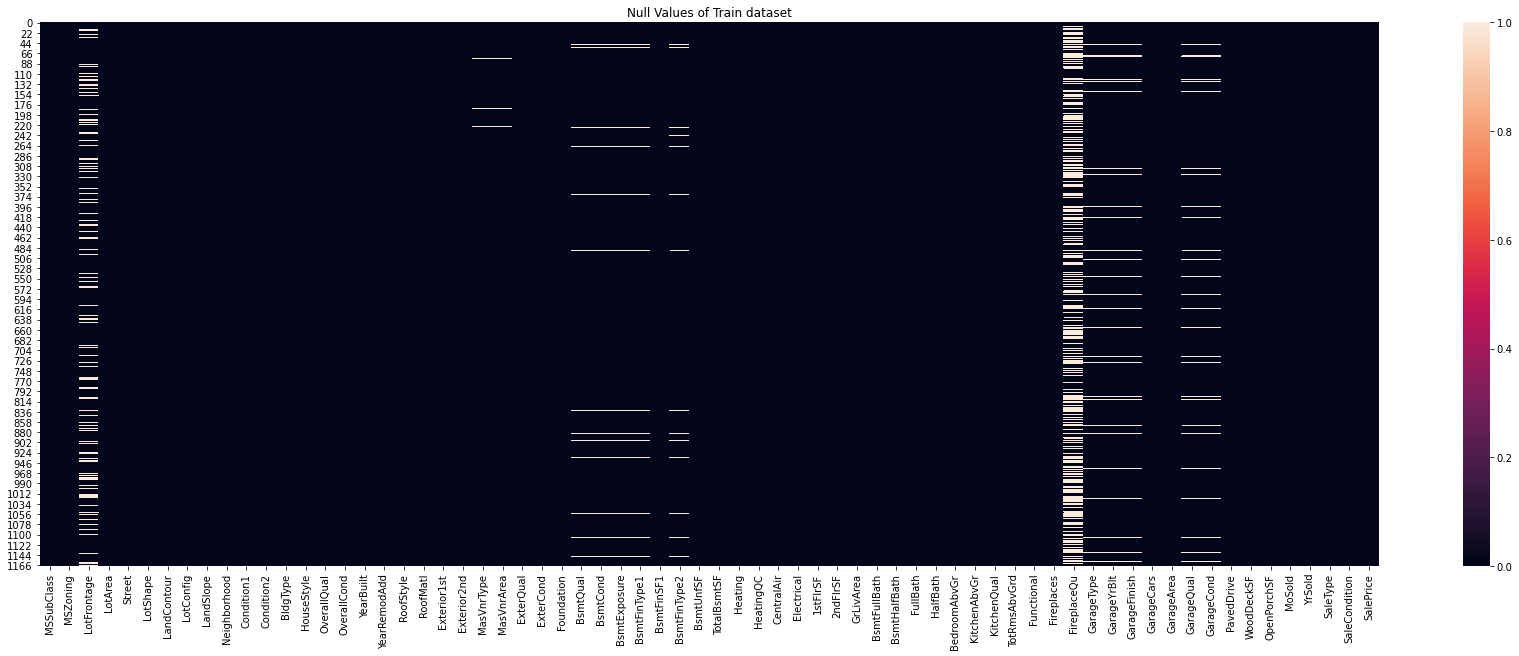

In [24]:
# Visualizing null values in train dataset
plt.figure(figsize=[30,10])
sns.heatmap(train_hp.isnull())
plt.title("Null Values of Train dataset")
plt.show()

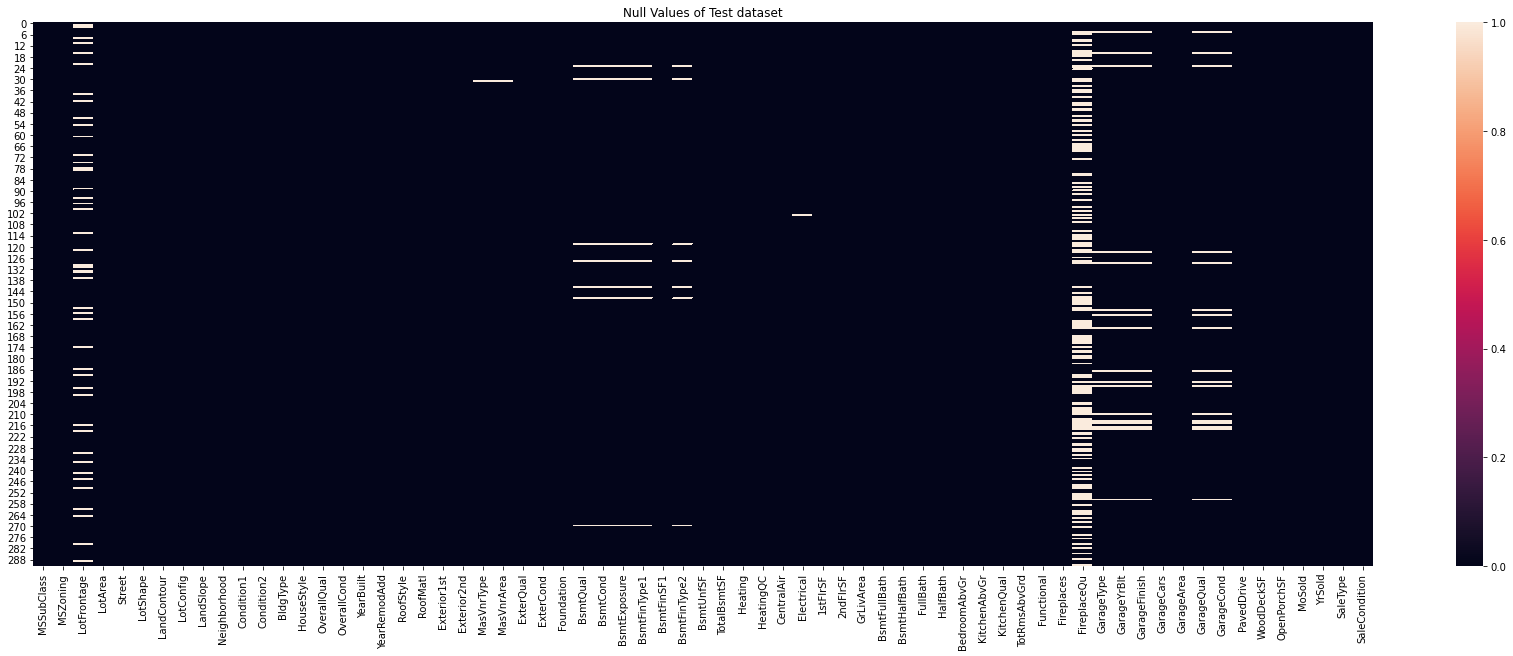

In [25]:
# Visualizing null values in test dataset
plt.figure(figsize=[30,10])
sns.heatmap(test_hp.isnull())
plt.title("Null Values of Test dataset")
plt.show()

We can see the null values clearly in both train and test datasets.

# Imputation technique to replace NaN values

In [26]:
# Creating a list of categorical and numerical datatypes in train dataset
train_categorical=[]
train_numerical=[]
for i in train_hp.columns:
    if (train_hp[i].dtype=='object'):
          train_categorical.append(i)
    else:
        train_numerical.append(i)

In [27]:
# Replacing null values of categorical column with mode of respective column in train dataset.
cat_clmn=train_hp.columns.values
for i in range(0,len(cat_clmn)):
    if train_hp[cat_clmn[i]].dtype == "object":
        train_hp[cat_clmn[i]].fillna(train_hp[cat_clmn[i]].mode()[0], inplace=True)

In [28]:
# Replacing null values of numerical column with mean of respective column in train dataset.
num_clmn=train_hp.columns.values
for i in range(0,len(num_clmn)):
    if train_hp[num_clmn[i]].dtype != "object":
        train_hp[num_clmn[i]].fillna(train_hp[num_clmn[i]].mean(), inplace=True)

In [29]:
# Checking null values again in train dataset
train_hp.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 68, dtype: int64

We have treated all the null values in the train dataset.

In [30]:
# Creating a list of categorical and numerical datatypes in test dataset
test_categorical=[]
test_numerical=[]
for j in test_hp.columns:
    if (test_hp[j].dtype=='object'):
          test_categorical.append(j)
    else:
          test_numerical.append(j)

In [31]:
# Replacing null values of categorical column with mode of respective column in test dataset.
cat_clmn1=test_hp.columns.values
for j in range(0,len(cat_clmn1)):
    if test_hp[cat_clmn1[j]].dtype == "object":
        test_hp[cat_clmn1[j]].fillna(test_hp[cat_clmn1[j]].mode()[0], inplace=True)

In [32]:
# Replacing null values of numerical column with mean of respective column in test dataset.
num_clmn1=test_hp.columns.values
for j in range(0,len(num_clmn1)):
    if test_hp[num_clmn1[j]].dtype != "object":
        test_hp[num_clmn1[j]].fillna(test_hp[num_clmn1[j]].mean(), inplace=True)

In [33]:
# Checking null values again in test dataset
test_hp.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
OpenPorchSF      0
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
Length: 67, dtype: int64

We have treated the null values present in the test dataset.

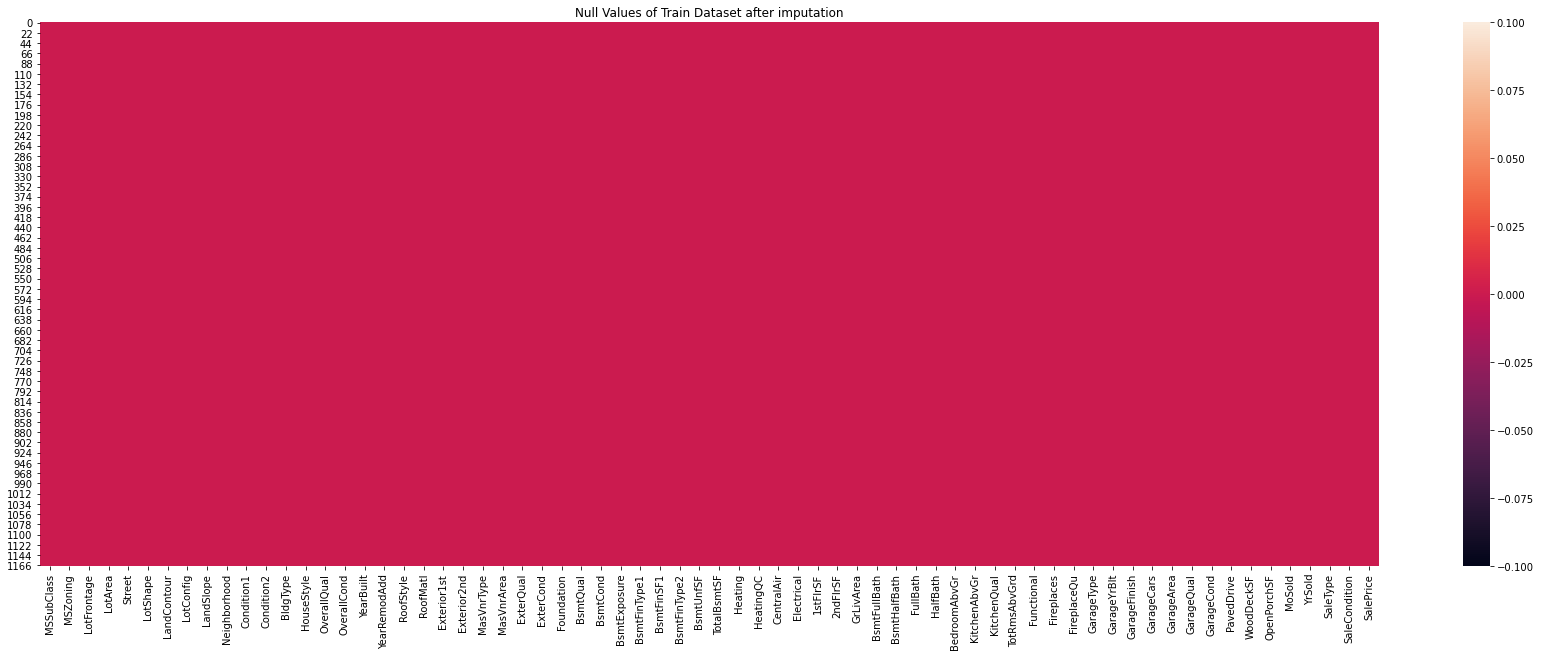

In [34]:
# Visualizing null values again after imputation in train dataset
plt.figure(figsize=[30,10])
sns.heatmap(train_hp.isnull())
plt.title("Null Values of Train Dataset after imputation")
plt.show()

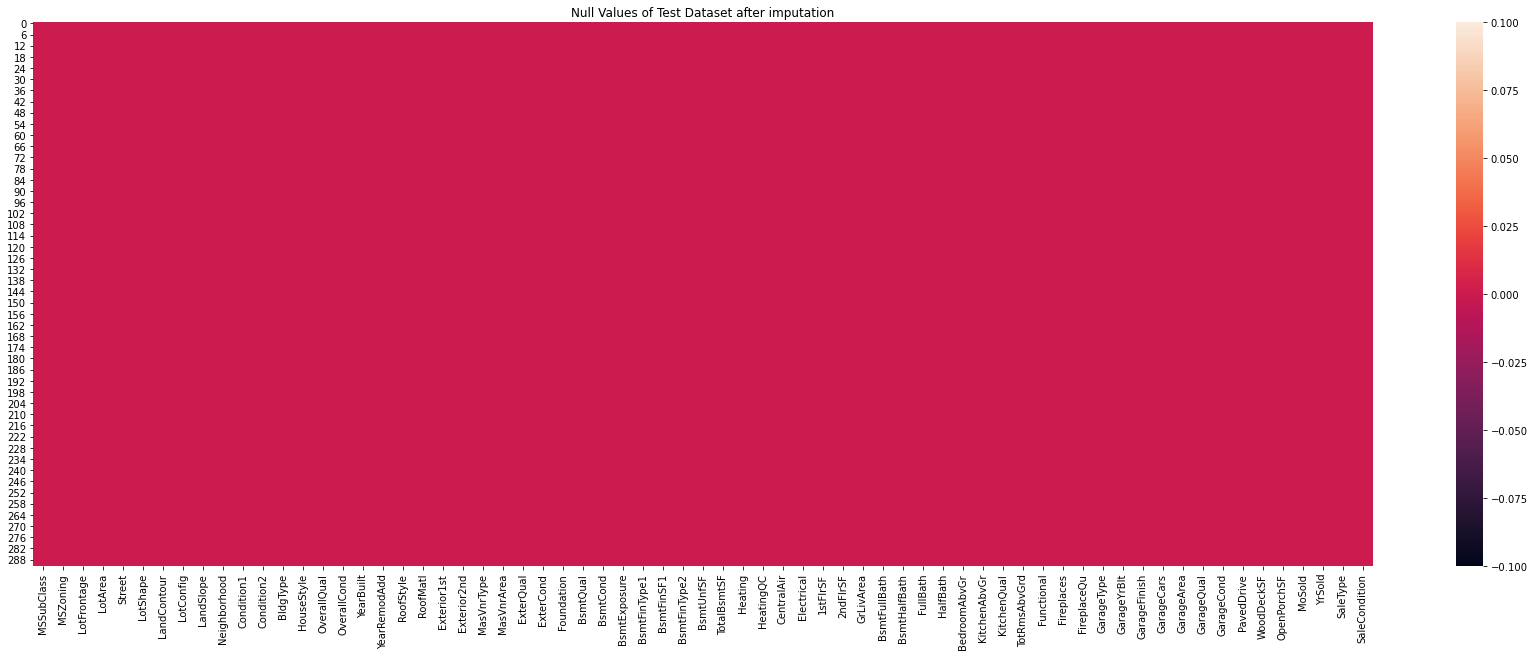

In [35]:
# Visualizing null values again after imputation in test dataset
plt.figure(figsize=[30,10])
sns.heatmap(test_hp.isnull())
plt.title("Null Values of Test Dataset after imputation")
plt.show()

# Feature Extraction

#### TRAIN DATASET

In [36]:
# Converting years column to age column in train dataset
train_hp['Year_SinceBuilt'] = train_hp['YearBuilt'].max() - train_hp['YearBuilt']
train_hp['Year_SinceRemodAdded'] = train_hp['YearRemodAdd'].max() - train_hp['YearRemodAdd']
train_hp['Year_SinceSold'] = train_hp['YrSold'].max() - train_hp['YrSold']
train_hp['GarageAge'] = train_hp['GarageYrBlt'].max() - train_hp['GarageYrBlt']

In [37]:
# Dropping old columns in train dataset
train_hp.drop(['YearBuilt','YearRemodAdd','YrSold','GarageYrBlt'], axis=1, inplace = True)

I have converted all the year columns to there respective age, thinking that age will help us more than year in the train dataset.

In [38]:
# Converting years column to age column in test dataset
test_hp['Year_SinceBuilt'] = test_hp['YearBuilt'].max() - test_hp['YearBuilt']
test_hp['Year_SinceRemodAdded'] = test_hp['YearRemodAdd'].max() - test_hp['YearRemodAdd']
test_hp['Year_SinceSold'] = test_hp['YrSold'].max() - test_hp['YrSold']
test_hp['GarageAge'] = test_hp['GarageYrBlt'].max() - test_hp['GarageYrBlt']

In [39]:
# Dropping old columns in test dataset
test_hp.drop(['YearBuilt','YearRemodAdd','YrSold','GarageYrBlt'], axis=1, inplace = True)

I have converted all the year columns to there respective age, thinking that age will help us more than year in the test dataset.

In [40]:
# Checking description of data set in train dataset
train_hp.describe()

MSSubClass  LotFrontage        LotArea  OverallQual  OverallCond  \
count  1168.000000  1168.000000    1168.000000  1168.000000  1168.000000   
mean     56.767979    70.988470   10484.749144     6.104452     5.595890   
std      41.940650    22.437056    8957.442311     1.390153     1.124343   
min      20.000000    21.000000    1300.000000     1.000000     1.000000   
25%      20.000000    60.000000    7621.500000     5.000000     5.000000   
50%      50.000000    70.988470    9522.500000     6.000000     5.000000   
75%      70.000000    79.250000   11515.500000     7.000000     6.000000   
max     190.000000   313.000000  164660.000000    10.000000     9.000000   

        MasVnrArea   BsmtFinSF1    BsmtUnfSF  TotalBsmtSF     1stFlrSF  ...  \
count  1168.000000  1168.000000  1168.000000  1168.000000  1168.000000  ...   
mean    102.310078   444.726027   569.721747  1061.095034  1169.860445  ...   
std     182.047152   462.664785   449.375525   442.272249   391.161983  ...   
min       0.000000     0.000000     0.000000     0.000000   334.000000  ...   
25%       0.000000     0.000000   216.000000   799.000000   892.000000  ...   
50%       0.000000   385.500000   474.000000  1005.500000  1096.500000  ...   
75%     160.000000   714.500000   816.000000  1291.500000  1392.000000  ...   
max    1600.000000  5644.000000  2336.000000  6110.000000  4692.000000  ...   

        GarageCars   GarageArea   WoodDeckSF  OpenPorchSF       MoSold  \
count  1168.000000  1168.000000  1168.000000  1168.000000  1168.000000   
mean      1.776541   476.860445    96.206336    46.559932     6.344178   
std       0.745554   214.466769   126.158988    66.381023     2.686352   
min       0.000000     0.000000     0.000000     0.000000     1.000000   
25%       1.000000   338.000000     0.000000     0.000000     5.000000   
50%       2.000000   480.000000     0.000000    24.000000     6.000000   
75%       2.000000   576.000000   171.000000    70.000000     8.000000   
max       4.000000  1418.000000   857.000000   547.000000    12.000000   

           SalePrice  Year_SinceBuilt  Year_SinceRemodAdded  Year_SinceSold  \
count    1168.000000      1168.000000           1168.000000     1168.000000   
mean   181477.005993        39.069349             25.241438        2.195205   
std     79105.586863        30.145255             20.785185        1.329738   
min     34900.000000         0.000000              0.000000        0.000000   
25%    130375.000000        10.000000              6.000000        1.000000   
50%    163995.000000        38.000000             17.000000        2.000000   
75%    215000.000000        56.000000             44.000000        3.000000   
max    755000.000000       135.000000             60.000000        4.000000   

         GarageAge  
count  1168.000000  
mean     31.806159  
std      24.198559  
min       0.000000  
25%       9.000000  
50%      31.806159  
75%      48.000000  
max     110.000000  

[8 rows x 30 columns]

In [41]:
# Checking description of data set in test dataset
test_hp.describe()

MSSubClass  LotFrontage        LotArea  OverallQual  OverallCond  \
count  292.000000   292.000000     292.000000   292.000000   292.000000   
mean    57.414384    66.425101   10645.143836     6.078767     5.493151   
std     43.780649    19.975962   13330.669795     1.356147     1.063267   
min     20.000000    21.000000    1526.000000     3.000000     3.000000   
25%     20.000000    57.750000    7200.000000     5.000000     5.000000   
50%     50.000000    66.425101    9200.000000     6.000000     5.000000   
75%     70.000000    76.000000   11658.750000     7.000000     6.000000   
max    190.000000   150.000000  215245.000000    10.000000     9.000000   

        MasVnrArea   BsmtFinSF1    BsmtUnfSF  TotalBsmtSF     1stFlrSF  ...  \
count   292.000000   292.000000   292.000000   292.000000   292.000000  ...   
mean    109.171821   439.294521   557.315068  1042.767123  1133.691781  ...   
std     174.729023   429.559675   411.043768   424.561153   366.941919  ...   
min       0.000000     0.000000     0.000000     0.000000   372.000000  ...   
25%       0.000000     0.000000   255.000000   771.750000   858.000000  ...   
50%       0.000000   369.500000   487.000000   971.000000  1047.500000  ...   
75%     180.000000   700.500000   780.000000  1322.000000  1370.500000  ...   
max    1031.000000  1767.000000  1935.000000  3094.000000  2402.000000  ...   

       Fireplaces  GarageCars   GarageArea  WoodDeckSF  OpenPorchSF  \
count  292.000000  292.000000   292.000000  292.000000   292.000000   
mean     0.595890    1.729452   457.458904   86.397260    47.061644   
std      0.621259    0.754430   210.785591  121.898836    65.865449   
min      0.000000    0.000000     0.000000    0.000000     0.000000   
25%      0.000000    1.000000   300.000000    0.000000     0.000000   
50%      1.000000    2.000000   467.500000    0.000000    28.500000   
75%      1.000000    2.000000   569.750000  149.250000    66.000000   
max      2.000000    4.000000  1052.000000  728.000000   418.000000   

           MoSold  Year_SinceBuilt  Year_SinceRemodAdded  Year_SinceSold  \
count  292.000000       292.000000            292.000000      292.000000   
mean     6.232877        36.383562             24.705479        2.140411   
std      2.774556        30.447016             20.105792        1.322867   
min      1.000000         0.000000              0.000000        0.000000   
25%      4.000000         8.000000              6.750000        1.000000   
50%      6.000000        33.000000             16.000000        2.000000   
75%      8.000000        55.000000             42.000000        3.000000   
max     12.000000       137.000000             60.000000        4.000000   

        GarageAge  
count  292.000000  
mean    30.240000  
std     23.161183  
min      0.000000  
25%      8.000000  
50%     30.240000  
75%     45.000000  
max     94.000000  

[8 rows x 29 columns]

In [42]:
#Checking for empty observations in target column
train_hp.loc[train_hp['SalePrice'] == " "]

Empty DataFrame
Columns: [MSSubClass, MSZoning, LotFrontage, LotArea, Street, LotShape, LandContour, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, OverallQual, OverallCond, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, MasVnrArea, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtUnfSF, TotalBsmtSF, Heating, HeatingQC, CentralAir, Electrical, 1stFlrSF, 2ndFlrSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, KitchenQual, TotRmsAbvGrd, Functional, Fireplaces, FireplaceQu, GarageType, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond, PavedDrive, WoodDeckSF, OpenPorchSF, MoSold, SaleType, SaleCondition, SalePrice, Year_SinceBuilt, Year_SinceRemodAdded, Year_SinceSold, GarageAge]
Index: []

[0 rows x 68 columns]

No empty observations in the target column.

# Data Visualization

Let us separate the Numerical & Categorical columns from both the train and test datasets.

In [43]:
# Separating numerical and categorcal columns from train dataset

# Checking for categorical columns
categorical_col=[]
for i in train_hp.dtypes.index:
    if train_hp.dtypes[i]=='object':
        categorical_col.append(i)
print("Categorical columns in train dataset are:\n",categorical_col)
print("\n")

# Now checking for numerical columns
numerical_col=[]
for i in train_hp.dtypes.index:
    if train_hp.dtypes[i]!='object':
        numerical_col.append(i)
print("Numerical columns in train dataset are:\n",numerical_col)

Categorical columns in train dataset are:
 ['MSZoning', 'Street', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']


Numerical columns in train dataset are:
 ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'MoSold', 'SalePrice', 'Year_SinceBuilt', 'Year_Sin

In [44]:
# Separating numerical and categorcal columns from test dataset

# Checking for categorical columns
categorical_cols=[]
for i in test_hp.dtypes.index:
    if test_hp.dtypes[i]=='object':
        categorical_cols.append(i)
print("Categorical columns in test dataset are:\n",categorical_cols)
print("\n")

# Now checking for numerical columns
numerical_cols=[]
for i in test_hp.dtypes.index:
    if test_hp.dtypes[i]!='object':
        numerical_cols.append(i)
print("Numerical columns in test dataset are:\n",numerical_cols)

Categorical columns in test dataset are:
 ['MSZoning', 'Street', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']


Numerical columns in test dataset are:
 ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'MoSold', 'Year_SinceBuilt', 'Year_SinceRemodAdded', 

### Univariate Analysis

Let's visualize the categorical data using Pie plots and count plots.

Pie plot for the column: Street
Pave    1164
Grvl       4
Name: Street, dtype: int64


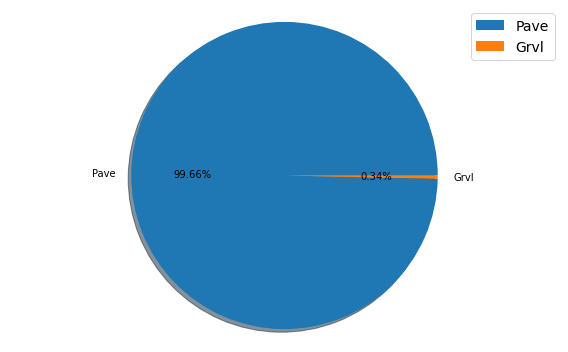

----------------------------------------------------------------------------------------------------
Pie plot for the column: LotShape
Reg    740
IR1    390
IR2     32
IR3      6
Name: LotShape, dtype: int64


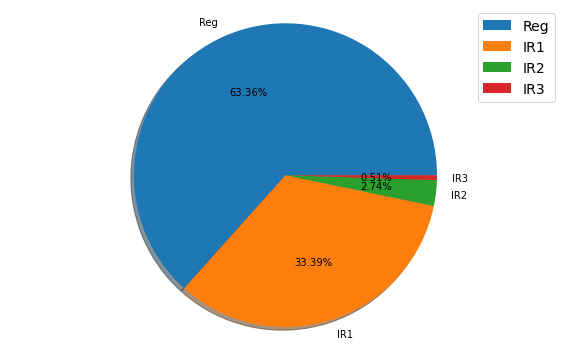

----------------------------------------------------------------------------------------------------
Pie plot for the column: LandContour
Lvl    1046
Bnk      50
HLS      42
Low      30
Name: LandContour, dtype: int64


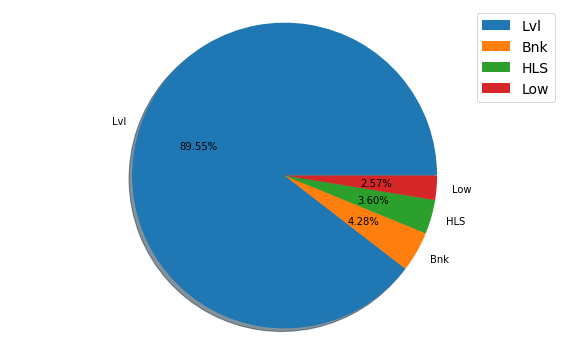

----------------------------------------------------------------------------------------------------
Pie plot for the column: LandSlope
Gtl    1105
Mod      51
Sev      12
Name: LandSlope, dtype: int64


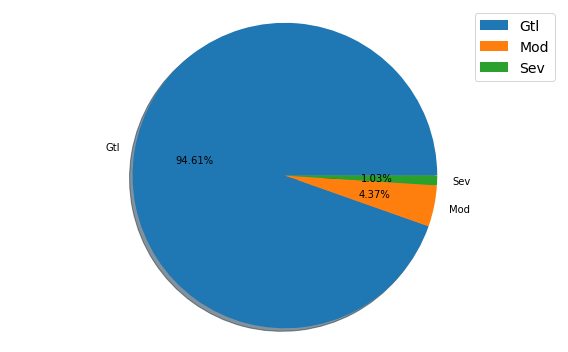

----------------------------------------------------------------------------------------------------
Pie plot for the column: MasVnrType
None       703
BrkFace    354
Stone       98
BrkCmn      13
Name: MasVnrType, dtype: int64


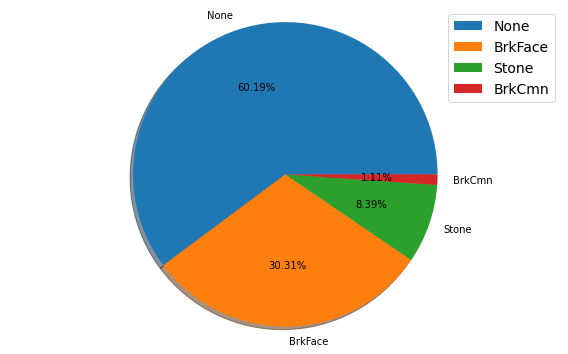

----------------------------------------------------------------------------------------------------
Pie plot for the column: ExterQual
TA    717
Gd    397
Ex     43
Fa     11
Name: ExterQual, dtype: int64


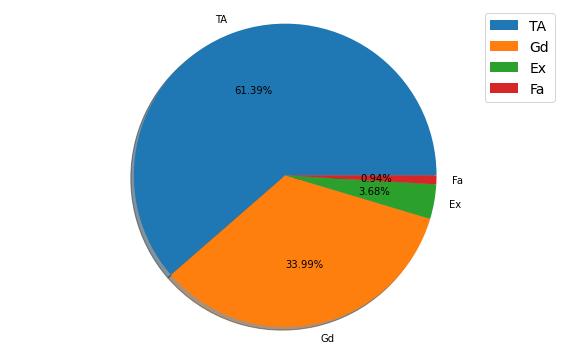

----------------------------------------------------------------------------------------------------
Pie plot for the column: BsmtQual
TA    547
Gd    498
Ex     94
Fa     29
Name: BsmtQual, dtype: int64


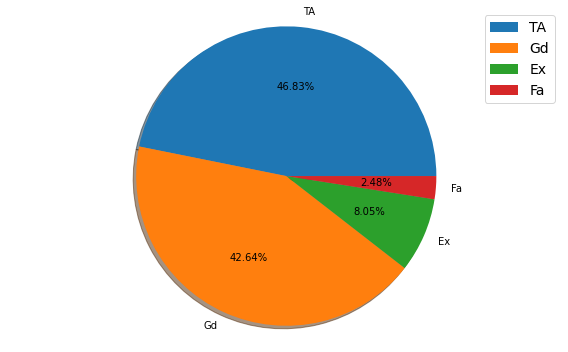

----------------------------------------------------------------------------------------------------
Pie plot for the column: BsmtCond
TA    1071
Gd      56
Fa      39
Po       2
Name: BsmtCond, dtype: int64


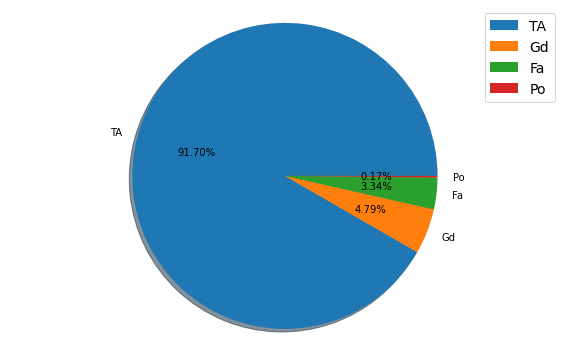

----------------------------------------------------------------------------------------------------
Pie plot for the column: BsmtExposure
No    787
Av    180
Gd    108
Mn     93
Name: BsmtExposure, dtype: int64


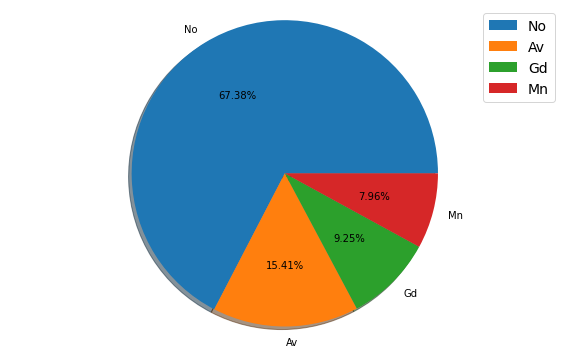

----------------------------------------------------------------------------------------------------
Pie plot for the column: CentralAir
Y    1090
N      78
Name: CentralAir, dtype: int64


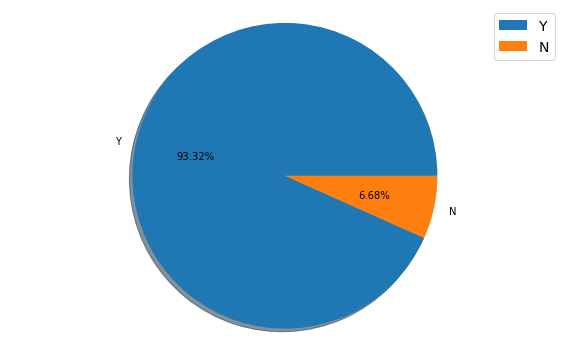

----------------------------------------------------------------------------------------------------
Pie plot for the column: KitchenQual
TA    578
Gd    478
Ex     82
Fa     30
Name: KitchenQual, dtype: int64


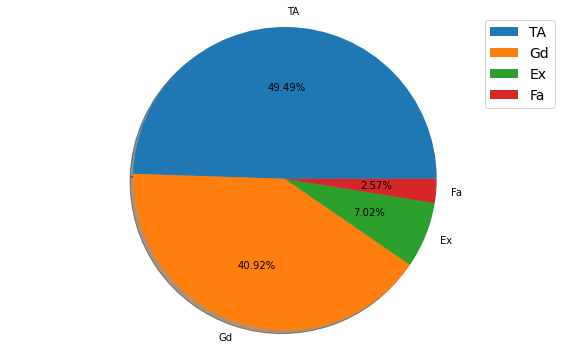

----------------------------------------------------------------------------------------------------
Pie plot for the column: GarageFinish
Unf    551
RFn    339
Fin    278
Name: GarageFinish, dtype: int64


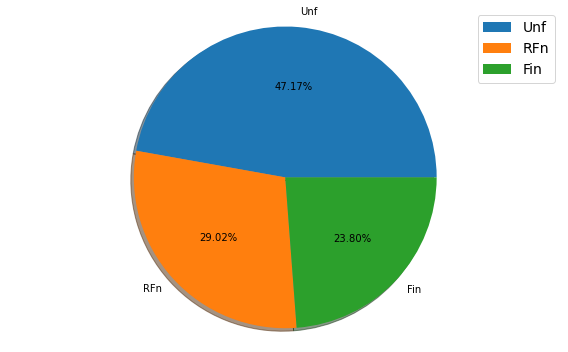

----------------------------------------------------------------------------------------------------
Pie plot for the column: PavedDrive
Y    1071
N      74
P      23
Name: PavedDrive, dtype: int64


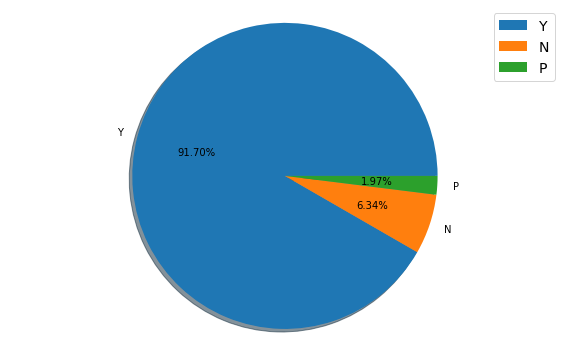

----------------------------------------------------------------------------------------------------


In [45]:
def plot_piechart(p):
    plt.figure(figsize=(8,5))
    plt.pie(p.value_counts(), labels=p.value_counts().index, autopct='%1.2f%%',shadow=True,)
    plt.legend(prop={'size':14})
    plt.axis('equal')
    plt.tight_layout()
    return plt.show()

columns = ['Street', 'LotShape','LandContour','LandSlope', 'MasVnrType','ExterQual','BsmtQual','BsmtCond','BsmtExposure','CentralAir','KitchenQual','GarageFinish','PavedDrive']

plotnumber=1
for i in train_hp[columns]:
    print(f"Pie plot for the column:", i)
    print(train_hp[i].value_counts())
    plot_piechart(train_hp[i])
    print("-"*100)

OBSERVATIONS :  
**Street**: The count of road access to the property Paved is 1164 which covers around 99.66 % of the property where Graved type has count 4 that is only 0.34 %.  
**LotShape**: The count is high for the property having the shape regular followed by slightly regular and the count is less for irregular shape of property.  
**LandContour**: The total number of flatness of the property for level is high which has 89.55 % and the others like banked, hillside and depression have very less flatness of area.  
**LandSlope**: The slope of the property Gentle slope has very high count of 1105 i.e, 94.61 % and other types Moderate Slope and Severe Slope have very less count.  
**MasVnrType**: Around 60 % of the houses does not have Masonry veneer type, 30 % of the houses contains Brick Face type of Masonry veneer.  
**ExterQual**: Around 61 % of the houses evaluates typical/average quality of the material on the exterior, 34 % of the houses have good quality of the material on the exterior. Only few have excellent quality.  
**BsmtQual**: Most of the houses evaluates typical/average and good quality of heoght of the basement, only few of the houses have excellent quality.  
**BsmtCond**: Around 91 % of the houses have typical/average condition of the basement and only 2 houses have poor condion.  
**BsmtExposure**: Around 67 % of the houses does not contain any walkout or garden level walls and 7 % of the houses have minimum exposure.  
**CentralAir**: 93.32 % of the houses have central air conditioning and only 6.68 % of houses do not have air conditioning.  
**KitchenQual**: 49 % of the houses contains typical/average kitchen quality and 40 % of the houses have good kutchen quality. The count for excellent kitchen quality is very low and is around 2 %.  
**GarageFinish**: 47 % Of the houses have unfinished garage interior, 29 % rough finished and only 23 % of the houses' interior garage has finished.  
**PavedDrive**: 91.70 % of the houses contains the paved drive way.  

In [46]:
def plot_countplot(col):
    counts=len(train_hp[col].value_counts())
    if counts<3:
        plt.figure(figsize=(8,5))
    elif counts<5:
        plt.figure(figsize=(8,5))
        plt.xticks(rotation=90)
    elif counts<10:
        plt.figure(figsize=(10,6))
        plt.xticks(rotation=90)
    else:
        plt.figure(figsize=(10,8))
        plt.xticks(rotation=90)
    sns.countplot(x=col,data=train_hp,palette="Paired")
    plt.show()
    print("-"*100)

RL         928
RM         163
FV          52
RH          16
C (all)      9
Name: MSZoning, dtype: int64


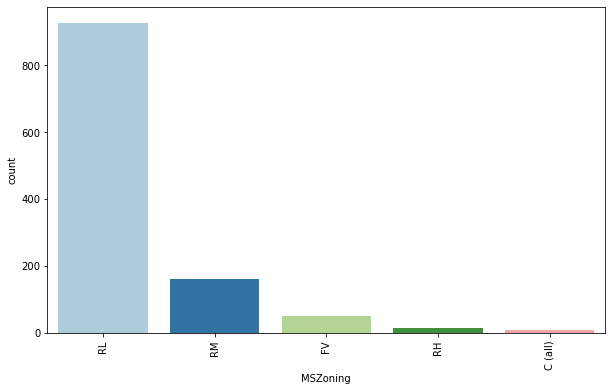

----------------------------------------------------------------------------------------------------
Inside     842
Corner     222
CulDSac     69
FR2         33
FR3          2
Name: LotConfig, dtype: int64


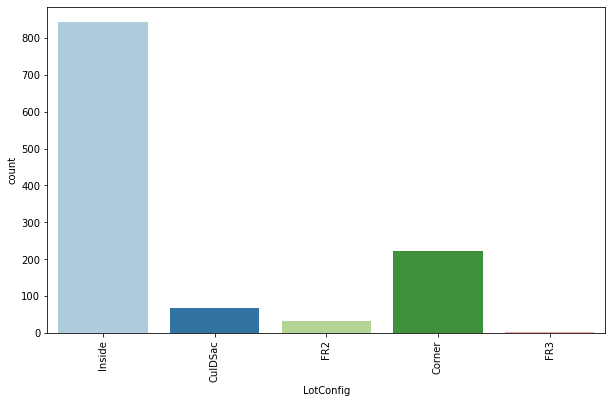

----------------------------------------------------------------------------------------------------
NAmes      182
CollgCr    118
OldTown     86
Edwards     83
Somerst     68
Gilbert     64
NridgHt     61
Sawyer      60
NWAmes      59
SawyerW     51
BrkSide     50
Crawfor     45
NoRidge     35
Mitchel     34
IDOTRR      30
Timber      24
ClearCr     24
SWISU       21
StoneBr     19
Blmngtn     15
BrDale      11
MeadowV      9
Veenker      9
NPkVill      8
Blueste      2
Name: Neighborhood, dtype: int64


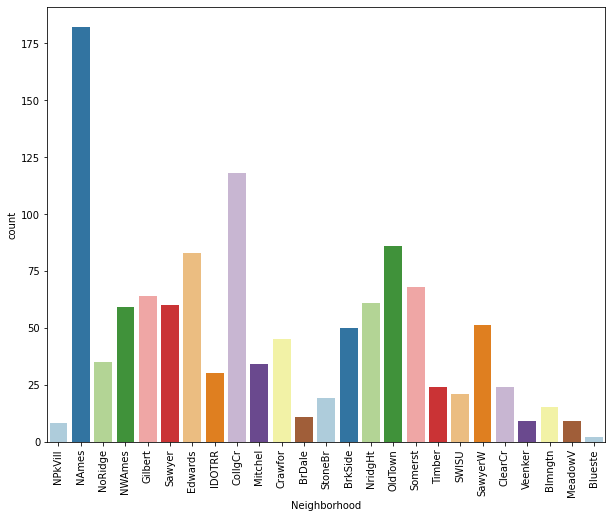

----------------------------------------------------------------------------------------------------
Norm      1005
Feedr       67
Artery      38
RRAn        20
PosN        17
RRAe         9
PosA         6
RRNn         4
RRNe         2
Name: Condition1, dtype: int64


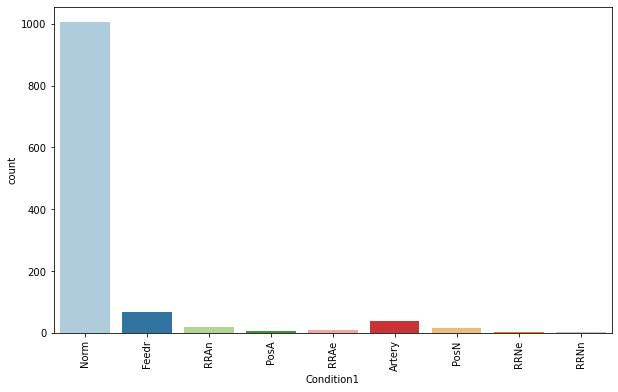

----------------------------------------------------------------------------------------------------
Norm      1154
Feedr        6
Artery       2
PosN         2
RRNn         1
RRAn         1
PosA         1
RRAe         1
Name: Condition2, dtype: int64


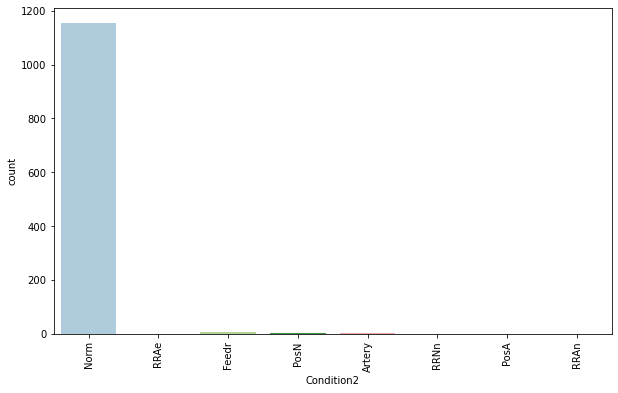

----------------------------------------------------------------------------------------------------
1Fam      981
TwnhsE     90
Duplex     41
Twnhs      29
2fmCon     27
Name: BldgType, dtype: int64


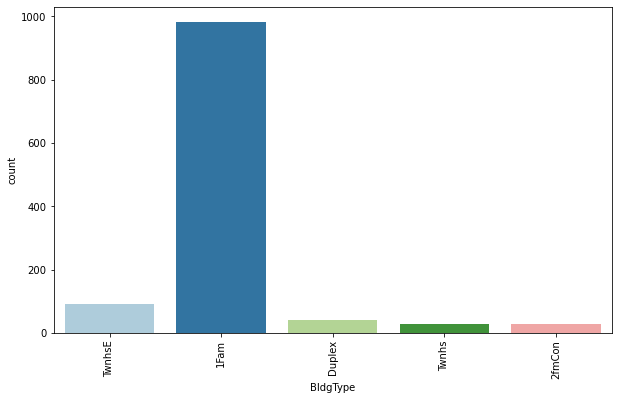

----------------------------------------------------------------------------------------------------
1Story    578
2Story    361
1.5Fin    121
SLvl       47
SFoyer     32
1.5Unf     12
2.5Unf     10
2.5Fin      7
Name: HouseStyle, dtype: int64


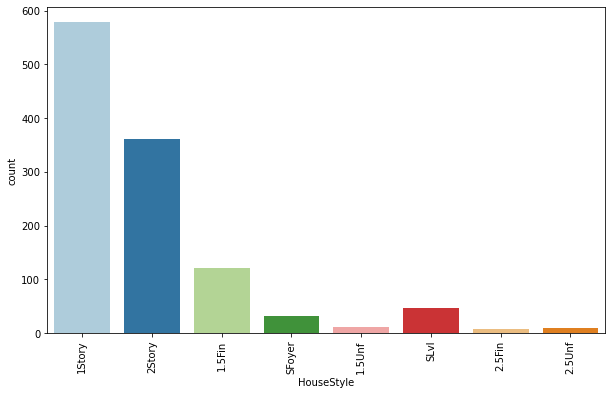

----------------------------------------------------------------------------------------------------
Gable      915
Hip        225
Flat        12
Gambrel      9
Mansard      5
Shed         2
Name: RoofStyle, dtype: int64


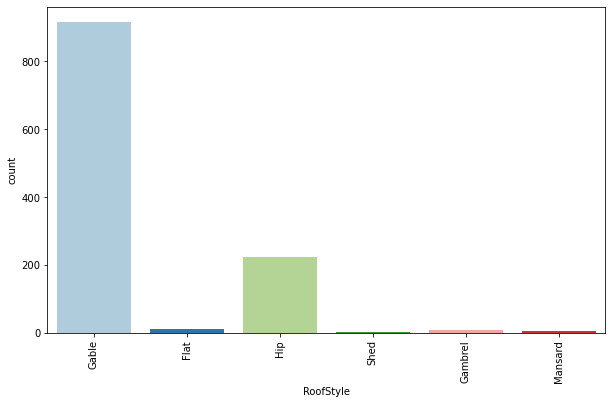

----------------------------------------------------------------------------------------------------
CompShg    1144
Tar&Grv      10
WdShngl       6
WdShake       4
ClyTile       1
Metal         1
Membran       1
Roll          1
Name: RoofMatl, dtype: int64


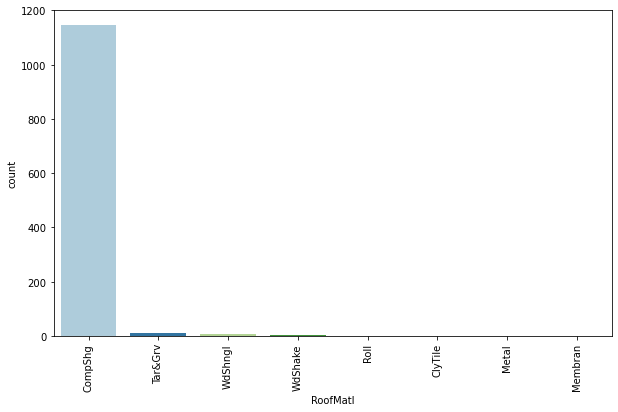

----------------------------------------------------------------------------------------------------
VinylSd    396
HdBoard    179
MetalSd    178
Wd Sdng    174
Plywood     93
CemntBd     42
BrkFace     41
Stucco      22
AsbShng     19
WdShing     19
Stone        2
ImStucc      1
AsphShn      1
BrkComm      1
Name: Exterior1st, dtype: int64


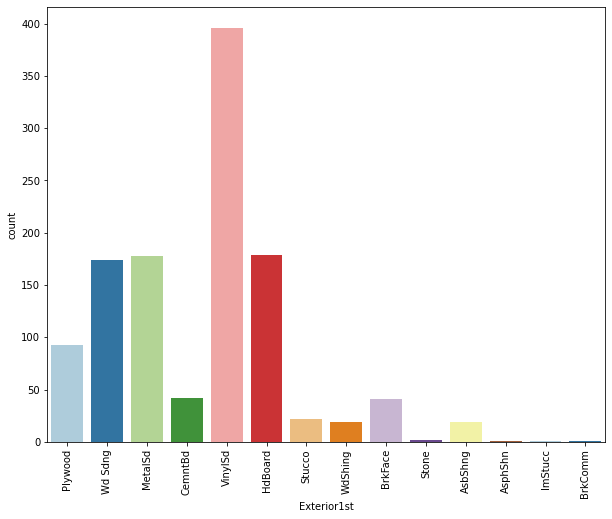

----------------------------------------------------------------------------------------------------
VinylSd    387
MetalSd    173
HdBoard    170
Wd Sdng    165
Plywood    118
CmentBd     42
Wd Shng     31
Stucco      23
BrkFace     20
AsbShng     18
ImStucc      8
Brk Cmn      5
Stone        4
AsphShn      3
Other        1
Name: Exterior2nd, dtype: int64


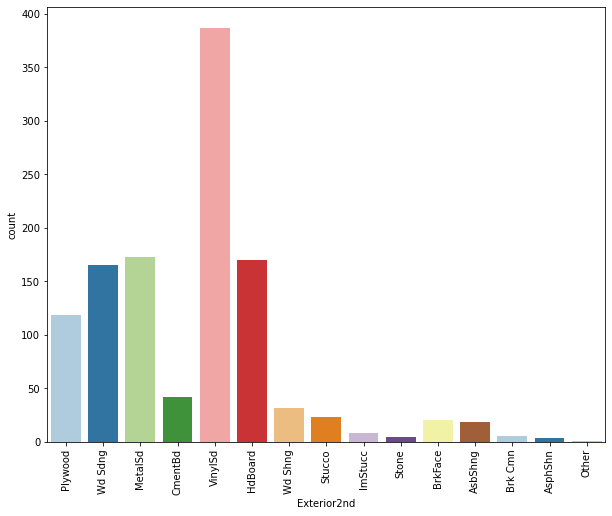

----------------------------------------------------------------------------------------------------
TA    1022
Gd     117
Fa      26
Ex       2
Po       1
Name: ExterCond, dtype: int64


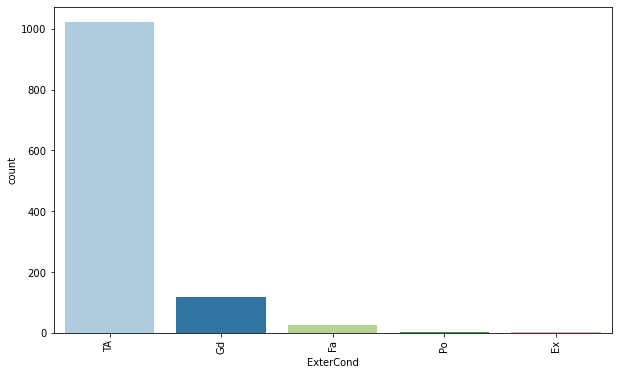

----------------------------------------------------------------------------------------------------
CBlock    516
PConc     513
BrkTil    112
Slab       21
Stone       5
Wood        1
Name: Foundation, dtype: int64


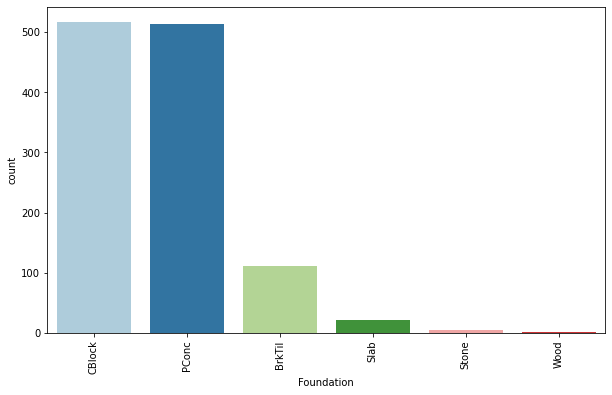

----------------------------------------------------------------------------------------------------
Unf    375
GLQ    330
ALQ    174
BLQ    121
Rec    109
LwQ     59
Name: BsmtFinType1, dtype: int64


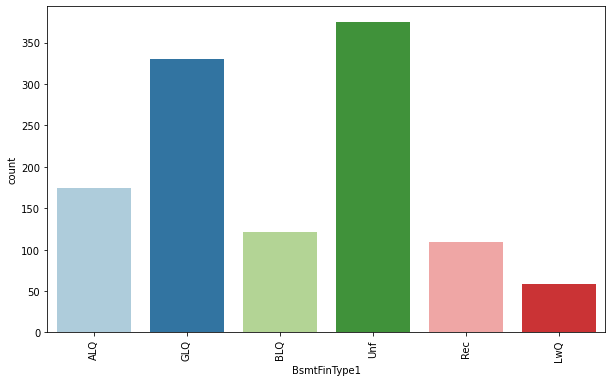

----------------------------------------------------------------------------------------------------
Unf    1033
Rec      43
LwQ      40
BLQ      24
ALQ      16
GLQ      12
Name: BsmtFinType2, dtype: int64


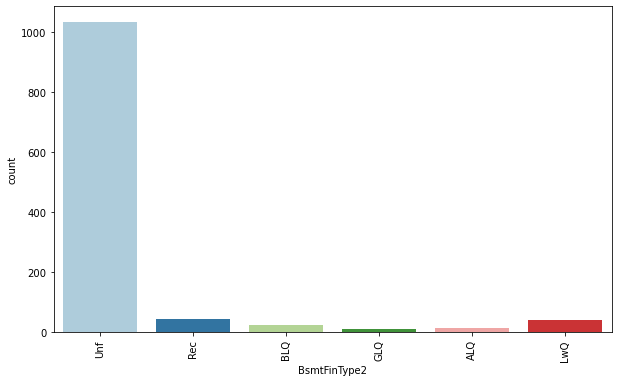

----------------------------------------------------------------------------------------------------
GasA     1143
GasW       14
Grav        5
Wall        4
Floor       1
OthW        1
Name: Heating, dtype: int64


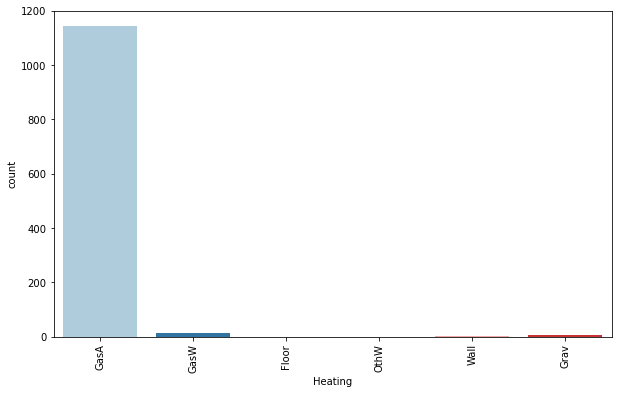

----------------------------------------------------------------------------------------------------
Ex    585
TA    352
Gd    192
Fa     38
Po      1
Name: HeatingQC, dtype: int64


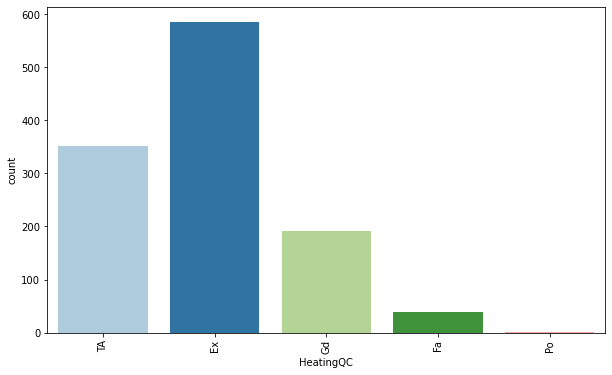

----------------------------------------------------------------------------------------------------
SBrkr    1070
FuseA      74
FuseF      21
FuseP       2
Mix         1
Name: Electrical, dtype: int64


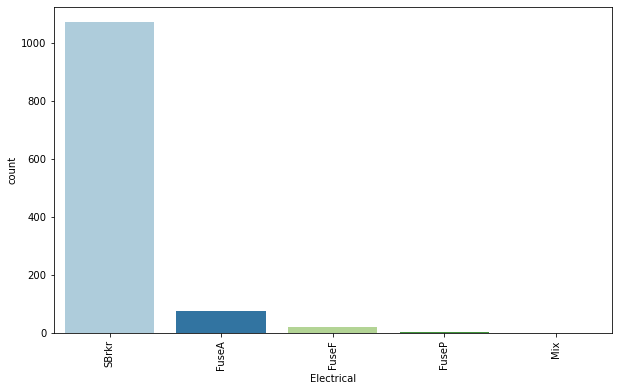

----------------------------------------------------------------------------------------------------
Typ     1085
Min2      30
Min1      25
Mod       12
Maj1      11
Maj2       4
Sev        1
Name: Functional, dtype: int64


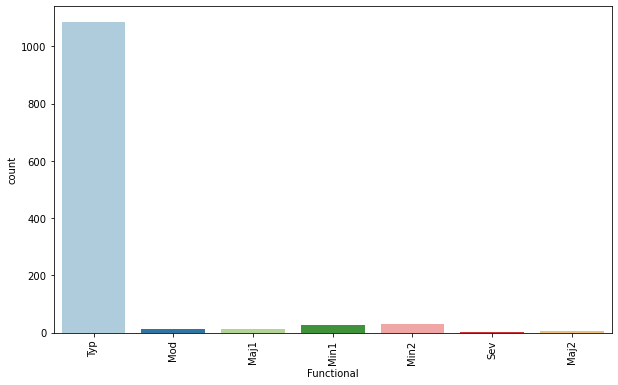

----------------------------------------------------------------------------------------------------
Gd    852
TA    252
Fa     25
Ex     21
Po     18
Name: FireplaceQu, dtype: int64


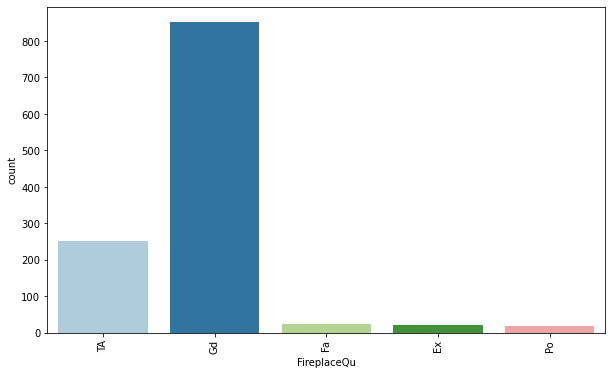

----------------------------------------------------------------------------------------------------
Attchd     755
Detchd     314
BuiltIn     70
Basment     16
CarPort      8
2Types       5
Name: GarageType, dtype: int64


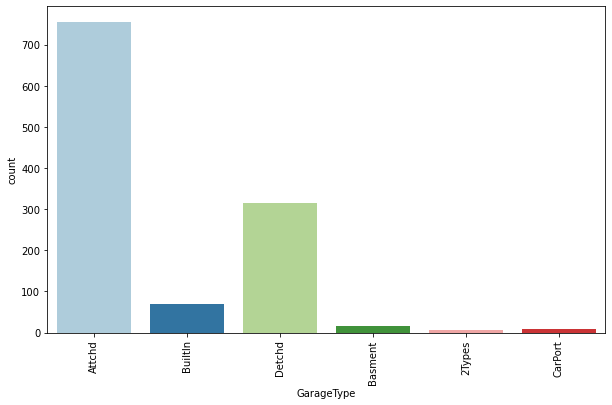

----------------------------------------------------------------------------------------------------
TA    1114
Fa      39
Gd      11
Po       2
Ex       2
Name: GarageQual, dtype: int64


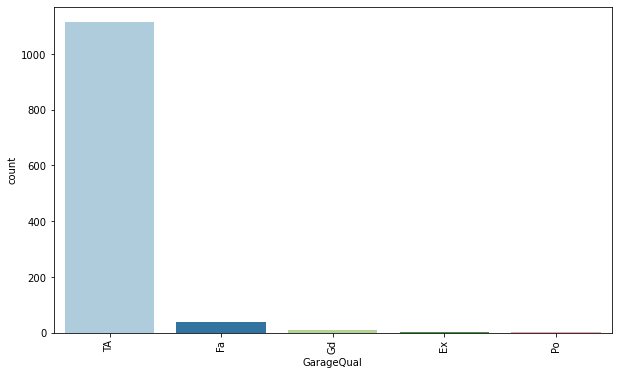

----------------------------------------------------------------------------------------------------
TA    1125
Fa      28
Gd       8
Po       6
Ex       1
Name: GarageCond, dtype: int64


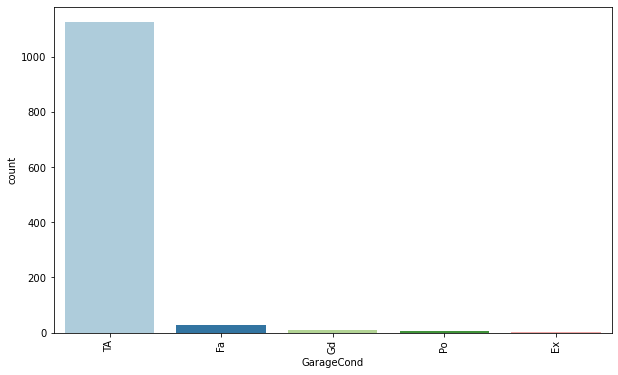

----------------------------------------------------------------------------------------------------
WD       999
New      106
COD       38
ConLD      8
ConLI      5
ConLw      4
CWD        3
Oth        3
Con        2
Name: SaleType, dtype: int64


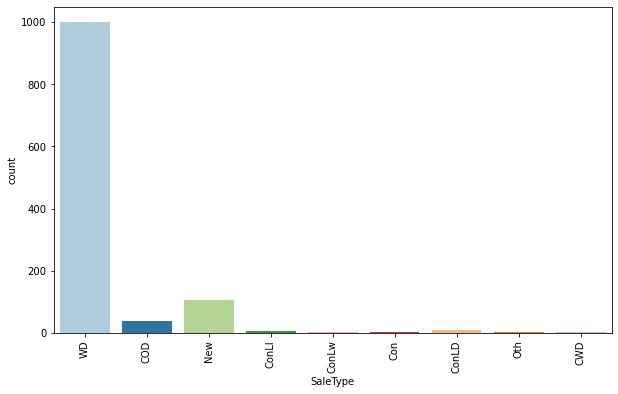

----------------------------------------------------------------------------------------------------
Normal     945
Partial    108
Abnorml     81
Family      18
Alloca      12
AdjLand      4
Name: SaleCondition, dtype: int64


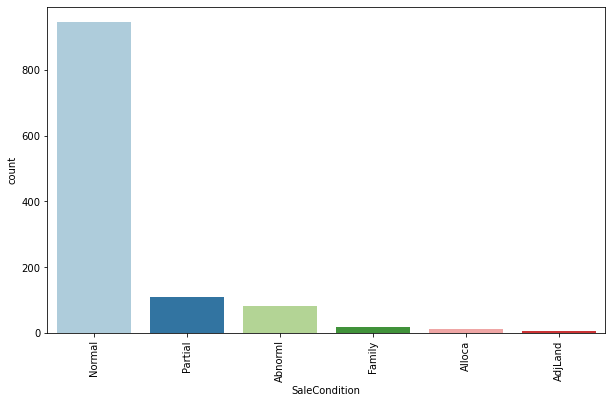

----------------------------------------------------------------------------------------------------


In [47]:
train_count = train_hp[['MSZoning','LotConfig','Neighborhood','Condition1','Condition2','BldgType','HouseStyle','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','ExterCond','Foundation','BsmtFinType1','BsmtFinType2','Heating','HeatingQC','Electrical','Functional','FireplaceQu','GarageType','GarageQual','GarageCond','SaleType','SaleCondition']]
for i in train_count:
    print(train_count[i].value_counts())
    plot_countplot(i)

OBSERVATIONS :  
**MSZoning**: The houses having Residential Low Density zoning of the sale have high count and commercial zoning sale have very less count compared to others.  
**LotConfig**: Inside lot configiration has high count and Frontage on 3 sides of property have very less count compared to others.  
**Neighborhood**: The count is high for the North Ames cities floowed by college creek and count is very low for Bluestem.  
**Condition1**: The count is high for the Normal proximity condition apart from this all the others have very less count.  
**Condition2**: Similar to condition1, in comdition2 also Normal proximity has very high count compared to others.  
**BldgType**: Single-family detached dwelling type has very high counts compared to other types have very less count.  
**HouseStyle**: 1 story style of dwelling has high count followed by 2 story and others have very less count.  
**RoofStyle**: The flat type roof has high count and shed has very less count.  
**RoofMatl**: The roof material type Standard (Composite) Shingle has highest count and others have very less counts.  
**Exterior1st**: Most of the houses have Vinyl Siding exterior covering materials followed by hard board also Brick Common, Asphalt Shingles and Imitation Stucco have very count which means there are no more houses with these types.  
**Exterior2nd**: Similar to Exterior1st, here also most of the houses have Vinyl Siding exterior covering materials.  
**ExterCond**: The present condition of the material on the exterior for most of the houses are Average/Typical.  
**Foundation**: Most of the houses have Cinder Block and Poured Contrete type of foundation.  
**BsmtFinType1**: The count is high for the houses having unfinished basement area. Also some houses have Good Living Quarters.   
**BsmtFinType2**: Similar to BsmtFinType1, here also the count is high for unfinished basements.  
**Heating**: Most of the houses have Gas forced warm air furnace heating type.  
**HeatingQC**: Most of the houses have excellent heating quality and condition also some houses have typical/average HeatingQC and only 1 % of the houses have poor heating quality and condition.  
**Electrical**: The electrical system of the type Standard Circuit Breakers & Romex has very high count which means most of the houses have this facility.  
**Functional**: The total number of home functionality of the property for typical functionality have high count compared to others.  
**FireplaceQuv**: The houses with Masonry Fireplace in main level have good quality compared ot others.  
**GarageType**: The garage location attachec to home has high count also the garage locations detached to home have moderate level of counts. Only few houses have car port and more than one type of garage.  
**GarageQual**: Houses with typical/average garage quality have high count compared to others.  
**GarageCond**: Houses with typical/average garage condition have high count compared to others.  
**SaleType**: Warranty Deed type of sale has high count followed by Home just constructed and sold(new).  
**SaleCondition**: Normal sale has high count also the home which was not completed when last assessed also has average sale condition.  

Plotting numerical columns using Distribution plot.

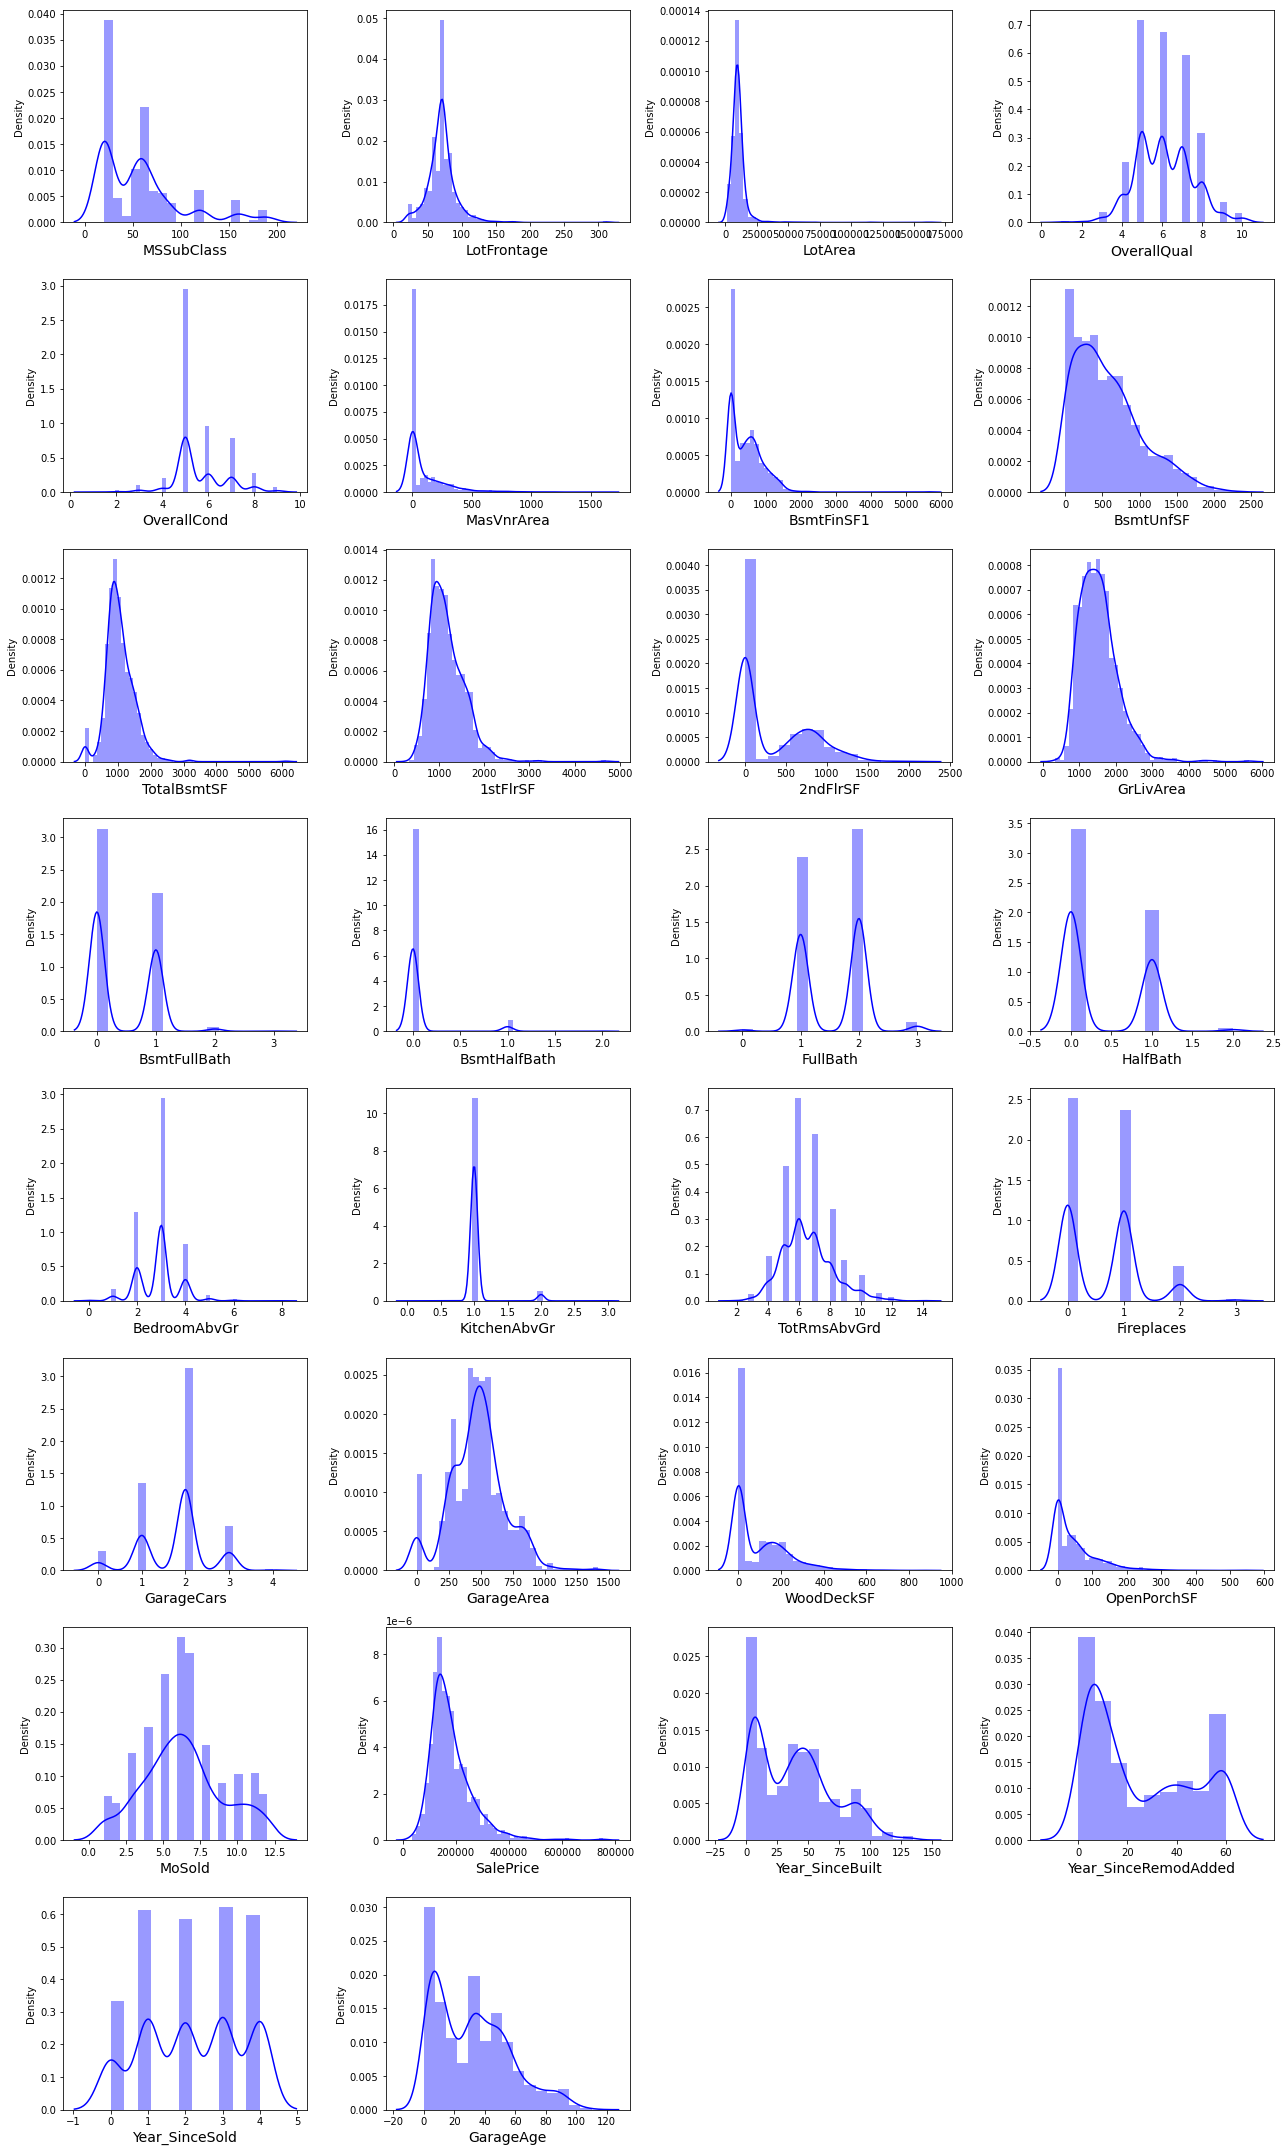

In [48]:
# Checking how the data has been distriubted in each column (Distibution Plot)

plt.figure(figsize=(18,30),facecolor='white')
plotnumber=1
for col in numerical_col:
    if plotnumber<=30:
        ax=plt.subplot(8,4,plotnumber)
        sns.distplot(train_hp[col],color="b")
        plt.xlabel(col,fontsize=14)
    plotnumber+=1
plt.tight_layout()

From the above distribution plots, we can observe most of the columns are not normally distributed only some of the columns are almost normally distributed. Almost all the columns have skewness and are skewed to right, since the mean is greater than the median in these columns. We need to remove this skewness before building our machine learning models.

### Bivariate Analysis

Lets now conduct a bivariate analysis of the target variable and all the other independent variables.

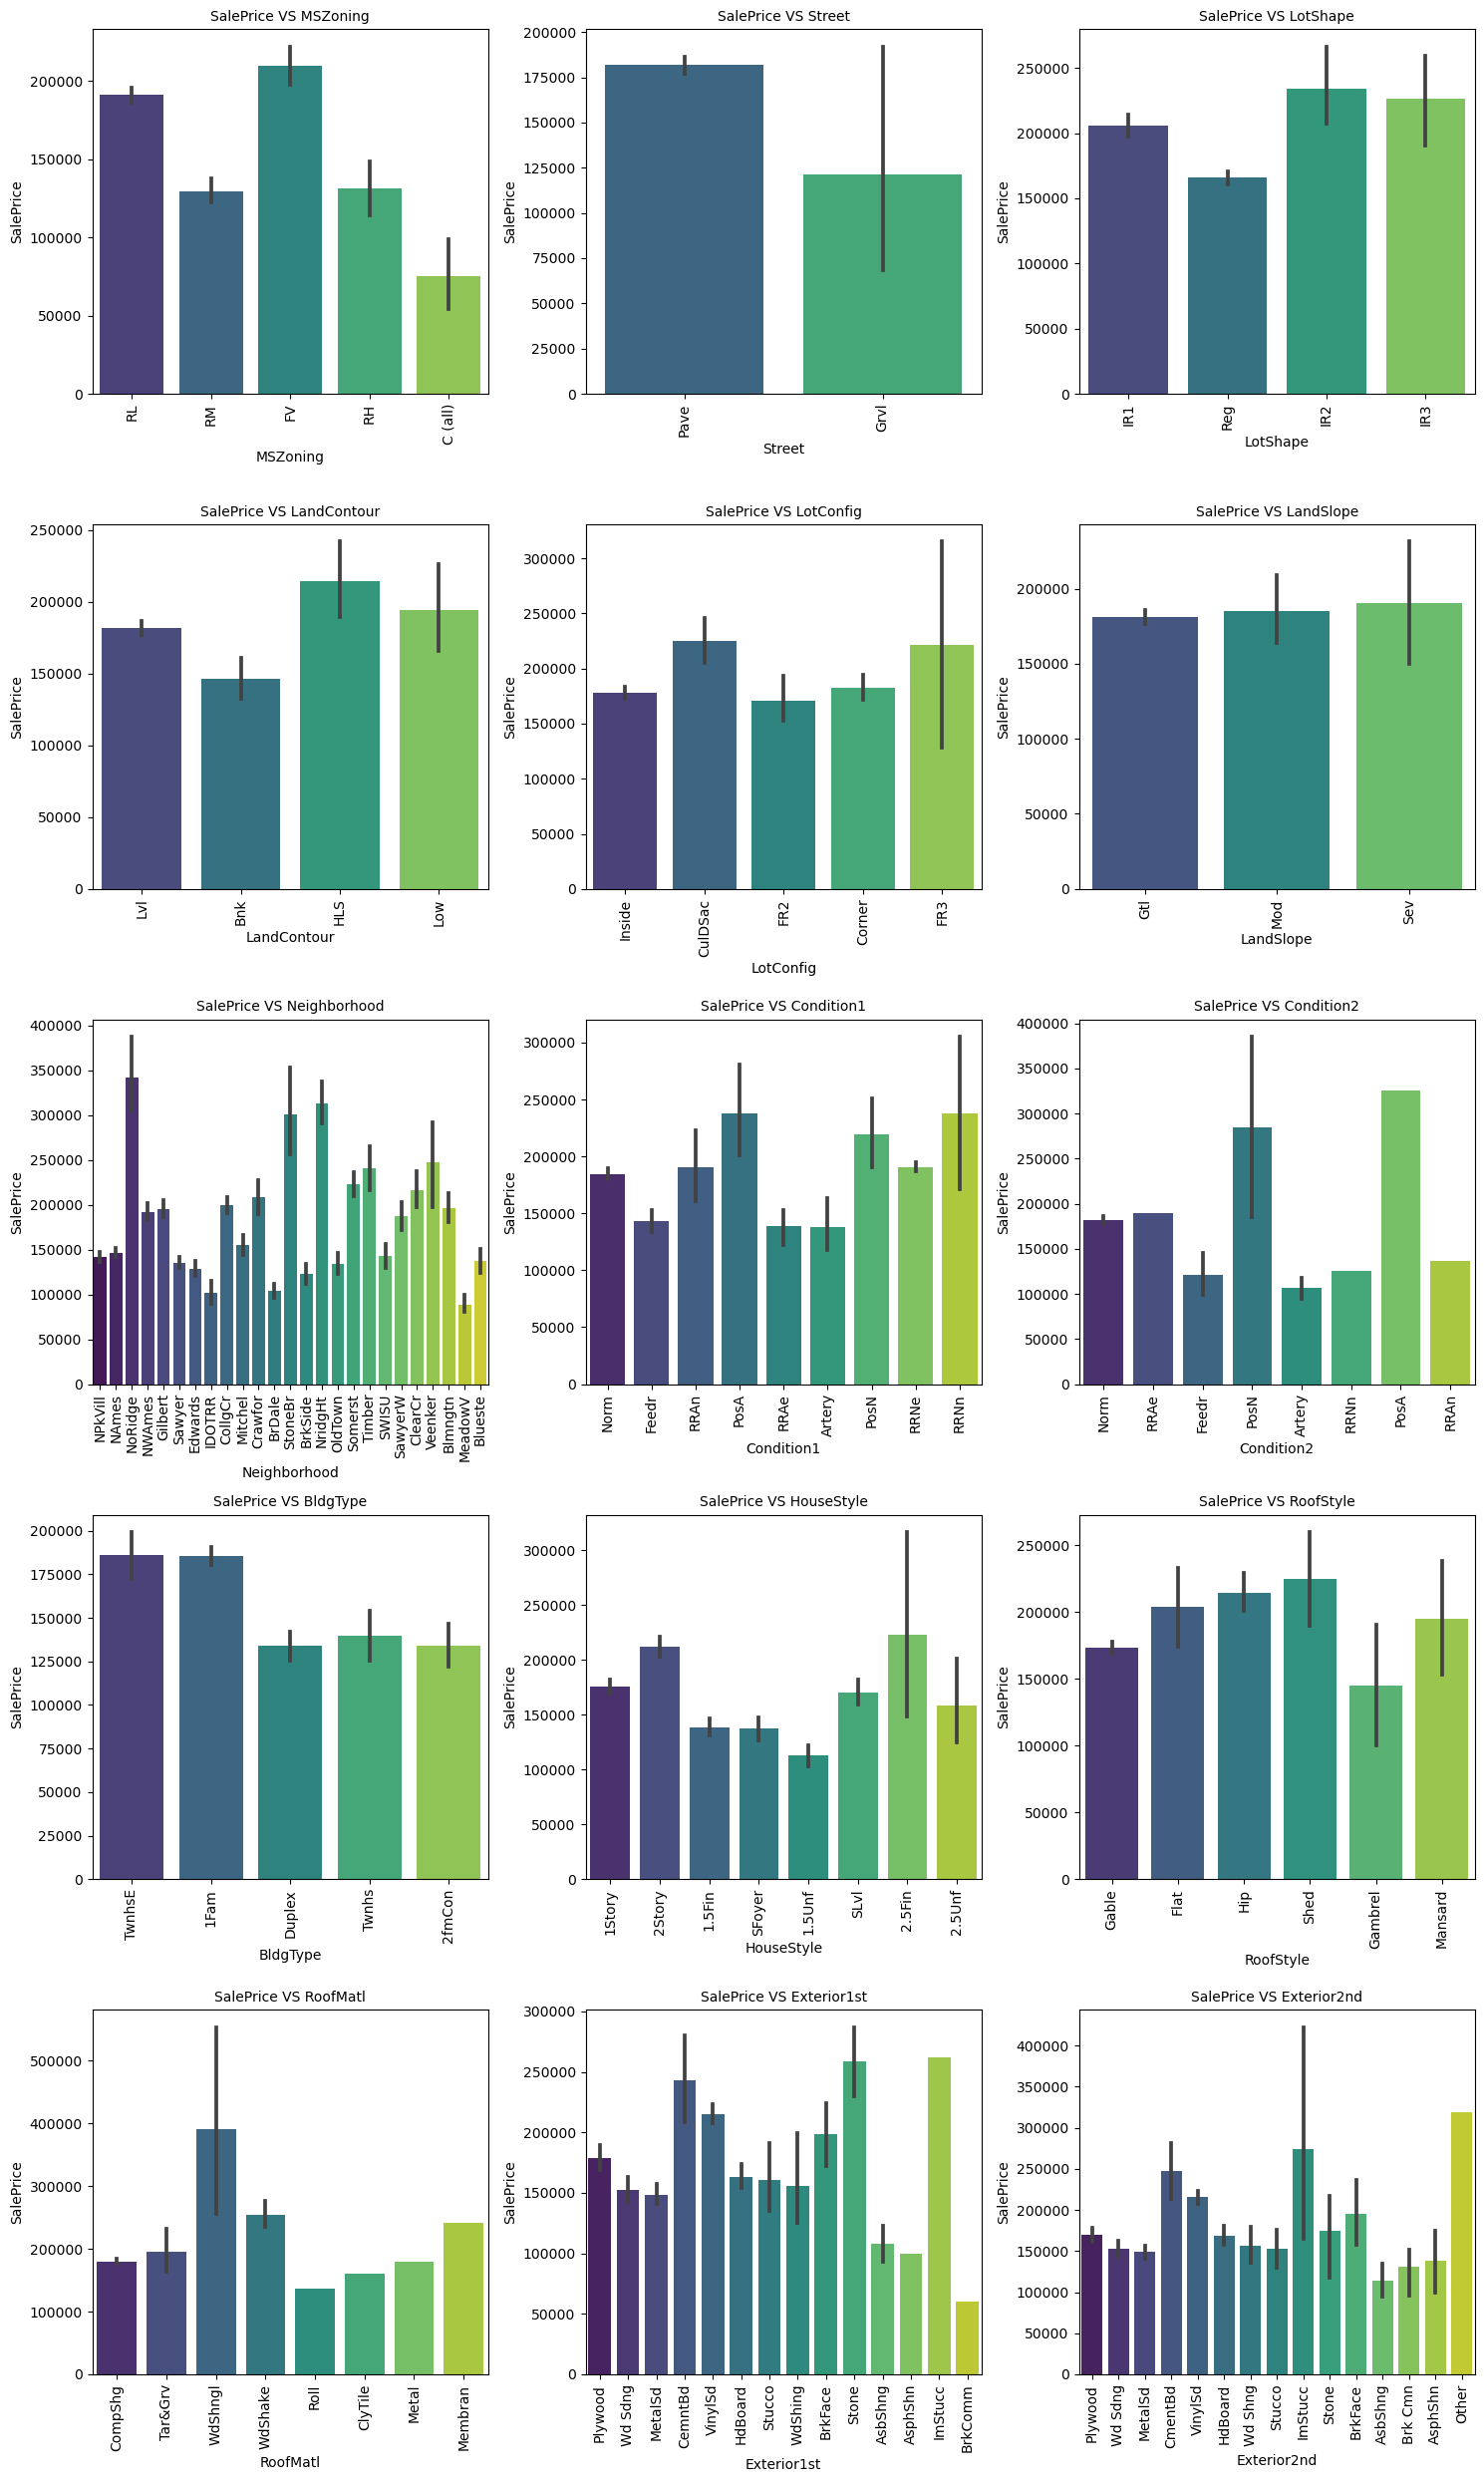

In [49]:
# Checking the relation between categorical variables and target variable
categorical_data1 = ['MSZoning','Street','LotShape','LandContour','LotConfig','LandSlope','Neighborhood','Condition1','Condition2','BldgType','HouseStyle','RoofStyle','RoofMatl','Exterior1st','Exterior2nd']
plt.style.use('default')
plt.figure(figsize=(15,25))
for i in range(len(categorical_data1)):
    plt.subplot(5,3,i+1)
    sns.barplot(y=train_hp['SalePrice'],x=train_hp[categorical_data1[i]],palette="viridis")
    plt.title(f"SalePrice VS {categorical_data1[i]}",fontsize=10)
    plt.xticks(rotation = 90)  
    plt.tight_layout()

OBSERVATIONS :  
**SalePrice vs MSZoning**: Most of the houses are belongs to Floating Village Residential followed by Residential Low Density. The houses from this zone are have high saleprice compared to other zones.  
**SalePrice vs Street**: By observing the bar plot, it is obvious that the property of house with Paved type of road have high SalePrice and the the houses in gravel roads have very less sale price.  
**SalePrice vs LotShape**: Most of the houses having moderately irregular and irregular shape of property have high sale price and houses with regullar type of property have less sale peice compared to others.  
**SalePrice vs LandContour**: The houses having the hillside and depression property flatness have high sale price compared to others.  
**SalePrice vs LotConfig**: Most of the houses with Frontage on 3 sides of property have high sale price compared to others.  
**SalePrice vs LandSlope**: There is no significance difference between the slope of the property. As we can observe the houses having Gentle slope, Moderate Slope and Severe Slope have same sale price.  
**SalePrice vs Neighborhood**: The houses which are located near Northridge have high sale price compared to others.  
**SalePrice vs Condition1**: The houses having the conditions adjacent to postive off-site feature and houses within 200' of North-South Railroad have high sale price compared to others.  
**SalePrice vs Condition2**: The houses having the conditions near positive off-site feature park, greenbelt, etc and adjacent to postive off-site feature have high sale price.  
**SalePrice vs BldgType**: Most of the houses are Single-family Detached and Townhouse End Unit and they have higher sale price compared to other categories.  
**SalePrice vs HouseStyle**: Houses which are having style of dwelling 2nd level finished and Two story have high sale price compared to other types.  
**SalePrice vs RoofStyle**: The houses having the roof style Flat, Hip and Shed have high sale price and the houses having gambrel roof style have less sale price.  
**SalePrice vs RoofMatl**: Houses with Wood Shingles root materials have high sale prices.  
**SalePrice vs Exterior1st**: Houses having Imitation Stucco, Stone and Cement Board as 1st exterior cover have high sale price.  
**SalePrice vs Exterior2nd**: Houses having Imitation Stucco and other as 2nd cover have high sale price.  

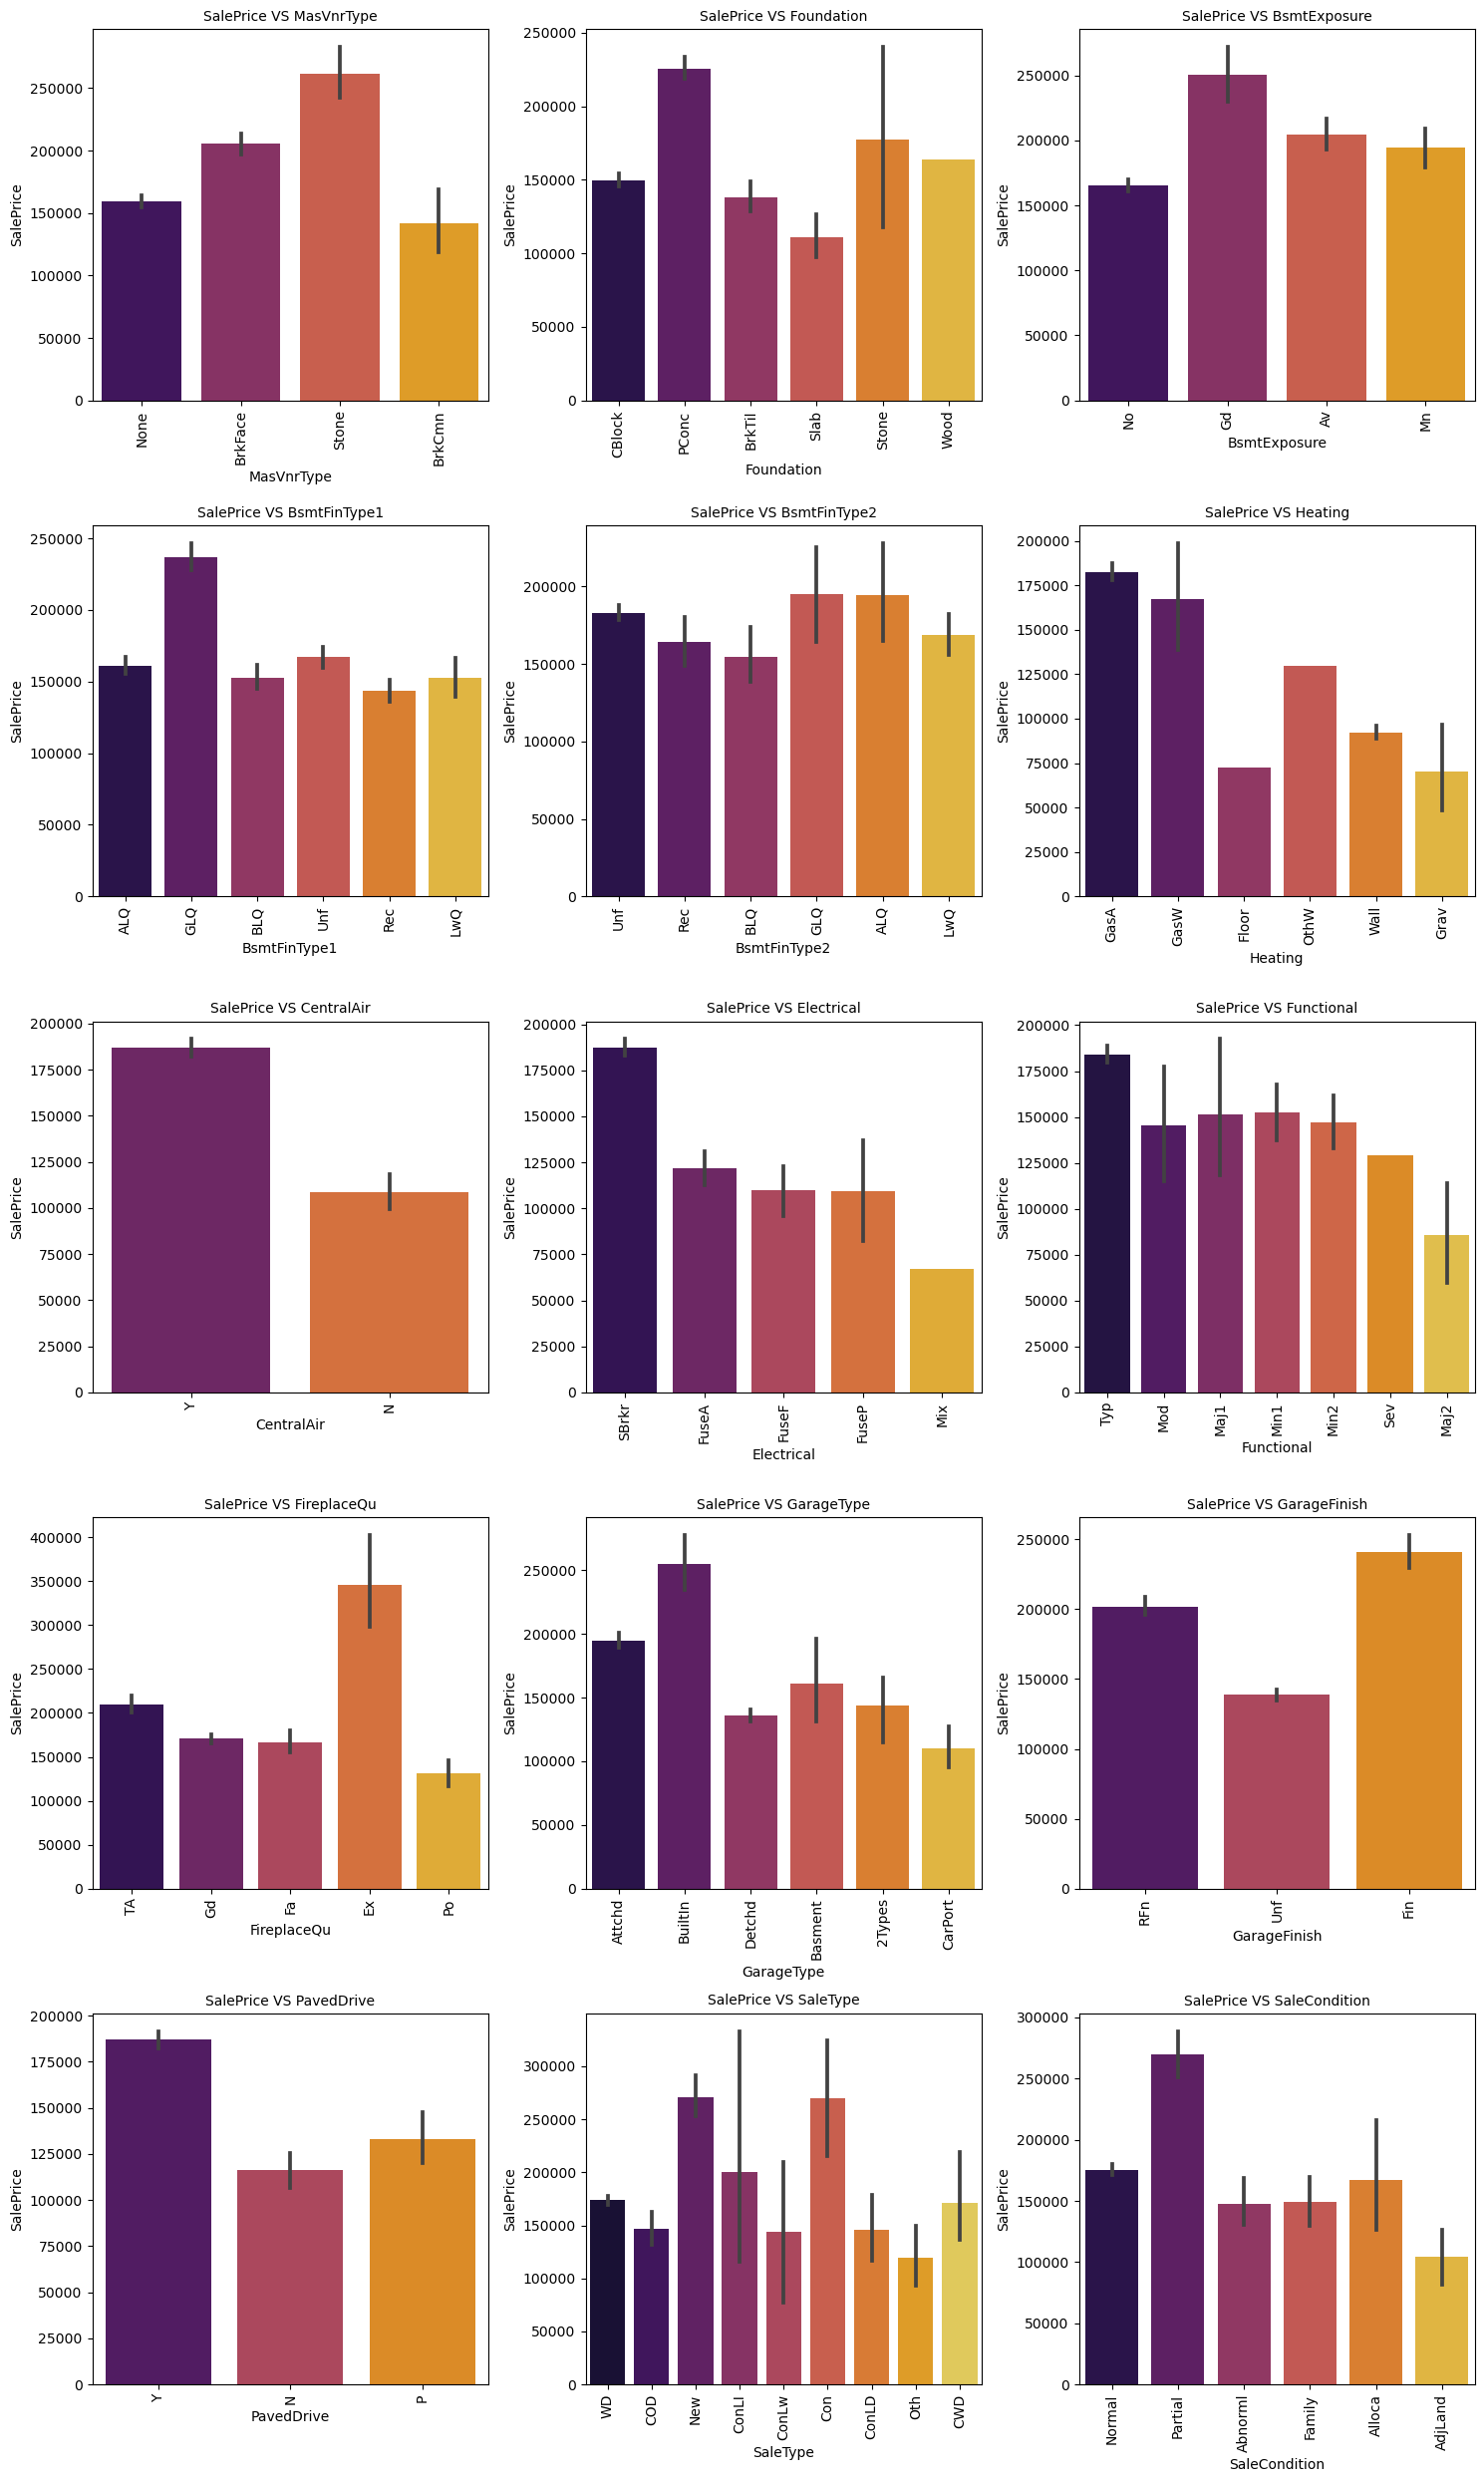

In [50]:
# Checking the relation between categorical variables and target variable
categorical_data2 = ['MasVnrType','Foundation','BsmtExposure','BsmtFinType1','BsmtFinType2','Heating','CentralAir','Electrical','Functional','FireplaceQu','GarageType','GarageFinish','PavedDrive','SaleType','SaleCondition']
plt.style.use('default')
plt.figure(figsize=(15,25))
for i in range(len(categorical_data2)):
    plt.subplot(5,3,i+1)
    sns.barplot(y=train_hp['SalePrice'],x=train_hp[categorical_data2[i]],palette="inferno")
    plt.title(f"SalePrice VS {categorical_data2[i]}",fontsize=10)
    plt.xticks(rotation = 90)  
    plt.tight_layout()

OBSERVATIONS :  
**SalePrice vs MasVnrType****: Houses having Stone Masonry veneer type have high sale price than other types.  
**SalePrice vs Foundation**: Houses having Poured Contrete as foundation type have high sale price compared to other types.  
**SalePrice vs BsmtExposure**: Houses having good walkout or garden level walls have high sale price compared to others.  
**SalePrice vs BsmtFinType1**: The sale price is high for the houses containing good living quarters basement finished area.  
**SalePrice vs BsmtFinType2**: The sale price is moderately high for the houses having good living quarters and average living quarters.  
**SalePrice vs Heating**: The houses having the heating type gas forced warm air furnace and gas hot water or steam heat have high sale price.  
**SalePrice vs CentralAir**: Most of the houses have central air conditioning so it is obvious that these houses have high sale price.  
**SalePrice vs Electrical**: Most of the houses having standard circuit breakers & romex have high sale price compared to others.  
**SalePrice vs Functional**: The houses having the typical functionality have maximum sales price and others have average sale price.  
**SalePrice vs FireplaceQu**: The houses having excellent exceptional masonry fireplace quality have high sale price and the houses having poor fireplace quality have very less sale price compared to others.  
**SalePrice vs GarageType**: The houses having built-in garage have high sale price compared to others.  
**SalePrice vs GarageFinishv**: Garages located inside the house which is got finished have high sale price.   
**SalePrice vs PavedDrive**: Houses having paved drive ways have high sale price.  
**SalePrice vs SaleType**: Many houses having sale types as just constructed and sold and Contract 15 % Down payment regular terms have high sale price.  
**SalePrice vs SaleCondition**: Houses having partial sale condition that is home was not completed when last assessed have high sale price.  

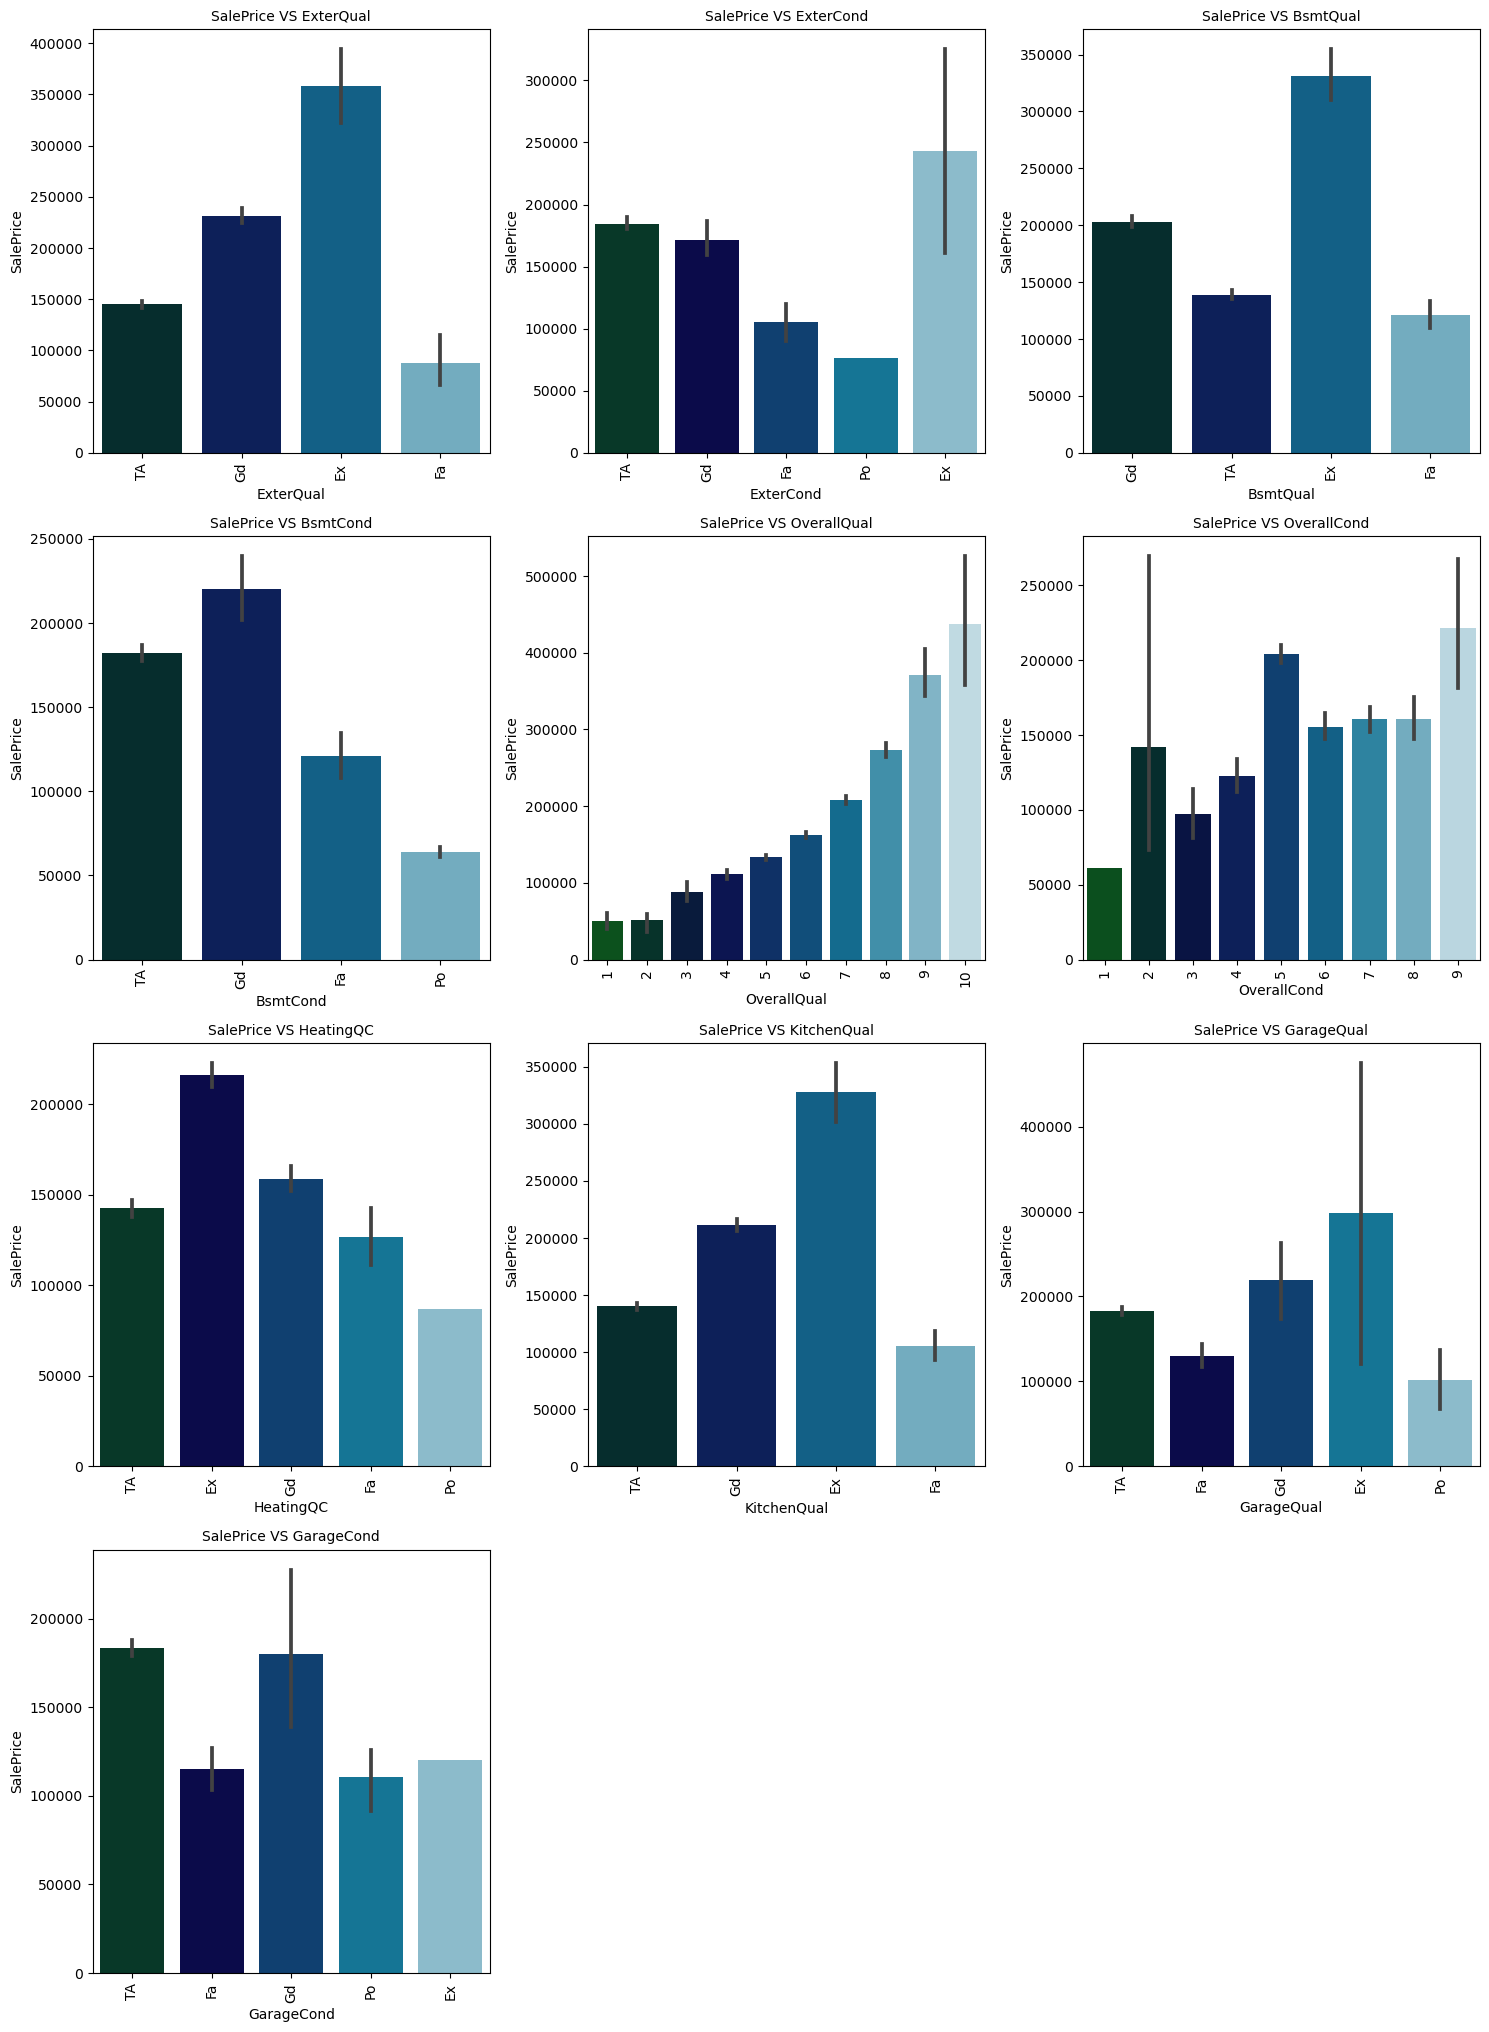

In [51]:
# Checking the relation between categorical variables and target variable
categorical_data3 = ['ExterQual','ExterCond','BsmtQual','BsmtCond','OverallQual','OverallCond','HeatingQC','KitchenQual','GarageQual','GarageCond']
plt.style.use('default')
plt.figure(figsize=(15,25))
for i in range(len(categorical_data3)):
    plt.subplot(5,3,i+1)
    sns.barplot(y=train_hp['SalePrice'],x=train_hp[categorical_data3[i]],palette="ocean")
    plt.title(f"SalePrice VS {categorical_data3[i]}",fontsize=10)
    plt.xticks(rotation = 90)  
    plt.tight_layout()

OBSERVATIONS :  
**SalePrice vs ExterQual**: Houses having excellent quality of the material on the exterior have high sale price and houses having fair quality have very less sale price.  
**SalePrice vs ExterCond**: Houses having excellent condition of the material on the exterior have high sale price and the houses having poor condition of the material on the exterior have very less sale price compared to others.  
**SalePrice vs BsmtQual**: The houses which evaluates the excellent quality of height of the basement have high sale price compared to others.  
**SalePrice vs BsmtCond**: The houses which evaluates the good quality of general condition of the basement have high sale price compared to others.  
**SalePrice vs OverallQual**: The houses which have very excellent overall quality like material and finish of the house have high sale price. Also we can observe from the plot as the overall quality of the house increases, the sale price also increases. That is there is good linear relation between SalePrice and OverallQual.  
**SalePrice vs OverallCond**: The houses having overall condition as excellent and average have very high sale price compared to others.  
**SalePrice vs HeatingQC**: Most of the houses having excellent heating quality and condition have high sale price.  
**SalePrice vs KitchenQual**: Houses having excellent quality of the kitchen have high sale price compared to others.  
**SalePrice vs GarageQual**: The sale price of the house is high for the houses having excellent garage quality.  
**SalePrice vs GarageCond**: Houses having typical/average garage condition have high sale price and the houses having good garage condition also have high sales price compared to others.  

Now the visualizations for the numerical columns. We will use regplot & stripplot for visulaizatios.

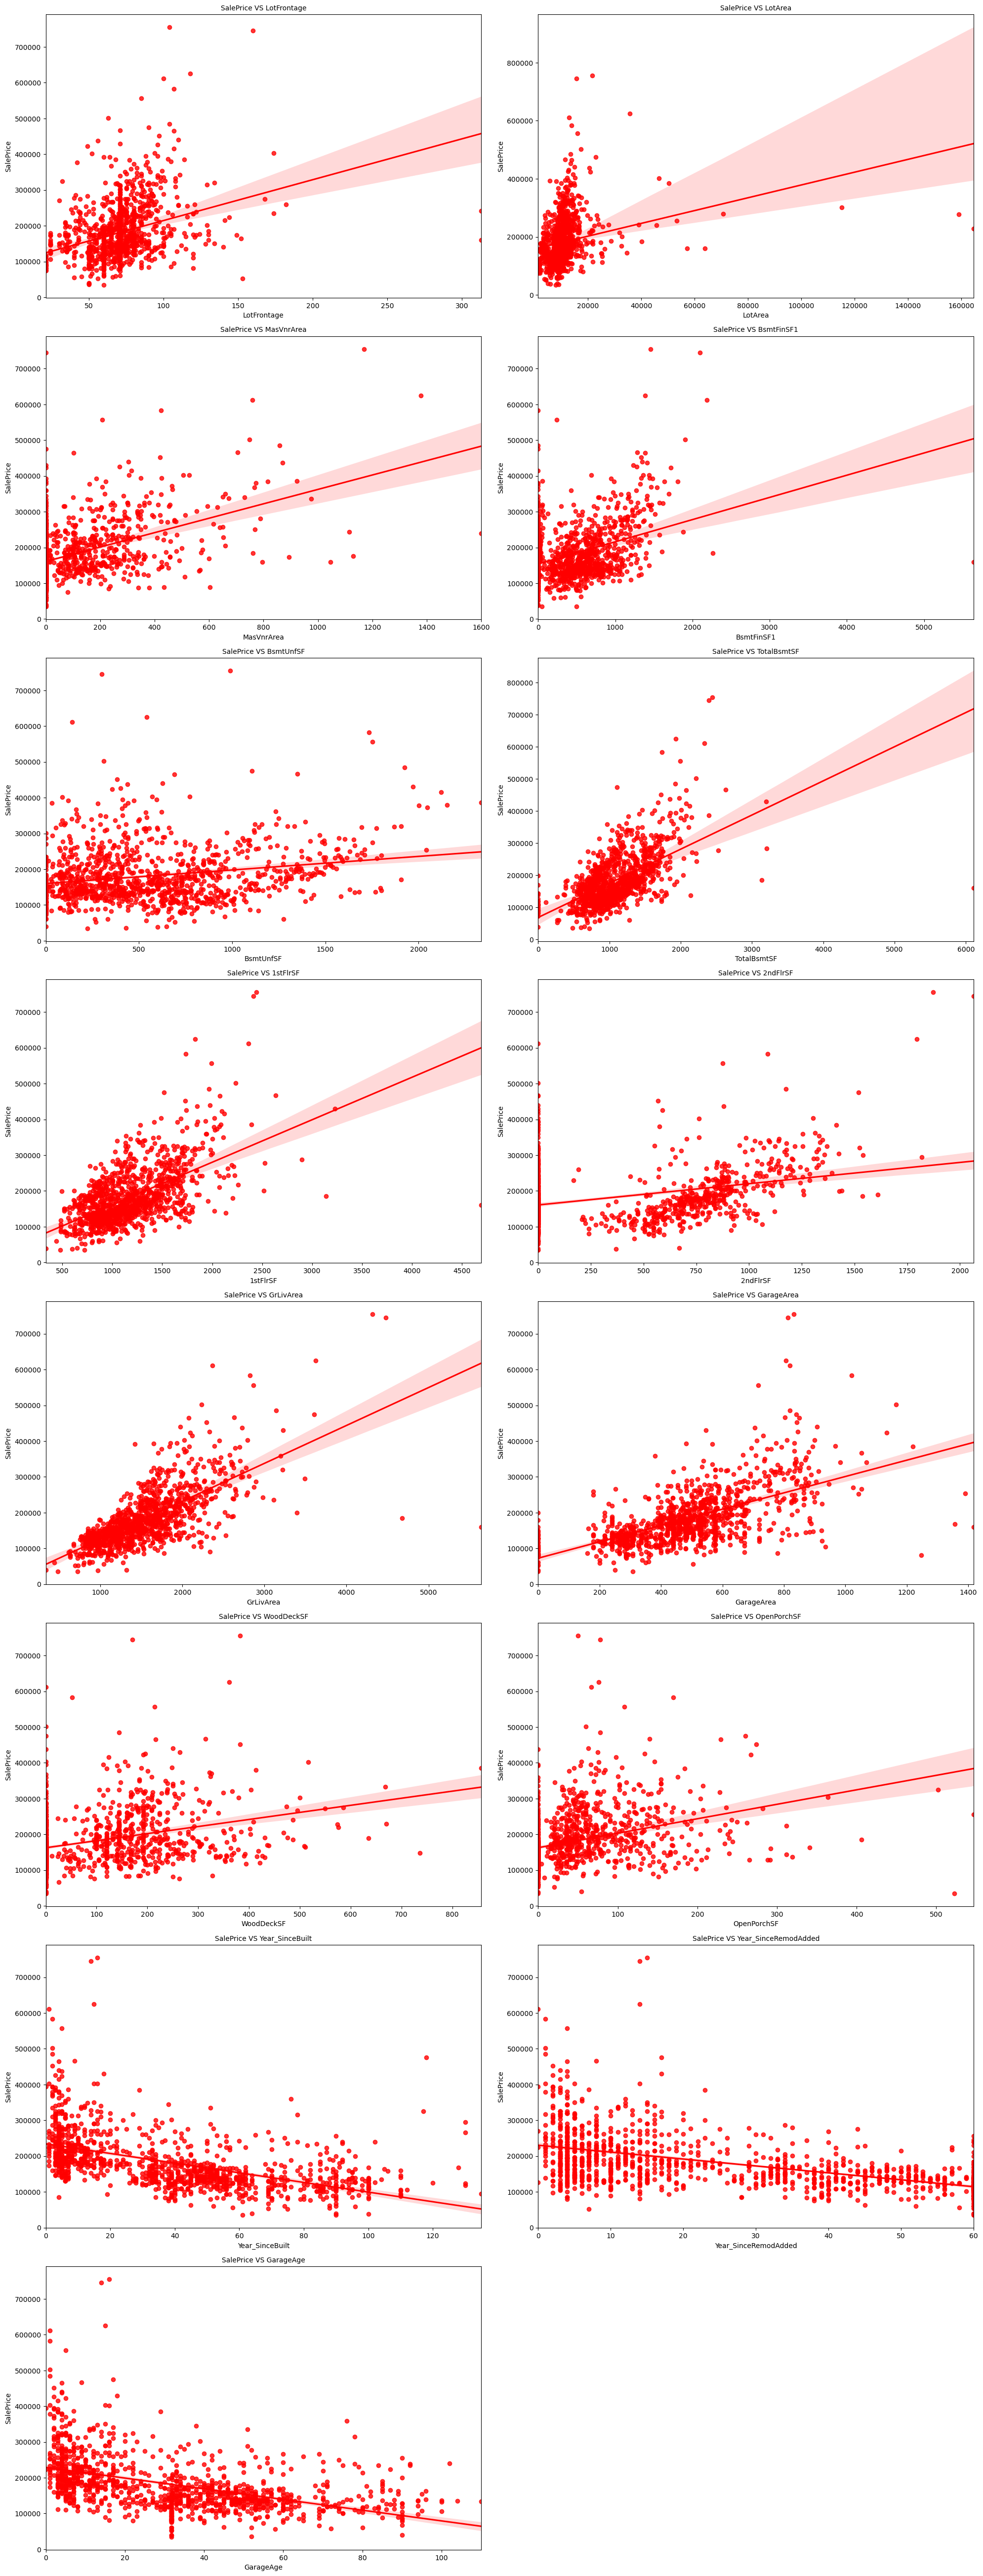

In [52]:
numerical_data1=['LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','GrLivArea','GarageArea','WoodDeckSF','OpenPorchSF','Year_SinceBuilt','Year_SinceRemodAdded','GarageAge']
# regplot for numerical columns
plt.figure(figsize=(20,130))
for i in range(len(numerical_data1)):
    plt.subplot(20,2,i+1)
    sns.regplot(x=train_hp[numerical_data1[i]] , y=train_hp['SalePrice'],color="r")
    plt.title(f"SalePrice VS {numerical_data1[i]}",fontsize=10)
    plt.xticks(fontsize=10)  
    plt.yticks(fontsize=10)
    plt.xlabel(numerical_data1[i],fontsize = 10)
    plt.ylabel('SalePrice',fontsize = 10)
    plt.tight_layout()

OBSERVATIONS :  
**LotFrontage** :As Linear feet of street connected to property is increasing sales are decreasing and the sales price is rangeing between 0-3 lakhs.  
**LotArea** :As Lot size in square feet is increasing sales are decreasing and the sales price is in between 0-4 lakhs.  
**MasVnrArea** :As Masonry veneer area in square feet is increasing sales are decreasing and sales price is rangeing between 0-4 lakhs.  
**BsmtFinSF1** :As Type 1 finished square feet is increasing sales are decreasing and the sales price is in between 0-4 lakhs.  
**BsmtUnfSF** :As Unfinished square feet of basement area is increasing sales are decreasing and the sales price is in between 0-4 lakhs. There are some outliers also.  
**TotalBsmtSF** :As Total square feet of basement area is increasing sales are decreasing and the sales price is in between 0-4 lakhs.  
**1stFlrSF** :As First Floor square feet is increasing sales are decreasing and the sales price is in between 0-4 lakhs.  
**2ndFlrSF** :As Second floor square feet is increasing sales is increasing in the range 500-1000 and the sales price is in between 0-4 lakhs.  
**GrLivArea** :As Above grade ground living area square feet is increasing sales are decreasing and the sales price is in between 0-4 lakhs.  
**GarageArea** :As Size of garage in square feet is increasing sales is increasing and the sales price is in between 0-4 lakhs.  
**WoodDeckSF** :As Wood deck area in square feet is increasing sales are decreasing and the sales price is in between 0-4 lakhs.  
**OpenPorchSF** :As Open porch area in square feet is increasing sales are decreasing and the sales price is in between 0-4 lakhs.  
**Year_SinceBuilt** :As Year_SinceBuilt is increasing sales are decreasing and the sales price is high for newly built building and the sales price is in between 0-4 lakhs.  
**Year_SinceRemodAdded** :As Since Remodel date ,same as construction date if no remodeling or additions, is increasing sales are decreasing and the sales price is in between 1-4 lakhs.  
**GarageAge** :As Since Year garage was built is increasing sales are decreasing and the sales price is in between 0-4 lakhs.  

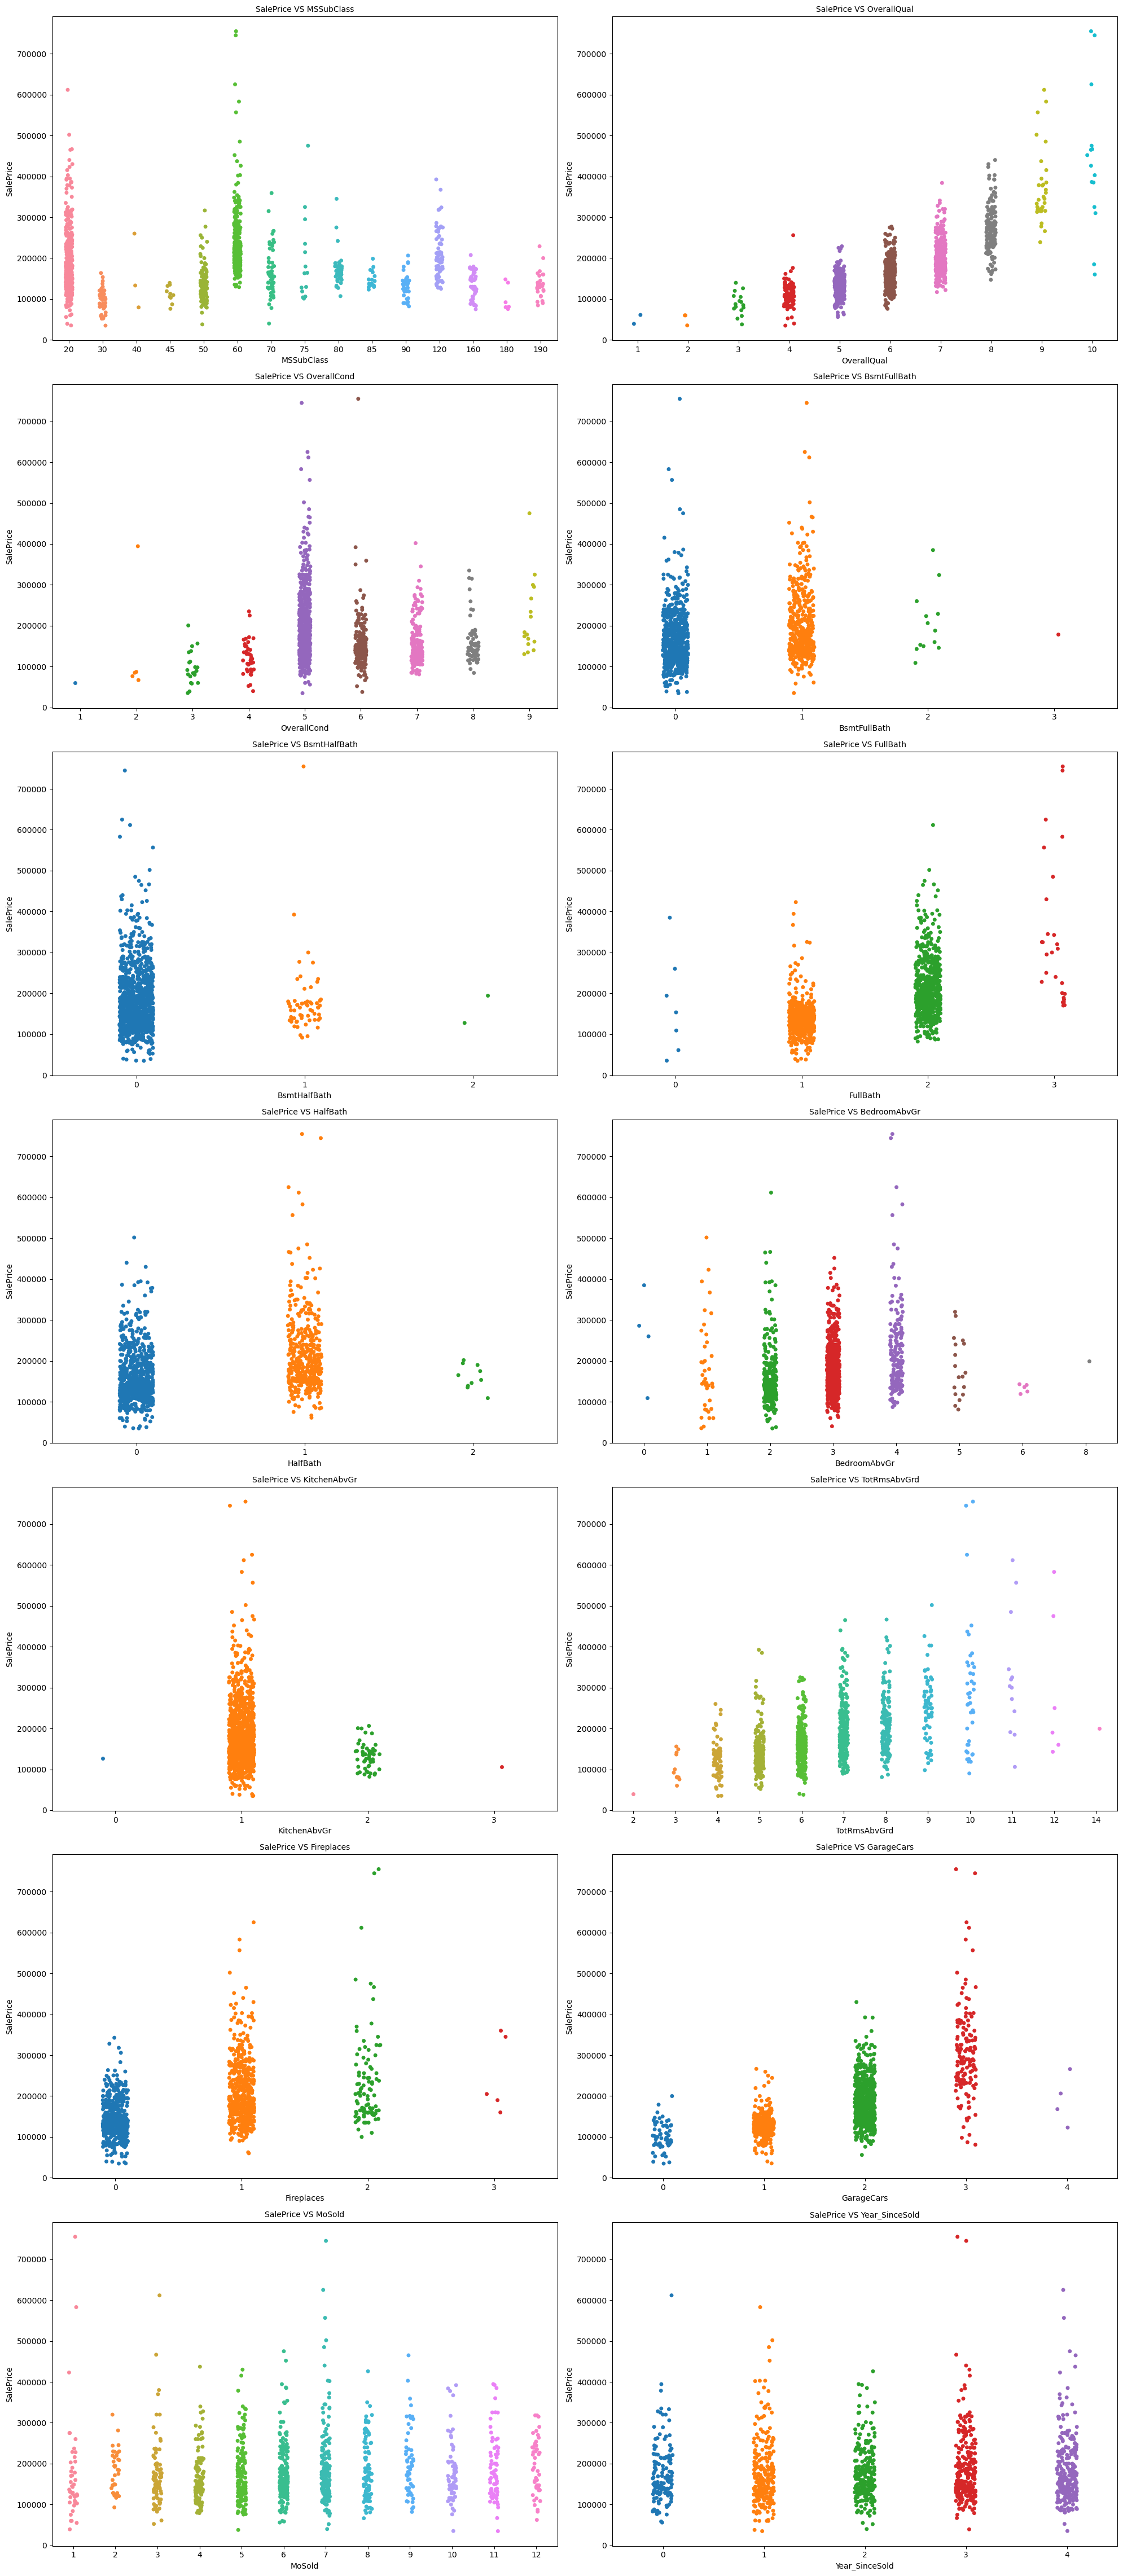

In [53]:
numerical_data2=['MSSubClass','OverallQual','OverallCond','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageCars','MoSold','Year_SinceSold']
# stripplot for numerical columns
plt.figure(figsize=(20,130))
for i in range(len(numerical_data2)):
    plt.subplot(20,2,i+1)
    sns.stripplot(x=train_hp[numerical_data2[i]] , y=train_hp['SalePrice'])
    plt.title(f"SalePrice VS {numerical_data2[i]}",fontsize=10)
    plt.xticks(fontsize=10)  
    plt.yticks(fontsize=10)
    plt.xlabel(numerical_data2[i],fontsize = 10)
    plt.ylabel('SalePrice',fontsize = 10)
    plt.tight_layout()

OBSERVATIONS :  
**MSSuubClass** :For 1-STORY 1946 & NEWER ALL STYLES(20) and 2-STORY 1946 & NEWER(60) types of dwelling the sales is good and SalePrice is also high.  
**OverallQual** :As Rates the overall material and finish of the house is increasing linearly sales is also increasing And SalePrice is also increasing linearly.  
**OverallCond** :For 5, Average overall condition of the house the sales is high and SalePrice is also high.  
**BsmtFullBath** :For 0 and 1 Basement full bathrooms the sales as well as SalePrice is high.  
**BsmtHalfBath** :For 0 Basement half bathrooms the sales as well as SalePrice is high.  
**FullBath** :For 1 and 2 Full bathrooms above grade the sales as well as SalePrice is high.  
**HalfBath** :For 0 and 1 Half baths above grade the sales as well as SalePrice is high.  
**BedroomAbvGr** :For 2, 3 and 4 Bedrooms above grade ,does NOT include basement bedrooms, the sales as well as SalePrice is high.  
**KitchenAbvGr** :For 1 Kitchens above grade the sales as well as SalePrice is high.  
**TotRmsAbvGrd** :For 4-9 Total rooms above grade, does not include bathrooms, the sales as well as SalePrice is high.  
**Fireplaces** :For 0 and 1 Number of fireplaces the sales as well as SalePrice is high.  
**GarageCars** :For 1 and 2 Size of garage in car capacity the sales is high and for 3 Size of garage in car capacity the SalePrice is high.  
**MoSold** :In between april to august for Month Sold the sales is good with SalePrice.  
**Year_SinceSold** :For all the Year_SinceSold the salePrice and sales both are same.  

# Checking for Outliers

Now we shall check both the datasets for outliers and consecutively remove the outliers.

### Train Dataset

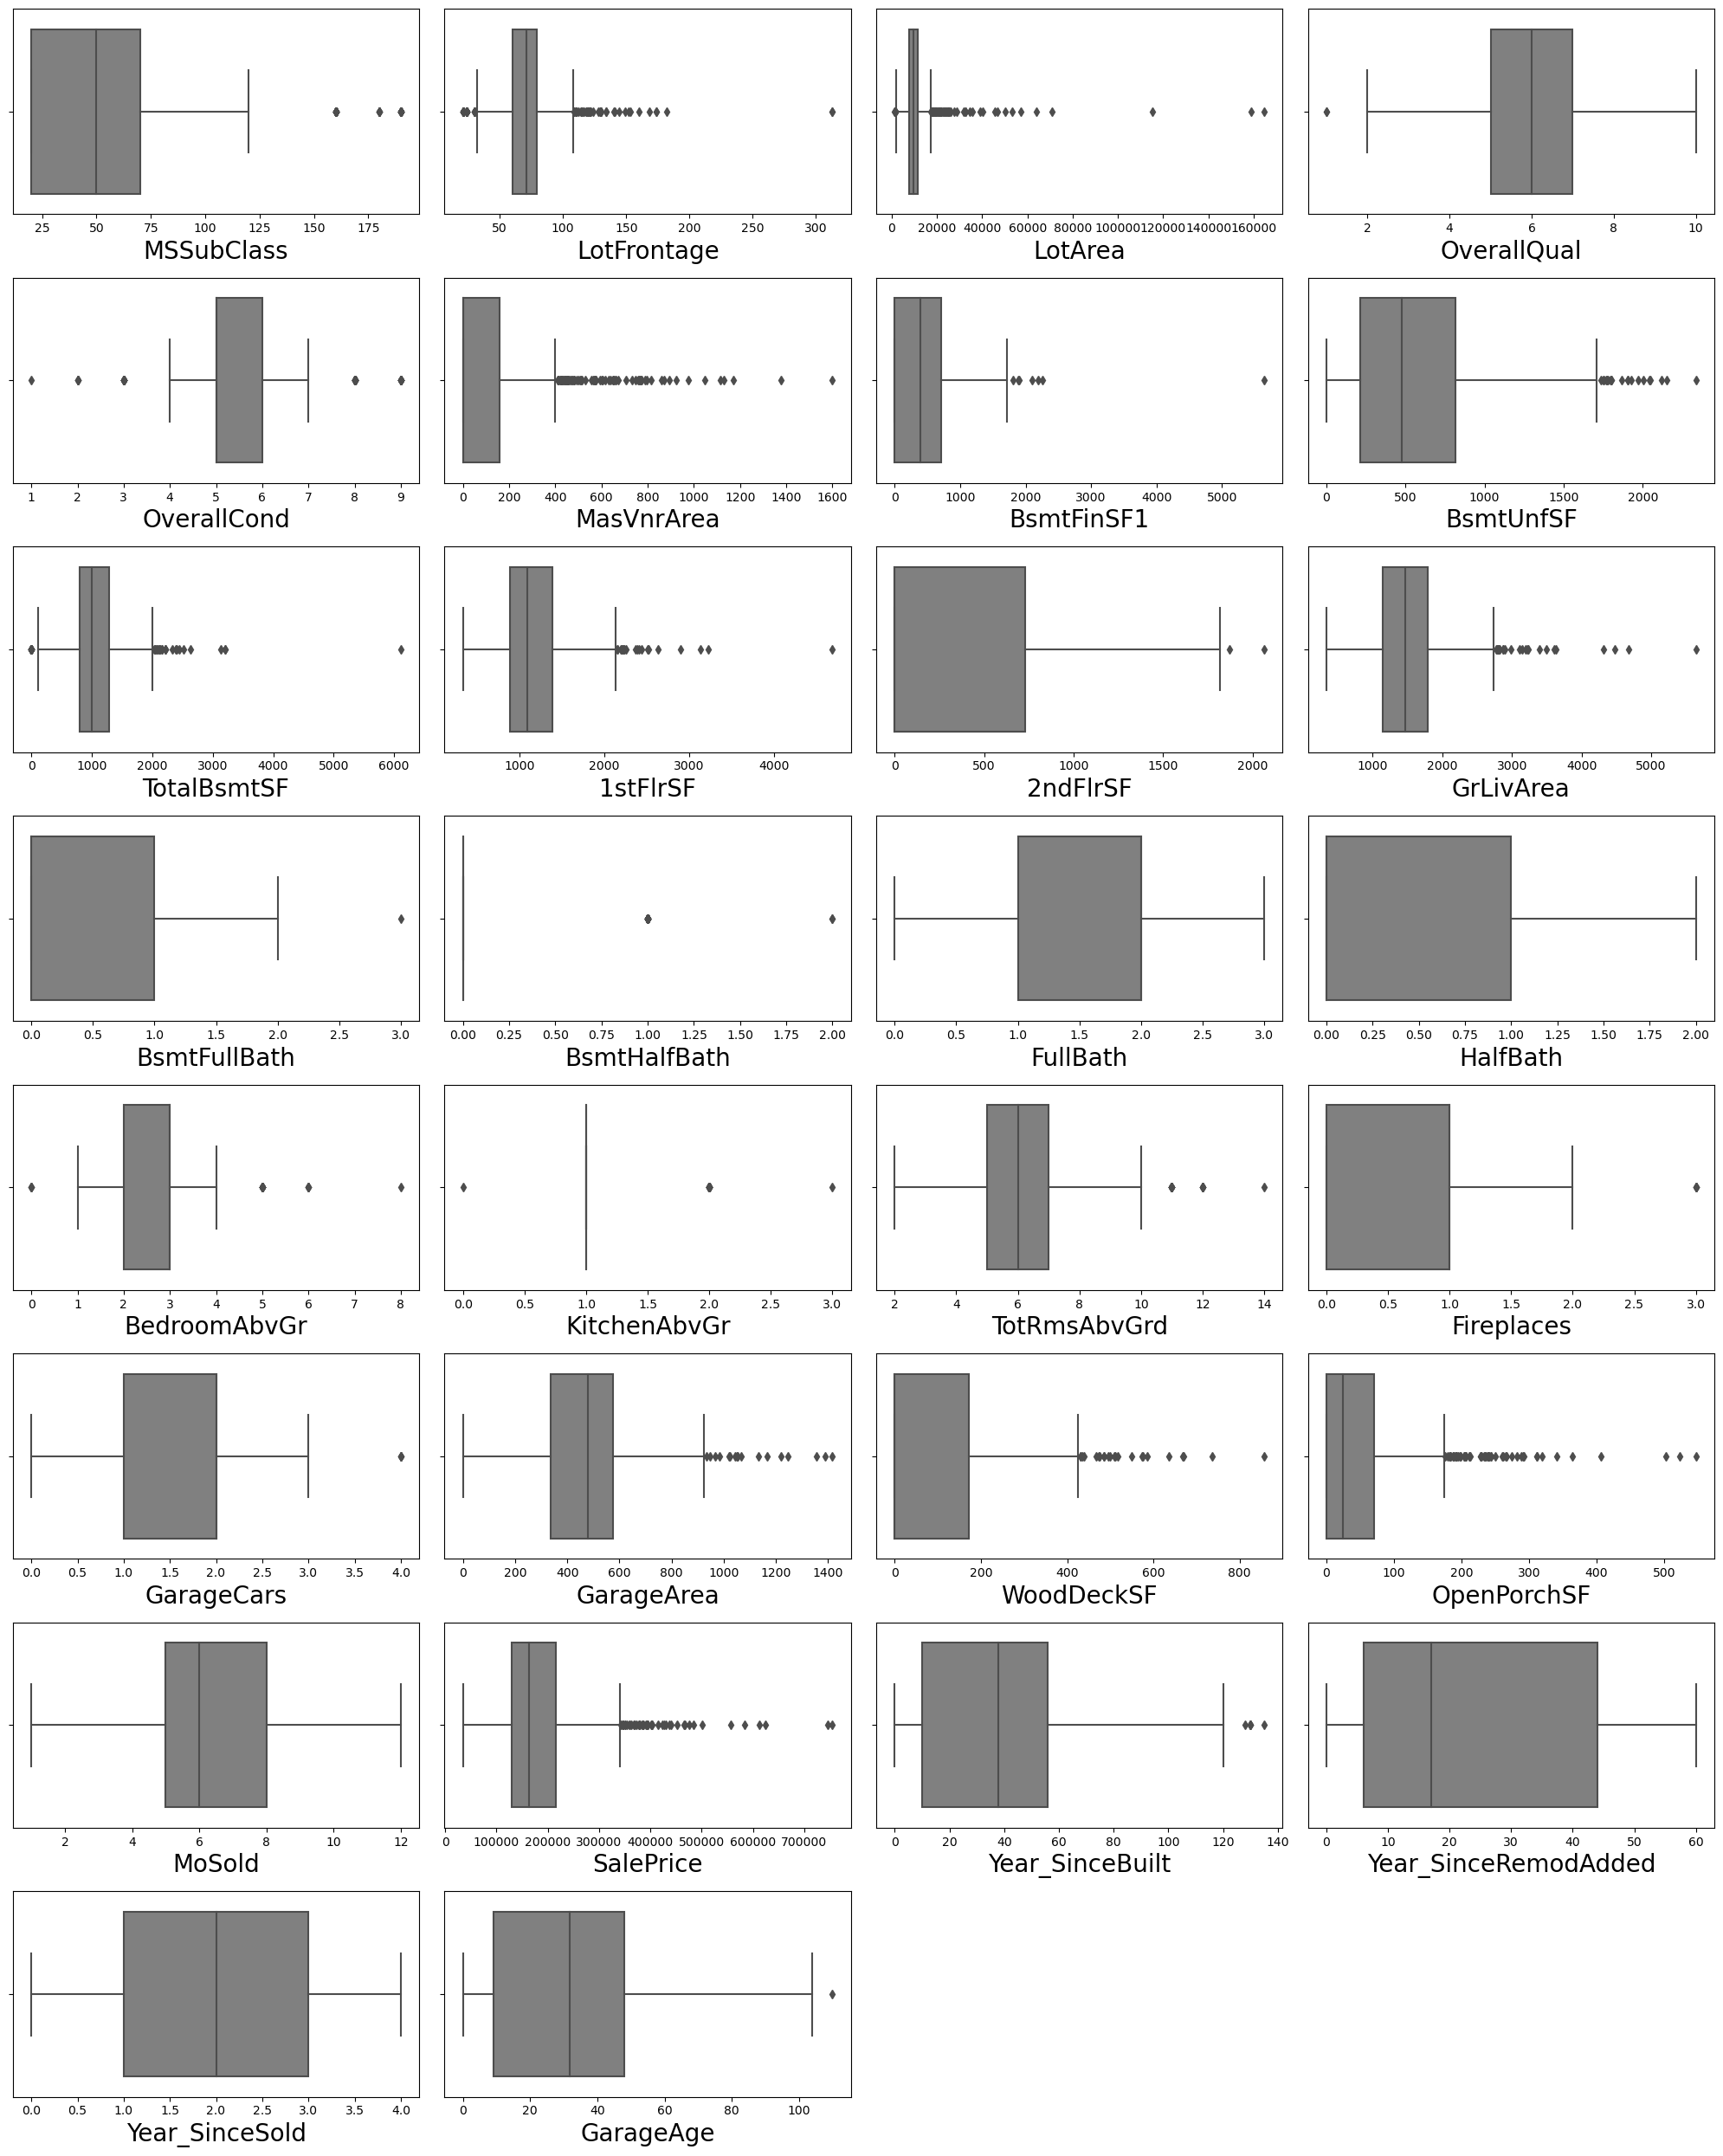

In [54]:
# Identifying the outliers using boxplot in train dataset

plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in numerical_col:
    if plotnumber<=30:
        ax=plt.subplot(8,4,plotnumber)
        sns.boxplot(train_hp[column],color='grey')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

All the columns contains outliers except FullBath, HalfBath, MoSold, Year_SinceRemodAdded and Year_SinceSold. The columns OverallQual and OverallCond seem to be categorical, & the column SalePrice is the label so we are not removing outliers in these columns.
 Let's remove the outliers in the remaining columns using both Zscore and IQR method and compare the dataloss.

In [55]:
# Features having outliers in train dataset
outliers_tr = train_hp[['MSSubClass','LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','GrLivArea','BsmtFullBath','BsmtHalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageCars','GarageArea','WoodDeckSF','OpenPorchSF','Year_SinceBuilt','GarageAge']]

### Z-Score Method

In [56]:
from scipy.stats import zscore

z=np.abs(zscore(outliers_tr))
train_HP=train_hp[(z<3).all(axis=1)]
train_HP.head()

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0         120       RL     70.98847     4928   Pave      IR1         Lvl   
1          20       RL     95.00000    15865   Pave      IR1         Lvl   
2          60       RL     92.00000     9920   Pave      IR1         Lvl   
3          20       RL    105.00000    11751   Pave      IR1         Lvl   
5          60       RL     58.00000    14054   Pave      IR1         Lvl   

  LotConfig LandSlope Neighborhood  ... WoodDeckSF OpenPorchSF MoSold  \
0    Inside       Gtl      NPkVill  ...          0         205      2   
1    Inside       Mod        NAmes  ...         81         207     10   
2   CulDSac       Gtl      NoRidge  ...        180         130      6   
3    Inside       Gtl       NWAmes  ...          0         122      1   
5    Inside       Gtl      Gilbert  ...        100          17     11   

  SaleType  SaleCondition  SalePrice Year_SinceBuilt Year_SinceRemodAdded  \
0       WD         Normal     128000              34                   34   
1       WD         Normal     268000              40                   40   
2       WD         Normal     269790              14                   13   
3      COD         Normal     190000              33                   33   
5      New        Partial     219210               4                    4   

  Year_SinceSold GarageAge  
0              3      33.0  
1              3      40.0  
2              3      13.0  
3              0      33.0  
5              4       4.0  

[5 rows x 68 columns]

In [57]:
train_HP.shape

(945, 68)

In [58]:
train_hp.shape

(1168, 68)

In [59]:
#Checking dataloss in zscore method of train dataset
Dataloss = (((1168-945)/1168)*100)
Dataloss

19.09246575342466

In Z-score method for trian dataset the data loss is more than 10 % (19.09 %) so let me have a look into IQR method to remove outliers.

### IQR Method

In [60]:
# 1st quantile
Q1=outliers_tr.quantile(0.25)

# 3rd quantile
Q3=outliers_tr.quantile(0.75)

# IQR
IQR = Q3 - Q1

Train_HP=train_hp[~((train_hp < (Q1 - 1.5 * IQR)) |(train_hp > (Q3 + 1.5 * IQR))).any(axis=1)]

In [61]:
# Checking shape of new train dataset
Train_HP.shape

(756, 68)

In [62]:
# Checking dataloss in IQR method of train dataset
Dataloss = (((1168-756)/1168)*100)
Dataloss

35.273972602739725

In IQR method of train dataset the data loss is more than 10 % (35.27 %) so let me have a look into percentile method to remove outliers.

### Percentile Method

In [63]:
# Removing outliers using percentile method in train dataset
for i in outliers_tr:
    if train_hp[i].dtypes != 'object':
        percentile = train_hp[i].quantile([0.01,0.98]).values
        train_hp[i][train_hp[i]<=percentile[0]]=percentile[0]
        train_hp[i][train_hp[i]>=percentile[1]]=percentile[1]

We have successfully removed outliers in train dataset using percentile method.

### Test Dataset

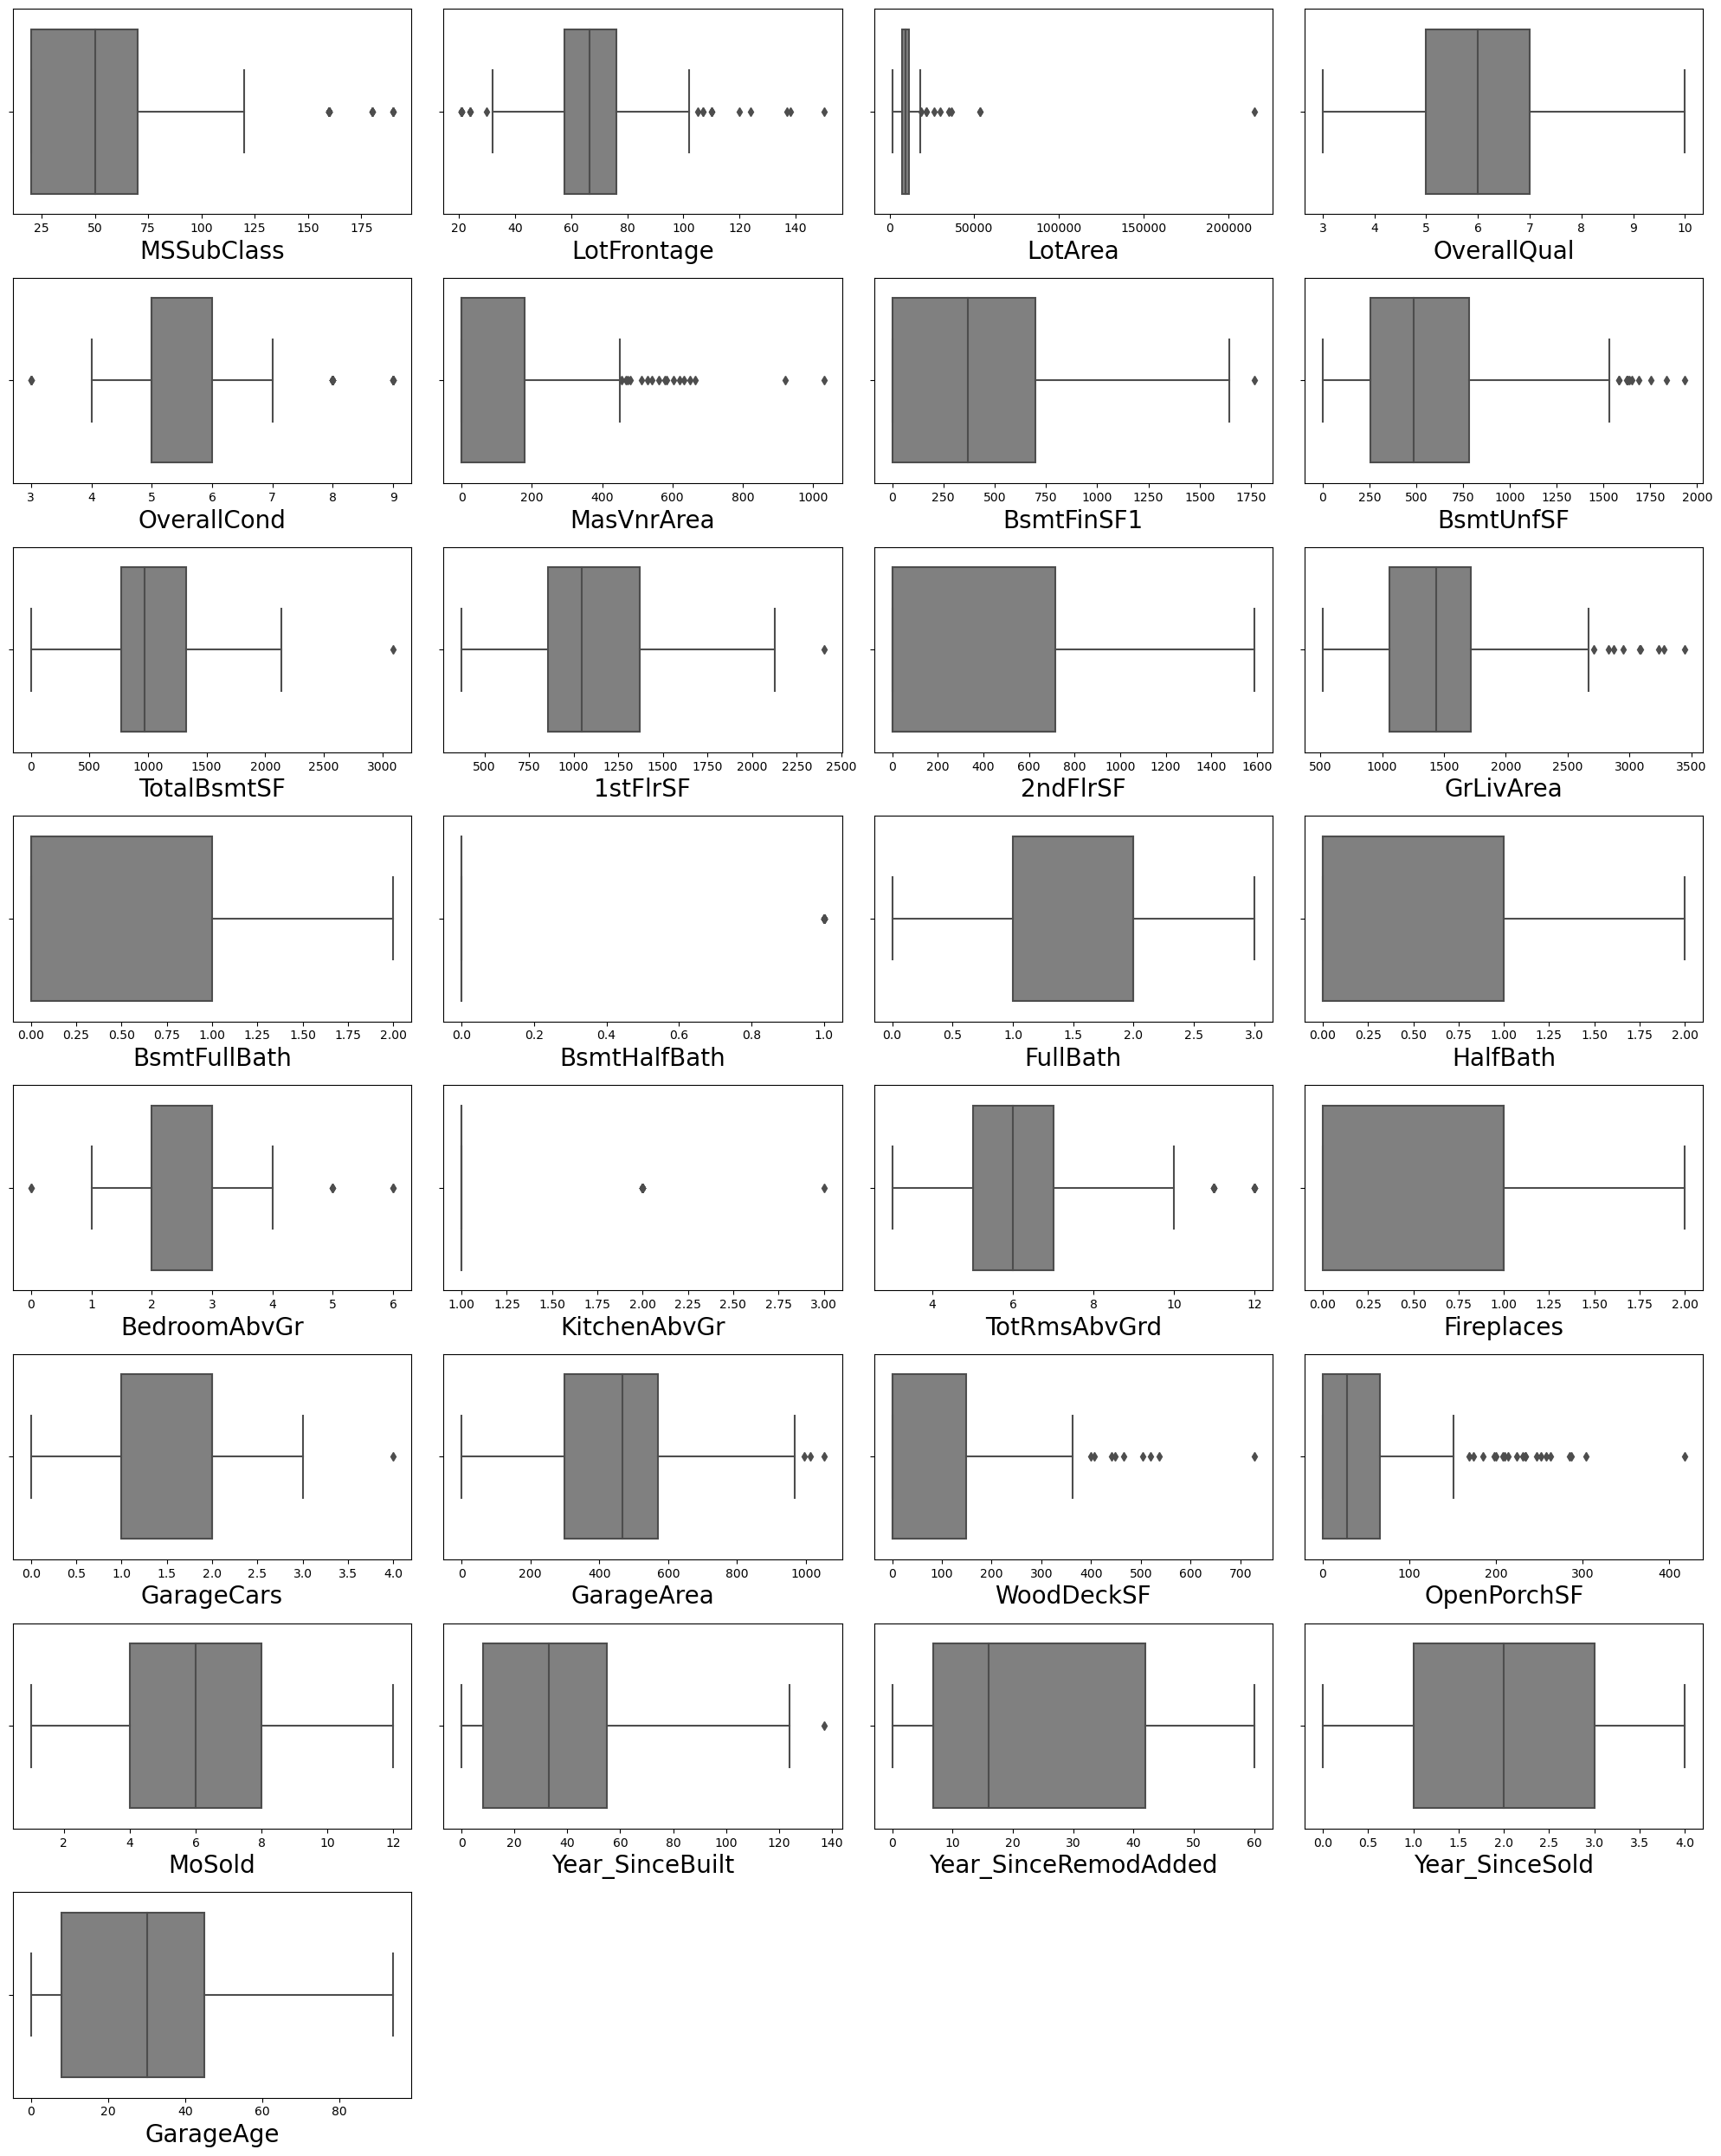

In [64]:
# Identifying the outliers using boxplot in test dataset

plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for columns in numerical_cols:
    if plotnumber<=30:
        ax=plt.subplot(8,4,plotnumber)
        sns.boxplot(test_hp[columns],color='grey')
        plt.xlabel(columns,fontsize=20)
    plotnumber+=1
plt.tight_layout()

Outliers present in all the columns except OverallQual, 2ndFlrSF, BsmtFullBath, FullBath, HalfBath, FirePlaces, MoSold, Year_SinceRemodAdded, Year_SinceSold and GarageAge. The column OverallCond seems to be categorical so, we are not removing outliers in this column.
 Let's remove the outliers in the remaining columns using both Zscore and IQR method and compare the dataloss.

In [65]:
# Features having outliers in test dataset
outliers_ts=test_hp[['LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtUnfSF','TotalBsmtSF','1stFlrSF','GrLivArea','BsmtHalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','GarageCars','GarageArea','WoodDeckSF','OpenPorchSF','Year_SinceBuilt']]

### Z-Score Method

In [66]:
from scipy.stats import zscore

z=np.abs(zscore(outliers_ts))
test_HP=test_hp[(z<3).all(axis=1)]
test_HP.head()

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0          20       RL    86.000000    14157   Pave      IR1         HLS   
1         120       RL    66.425101     5814   Pave      IR1         Lvl   
2          20       RL    66.425101    11838   Pave      Reg         Lvl   
3          70       RL    75.000000    12000   Pave      Reg         Bnk   
4          60       RL    86.000000    14598   Pave      IR1         Lvl   

  LotConfig LandSlope Neighborhood  ... PavedDrive WoodDeckSF OpenPorchSF  \
0    Corner       Gtl      StoneBr  ...          Y        178          51   
1   CulDSac       Gtl      StoneBr  ...          Y         63           0   
2    Inside       Gtl      CollgCr  ...          Y        202         151   
3    Inside       Gtl      Crawfor  ...          Y          0           0   
4   CulDSac       Gtl      Somerst  ...          Y        100          18   

  MoSold  SaleType  SaleCondition Year_SinceBuilt Year_SinceRemodAdded  \
0      7        WD         Normal               4                    4   
1      8       COD        Abnorml              25                   26   
2      6        WD         Normal               8                    9   
3      7        WD         Normal              68                   60   
4      1        WD         Normal               2                    3   

  Year_SinceSold GarageAge  
0              3       5.0  
1              1      26.0  
2              1       9.0  
3              1      69.0  
4              2       3.0  

[5 rows x 67 columns]

In [67]:
test_HP.shape

(235, 67)

In [68]:
test_hp.shape

(292, 67)

In [69]:
# Checking dataloss in zscore method of test dataset
Dataloss1 = (((292-235)/292)*100)
Dataloss1

19.52054794520548

In Z-score method for test dataset the data loss is more than 10 % (19.52 %) so let me have a look into IQR method to remove outliers.

### IQR method

In [70]:
# 1st quantile
Q1=outliers_ts.quantile(0.25)

# 3rd quantile
Q3=outliers_ts.quantile(0.75)

# IQR
IQR=Q3 - Q1

Test_HP=test_hp[~((test_hp < (Q1 - 1.5 * IQR)) |(test_hp > (Q3 + 1.5 * IQR))).any(axis=1)]

In [71]:
Test_HP.shape

(185, 67)

In [72]:
# Checking dataloss in IQR method of test dataset
Dataloss1 = (((292-185)/292)*100)
Dataloss1

36.64383561643836

In IQR method of test dataset the data loss is more than 10 % (36.64 %) so let me have a look into percentile method to remove outliers.

### Percentile Method

In [73]:
# Removing outliers using percentile method in test dataset
for col1 in outliers_ts:
    if test_hp[col1].dtypes != 'object':
        percentile = test_hp[col1].quantile([0.01,0.98]).values
        test_hp[col][test_hp[col]<=percentile[0]]=percentile[0]
        test_hp[col][test_hp[col]>=percentile[1]]=percentile[1]

We have successfully removed outliers in test dataset using percentile method.

# Skewness

In [74]:
# Checking for skewness of train dataset
train_hp.skew()

MSSubClass              1.422019
LotFrontage             0.188060
LotArea                 1.191912
OverallQual             0.175082
OverallCond             0.580714
MasVnrArea              1.873138
BsmtFinSF1              0.639523
BsmtUnfSF               0.777624
TotalBsmtSF             0.166773
1stFlrSF                0.645842
2ndFlrSF                0.717390
GrLivArea               0.592755
BsmtFullBath            0.355224
BsmtHalfBath            3.954345
FullBath                0.057809
HalfBath                0.656492
BedroomAbvGr           -0.145762
KitchenAbvGr            4.374289
TotRmsAbvGrd            0.443931
Fireplaces              0.552677
GarageCars             -0.434745
GarageArea             -0.135675
WoodDeckSF              1.053617
OpenPorchSF             1.513678
MoSold                  0.220979
SalePrice               1.953878
Year_SinceBuilt         0.468682
Year_SinceRemodAdded    0.495864
Year_SinceSold         -0.115765
GarageAge               0.608757
dtype: flo

The columns with skewness in train dataset: MSSubClass, LotArea, OverallCond, MasVnrArea, BsmtFinSF1, BsmtUnfSF, 1stFlrSF, 2ndFlrSF, GrLivArea, BsmtHalfBath, HalfBath, KitchenAbvGr, Fireplaces, WoodDeckSF, OpenPorchSF, SalePrice, GarageAge. 
 But as SalePrice is my target i should not remove skewness in this column.And MSSubClass and OverallCond are seems to be categorical so let me not remove outliers in this columns.

In [75]:
# Checking for skewness of test dataset
test_hp.skew()

MSSubClass               1.358597
LotFrontage              0.466813
LotArea                 12.781805
OverallQual              0.397312
OverallCond              1.209714
MasVnrArea               1.976804
BsmtFinSF1               0.739790
BsmtUnfSF                0.960708
TotalBsmtSF              0.519257
1stFlrSF                 0.692047
2ndFlrSF                 0.765511
GrLivArea                1.010586
BsmtFullBath             0.463685
BsmtHalfBath             3.544994
FullBath                -0.049800
HalfBath                 0.758892
BedroomAbvGr             0.075315
KitchenAbvGr             4.849432
TotRmsAbvGrd             0.805535
Fireplaces               0.540164
GarageCars              -0.280324
GarageArea               0.133547
WoodDeckSF               1.708221
OpenPorchSF              2.185030
MoSold                   0.186504
Year_SinceBuilt          0.755233
Year_SinceRemodAdded     0.535600
Year_SinceSold          -0.018412
GarageAge                0.000000
dtype: float64

The columns with skewness in test dataset: MSSubClass, LotArea, OverallCond, MasVnrArea, BsmtFinSF1, BsmtUnfSF, 1stFlrSF, 2ndFlrSF, GrLivArea, BsmtHalfBath, HalfBath, KitchenAbvGr, TotRmsAbvGrd, Fireplaces, WoodDeckSF, OpenPorchSF, Year_SinceBuilt, Year_SinceRemodAdded. MSSubClass and OverallCond are seems to be categorical so let me not remove outliers in this columns.

In GarageAge skewness is zero which means all the entries in this column are same so let me drop it in test dataset. Since i'm dropping in test i should drop in train also.

In [76]:
# Dropping unnecessary column in train dataset
train_hp = train_hp.drop(["GarageAge"],axis=1)

In [77]:
# Dropping unnecessary column in test dataset
test_hp = test_hp.drop(["GarageAge"],axis=1)

# Removing skewness using yeo-johnson method

### Train Dataset

In [78]:
# List of skewed features in train dataset
skew_tr=['LotArea','MasVnrArea','BsmtFinSF1','BsmtUnfSF','1stFlrSF','2ndFlrSF','GrLivArea','BsmtHalfBath','HalfBath','KitchenAbvGr','Fireplaces','WoodDeckSF','OpenPorchSF']

In [79]:
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')
'''
parameters:
method = 'box_cox' or 'yeo-johnson'
'''

"\nparameters:\nmethod = 'box_cox' or 'yeo-johnson'\n"

In [80]:
train_hp[skew_tr] = scaler.fit_transform(train_hp[skew_tr].values)

In [81]:
# Checking skewness again in train dataset
train_hp[skew_tr].skew()

LotArea         0.077861
MasVnrArea      0.415092
BsmtFinSF1     -0.418554
BsmtUnfSF      -0.304290
1stFlrSF       -0.000731
2ndFlrSF        0.279883
GrLivArea      -0.005974
BsmtHalfBath    3.954345
HalfBath        0.498003
KitchenAbvGr    0.000000
Fireplaces      0.076595
WoodDeckSF      0.110387
OpenPorchSF    -0.010092
dtype: float64

The skewness of train dataset is reduced.

After removing skewness we are getting skewness of KitchenAbvGr as 0 which means this column has a unique single entry. So let us drop this column.

In [82]:
# Dropping unnecessary column
train_hp = train_hp.drop(["KitchenAbvGr"],axis=1)

### Test Dataset

In [83]:
# List of skewed features in test dataset
skew_ts=['LotArea','MasVnrArea','BsmtFinSF1','BsmtUnfSF','1stFlrSF','2ndFlrSF','GrLivArea','BsmtHalfBath','HalfBath','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','WoodDeckSF','OpenPorchSF','Year_SinceBuilt','Year_SinceRemodAdded']

In [84]:
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')
'''
parameters:
method = 'box_cox' or 'yeo-johnson'
'''

"\nparameters:\nmethod = 'box_cox' or 'yeo-johnson'\n"

In [85]:
test_hp[skew_ts] = scaler.fit_transform(test_hp[skew_ts].values)

In [86]:
# Checking skewness again in test dataset
test_hp[skew_ts].skew()

LotArea                 0.003111
MasVnrArea              0.363253
BsmtFinSF1             -0.441605
BsmtUnfSF              -0.232099
1stFlrSF               -0.000548
2ndFlrSF                0.284246
GrLivArea              -0.000307
BsmtHalfBath            3.544994
HalfBath                0.621093
KitchenAbvGr            0.000000
TotRmsAbvGrd           -0.000469
Fireplaces              0.076669
WoodDeckSF              0.210102
OpenPorchSF            -0.058951
Year_SinceBuilt        -0.147007
Year_SinceRemodAdded   -0.081089
dtype: float64

The skewness of test dataset is reduced.

After removing skewness we are getting skewness of KitchenAbvGr as 0. Let me drop this column in test dataset too.

In [87]:
# Dropping unnecessary column
test_hp = test_hp.drop(["KitchenAbvGr"],axis=1)

# Encoding the Data Frames

### Train Dataset

In [88]:
# Replacing ratings with suitable numbers in required columns in train dataset
column_tr = ['ExterQual','ExterCond','BsmtQual','BsmtCond','HeatingQC','KitchenQual','FireplaceQu','GarageQual','GarageCond']
for i in column_tr:
    train_hp[i] = train_hp[i].replace({'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'None':0})

In [89]:
# Ordinal encoding for train dataset
from sklearn.preprocessing import OrdinalEncoder
OE = OrdinalEncoder()
for i in train_hp.columns:
    if train_hp[i].dtypes=='object':
        train_hp[i]=OE.fit_transform(train_hp[i].values.reshape(-1,1))

### Test Dataset

In [90]:
# Replacing ratings with suitable numbers in required columns in test dataset
column_ts = ['ExterQual','ExterCond','BsmtQual','BsmtCond','HeatingQC','KitchenQual','FireplaceQu','GarageQual','GarageCond']
for i in column_ts:
    test_hp[i] = test_hp[i].replace({'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'None':0})

In [91]:
# Ordinal encoding for test dataset
from sklearn.preprocessing import OrdinalEncoder
OE = OrdinalEncoder()
for i in test_hp.columns:
    if test_hp[i].dtypes=='object':
        test_hp[i]=OE.fit_transform(test_hp[i].values.reshape(-1,1))

We have encoded all the categorical columns in train and test datasets using Ordinal encoder.

# Correlation

In [92]:
# Correlation of train dataset
train_hp.corr()

MSSubClass  MSZoning  LotFrontage   LotArea    Street  \
MSSubClass              1.000000  0.007478    -0.391424 -0.400825 -0.035981   
MSZoning                0.007478  1.000000    -0.084834 -0.058912  0.140215   
LotFrontage            -0.391424 -0.084834     1.000000  0.596143 -0.044573   
LotArea                -0.400825 -0.058912     0.596143  1.000000 -0.072669   
Street                 -0.035981  0.140215    -0.044573 -0.072669  1.000000   
...                          ...       ...          ...       ...       ...   
SaleCondition          -0.028981  0.004501     0.076587  0.046115  0.014176   
SalePrice              -0.060775 -0.133221     0.358470  0.394343  0.044753   
Year_SinceBuilt        -0.031787  0.296752    -0.130022 -0.028547 -0.021386   
Year_SinceRemodAdded   -0.056618  0.174586    -0.080871 -0.028632 -0.057866   
Year_SinceSold          0.038595  0.004964     0.005074  0.039843  0.019635   

                      LotShape  LandContour  LotConfig  LandSlope  \
MSSubClass            0.104485    -0.021387   0.076880  -0.014930   
MSZoning              0.053655     0.001175  -0.027246  -0.023952   
LotFrontage          -0.157341    -0.016620  -0.201691   0.023253   
LotArea              -0.287003    -0.074834  -0.198998   0.176280   
Street               -0.012941     0.105226   0.000153  -0.141572   
...                        ...          ...        ...        ...   
SaleCondition        -0.054905     0.047715   0.043692  -0.061461   
SalePrice            -0.248171     0.032836  -0.060452   0.015485   
Year_SinceBuilt       0.231550    -0.158435  -0.009537   0.088287   
Year_SinceRemodAdded  0.155428    -0.086936   0.009281   0.048599   
Year_SinceSold       -0.021421    -0.009499   0.009817   0.005352   

                      Neighborhood  ...  PavedDrive  WoodDeckSF  OpenPorchSF  \
MSSubClass                0.013918  ...   -0.068702    0.016371     0.025996   
MSZoning                 -0.251833  ...   -0.077280    0.006946    -0.182359   
LotFrontage               0.091671  ...    0.106891    0.065003     0.168784   
LotArea                   0.075420  ...    0.041033    0.125098     0.146222   
Street                    0.001420  ...    0.041318    0.022918     0.017900   
...                            ...  ...         ...         ...          ...   
SaleCondition             0.042340  ...    0.079012    0.084122     0.135211   
SalePrice                 0.198942  ...    0.231707    0.310128     0.449961   
Year_SinceBuilt          -0.119171  ...   -0.414813   -0.291419    -0.409784   
Year_SinceRemodAdded     -0.091489  ...   -0.180113   -0.276869    -0.395557   
Year_SinceSold           -0.026181  ...   -0.004648   -0.019694     0.077225   

                        MoSold  SaleType  SaleCondition  SalePrice  \
MSSubClass           -0.016015  0.035050      -0.028981  -0.060775   
MSZoning             -0.051646  0.079854       0.004501  -0.133221   
LotFrontage           0.027718 -0.040647       0.076587   0.358470   
LotArea               0.021311 -0.022130       0.046115   0.394343   
Street               -0.008860  0.025920       0.014176   0.044753   
...                        ...       ...            ...        ...   
SaleCondition        -0.003462  0.143557       1.000000   0.217687   
SalePrice             0.072764 -0.050851       0.217687   1.000000   
Year_SinceBuilt      -0.033059  0.061784      -0.214675  -0.526584   
Year_SinceRemodAdded -0.024663 -0.020832      -0.227400  -0.507831   
Year_SinceSold        0.144536 -0.013606      -0.024505   0.045508   

                      Year_SinceBuilt  Year_SinceRemodAdded  Year_SinceSold  
MSSubClass                  -0.031787             -0.056618        0.038595  
MSZoning                     0.296752              0.174586        0.004964  
LotFrontage                 -0.130022             -0.080871        0.005074  
LotArea                     -0.028547             -0.028632        0.039843  
Street                      -0.021386             -0

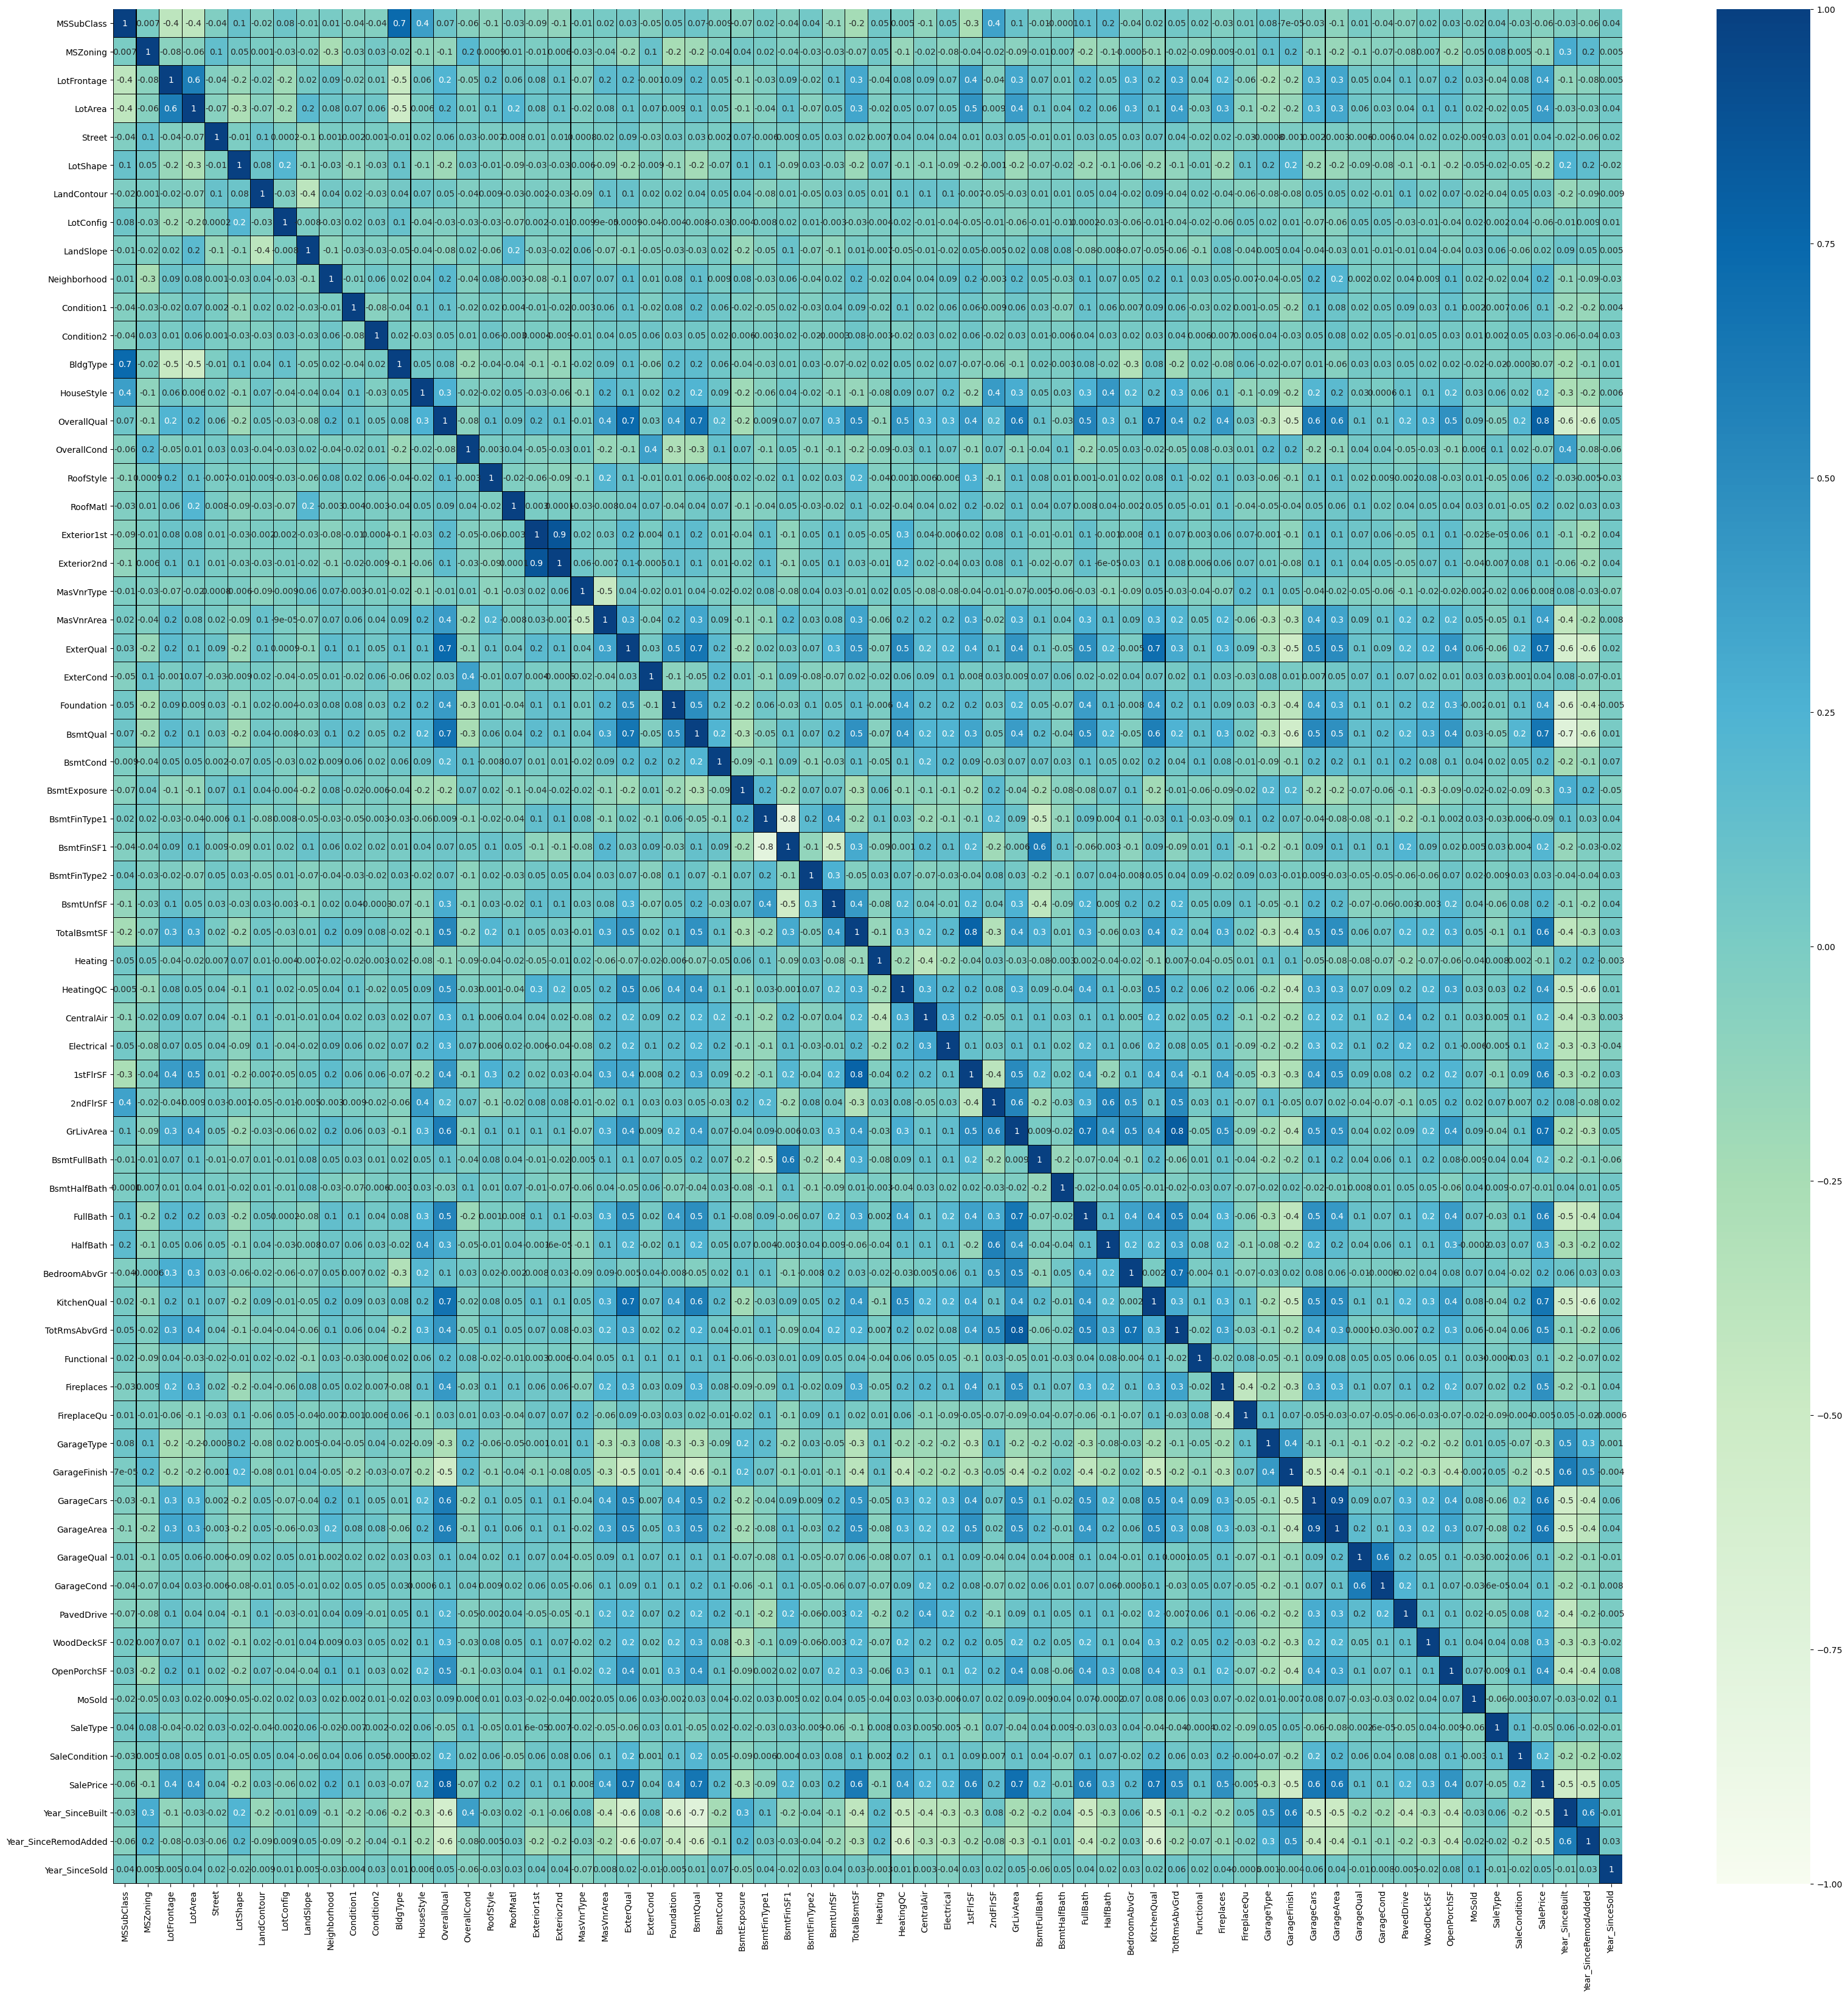

In [93]:
# Visualizing the correlation matrix by plotting heatmap for train dataset.
plt.figure(figsize=(40,40))
sns.heatmap(train_hp.corr(),linewidths=.1,vmin=-1, vmax=1, fmt='.1g', annot = True, linecolor="black",annot_kws={'size':10},cmap="GnBu")
plt.yticks(rotation=0);

We can clearly observe a multicolinearity issue in some of the features of train dataset so we have to check VIF and Let us plot a bar graph to get better insight on targets correlation with other features.

In [94]:
# Correlation of test dataset
test_hp.corr()

MSSubClass  MSZoning  LotFrontage   LotArea    Street  \
MSSubClass              1.000000  0.266517    -0.454786 -0.559657  0.004588   
MSZoning                0.266517  1.000000    -0.335754 -0.335805 -0.063162   
LotFrontage            -0.454786 -0.335754     1.000000  0.623700 -0.056531   
LotArea                -0.559657 -0.335805     0.623700  1.000000 -0.099348   
Street                  0.004588 -0.063162    -0.056531 -0.099348  1.000000   
...                          ...       ...          ...       ...       ...   
SaleType               -0.105307  0.123993     0.034876  0.076505 -0.019125   
SaleCondition          -0.010155  0.005290     0.037168  0.058346 -0.012345   
Year_SinceBuilt        -0.024612  0.365869    -0.152912 -0.079597 -0.046874   
Year_SinceRemodAdded    0.060546  0.188508    -0.085350 -0.059335 -0.090380   
Year_SinceSold         -0.044441  0.072716    -0.059745 -0.017708  0.040272   

                      LotShape  LandContour  LotConfig  LandSlope  \
MSSubClass            0.176681     0.068736   0.071784  -0.073979   
MSZoning              0.167716    -0.099137   0.055261  -0.035312   
LotFrontage          -0.147720    -0.086163  -0.124470   0.176406   
LotArea              -0.294907    -0.139905  -0.150922   0.429145   
Street               -0.002444     0.153613   0.058229  -0.324146   
...                        ...          ...        ...        ...   
SaleType              0.072375     0.056451   0.104593   0.052109   
SaleCondition         0.033945    -0.027454   0.092637   0.033637   
Year_SinceBuilt       0.172947    -0.158742  -0.033157   0.050972   
Year_SinceRemodAdded  0.109506    -0.089633  -0.026791   0.122739   
Year_SinceSold       -0.097144    -0.064777  -0.008814  -0.013349   

                      Neighborhood  ...  GarageCond  PavedDrive  WoodDeckSF  \
MSSubClass               -0.081962  ...    0.025030   -0.024900    0.040682   
MSZoning                 -0.204984  ...   -0.067022   -0.236680   -0.100888   
LotFrontage               0.184817  ...    0.033971    0.076602    0.020964   
LotArea                   0.184733  ...   -0.036731   -0.017594    0.098388   
Street                   -0.045972  ...   -0.007318   -0.023367   -0.002395   
...                            ...  ...         ...         ...         ...   
SaleType                 -0.113653  ...   -0.020293    0.012827    0.018577   
SaleCondition            -0.020793  ...   -0.013100    0.033334   -0.010501   
Year_SinceBuilt          -0.101797  ...   -0.159189   -0.358479   -0.387457   
Year_SinceRemodAdded     -0.160063  ...   -0.022149   -0.086274   -0.279561   
Year_SinceSold           -0.077842  ...   -0.057359   -0.013789   -0.018380   

                      OpenPorchSF    MoSold  SaleType  SaleCondition  \
MSSubClass              -0.104641 -0.004079 -0.105307      -0.010155   
MSZoning                -0.185326  0.074308  0.123993       0.005290   
LotFrontage              0.054913 -0.045333  0.034876       0.037168   
LotArea                  0.134890 -0.045307  0.076505       0.058346   
Street                  -0.019373  0.036965 -0.019125      -0.012345   
...                           ...       ...       ...            ...   
SaleType                -0.021693  0.044305  1.000000       0.349621   
SaleCondition            0.105750  0.087636  0.349621       1.000000   
Year_SinceBuilt         -0.400452  0.033935  0.018036      -0.251110   
Year_SinceRemodAdded    -0.342365 -0.000667  0.002577      -0.279447   
Year_SinceSold           0.016053  0.149289  0.097726       0.083345   

                      Year_SinceBuilt  Year_SinceRemodAdded  Year_SinceSold  
MSSubClass                  -0.024612              0.060546       -0.044441  
MSZoning                     0.365869              0.188508        0.072716  
LotFrontage                 -0.152912             -0.085350       -0.059745  
LotArea                     -0.079597             -0.059335       -0.017708  
Street                      -0.046874   

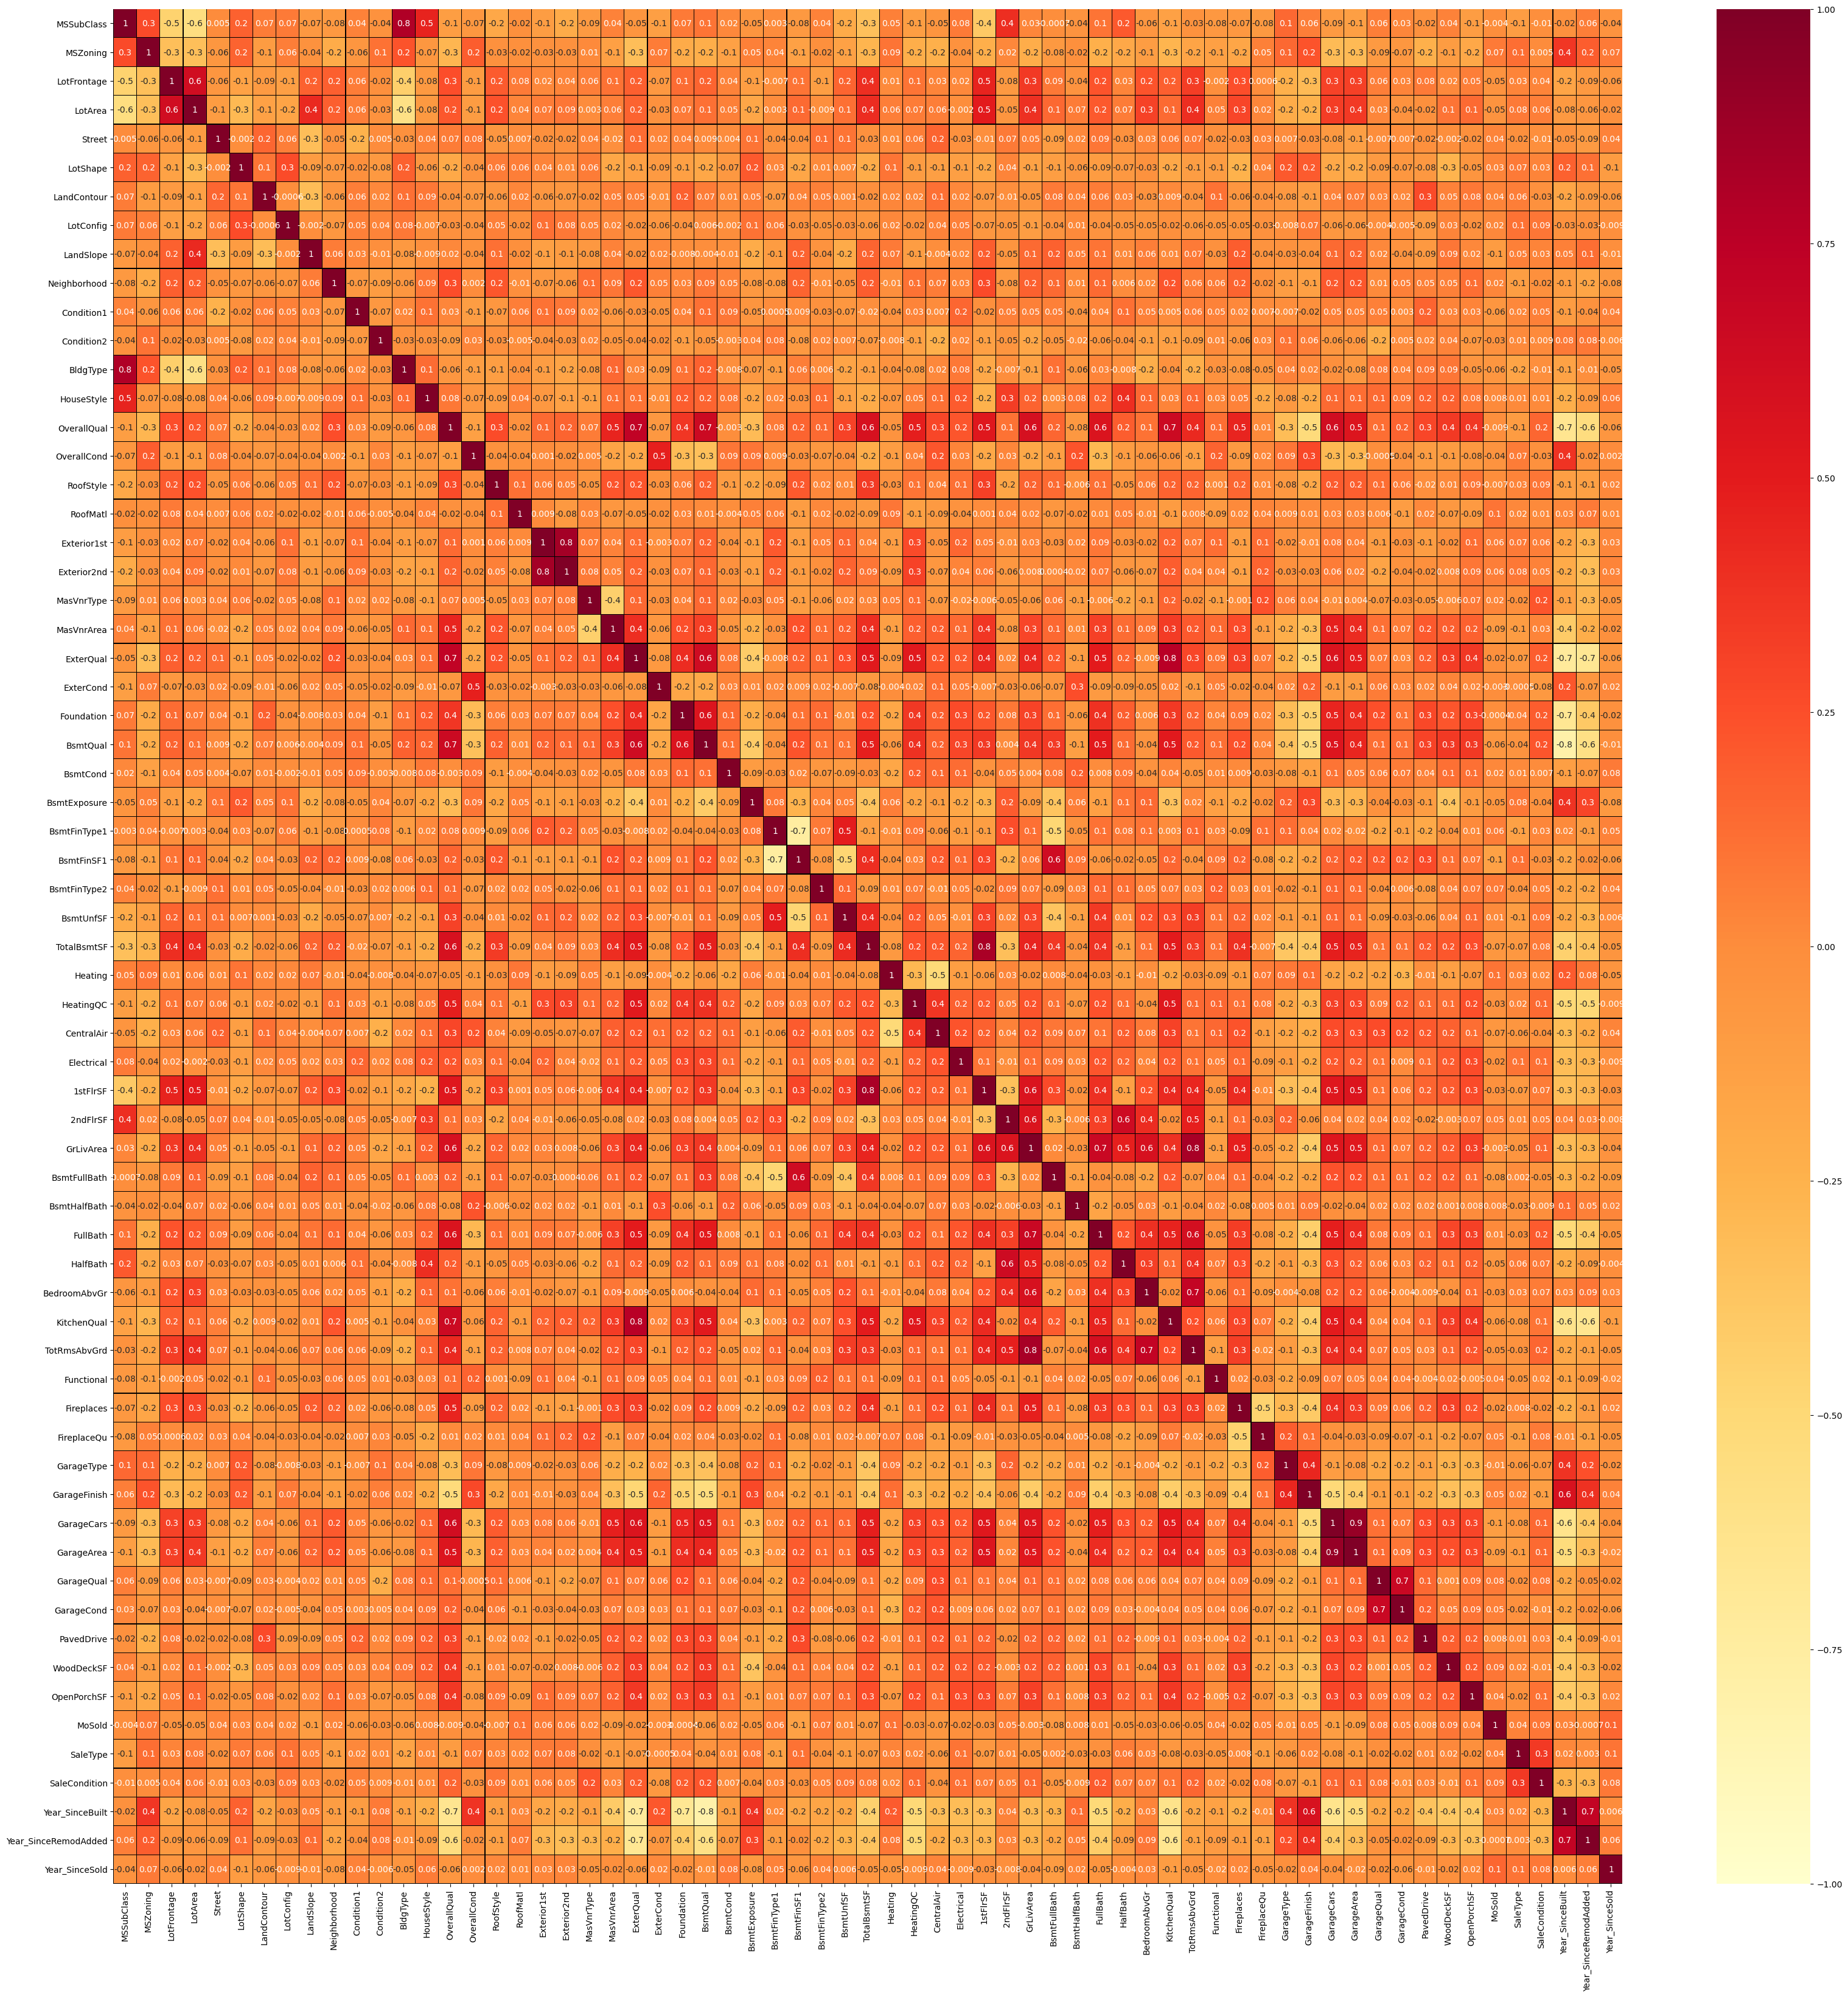

In [95]:
# Visualizing the correlation matrix by plotting heatmap for test dataset.
plt.figure(figsize=(40,40))
sns.heatmap(test_hp.corr(),linewidths=.1,vmin=-1, vmax=1, fmt='.1g', annot = True, linecolor="black",annot_kws={'size':10},cmap="YlOrRd")
plt.yticks(rotation=0);

We can clearly observe a multicolinearity issue in some of the features of test dataset so we have to check VIF.

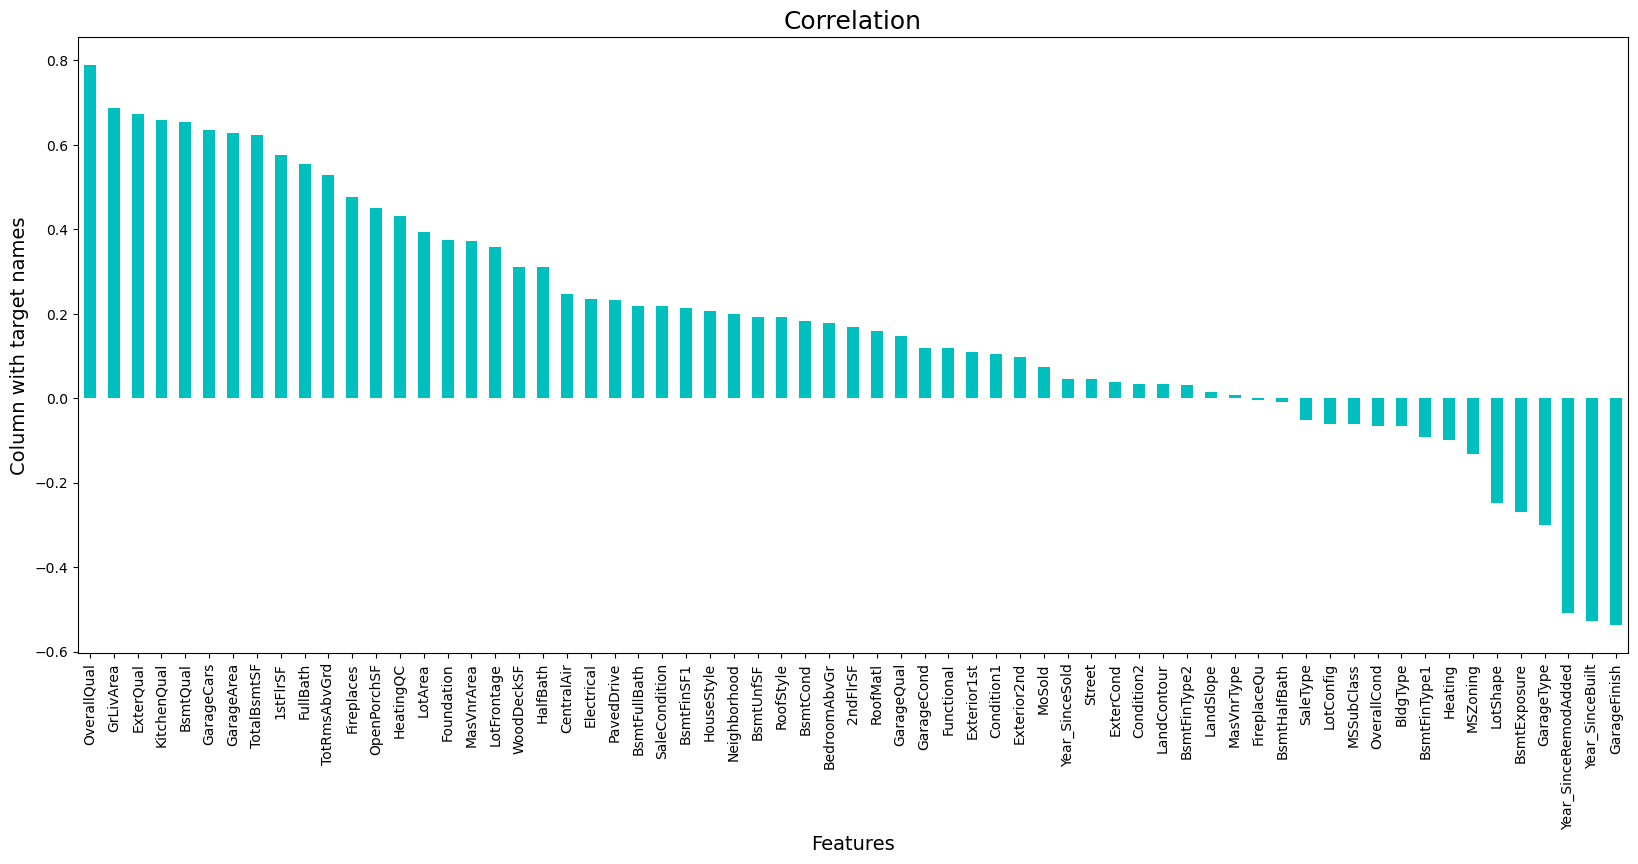

In [96]:
plt.figure(figsize=(20,8))
train_hp.corr()['SalePrice'].sort_values(ascending=False).drop(['SalePrice']).plot(kind='bar',color='c')
plt.xlabel('Features',fontsize=14)
plt.ylabel('Column with target names',fontsize=14)
plt.title('Correlation',fontsize=18)
plt.show()

Clearly seen that MasVnrType and ForeplaceQu are less correlated with target but let us keep these columns as it is and continue.

# Regression Model Building

# Train Dataset

Separating the feature and label into x and y

In [97]:
x = train_hp.drop("SalePrice", axis=1)
y = train_hp["SalePrice"]

In [98]:
x.shape

(1168, 65)

In [99]:
y.shape

(1168,)

# Scaling Train data

In [100]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x

MSSubClass  MSZoning  LotFrontage   LotArea    Street  LotShape  \
0       1.508301 -0.021646     0.039092 -1.306083  0.058621 -1.373107   
1      -0.877042 -0.021646     1.321126  1.356458  0.058621 -1.373107   
2       0.077095 -0.021646     1.160948  0.113089  0.058621 -1.373107   
3      -0.877042 -0.021646     1.855050  0.530989  0.058621 -1.373107   
4      -0.877042 -0.021646     0.039092  1.497522  0.058621 -1.373107   
...          ...       ...          ...       ...       ...       ...   
1163   -0.877042 -0.021646     0.039092  0.088869  0.058621 -1.373107   
1164   -0.877042 -0.021646    -0.173862 -0.169301  0.058621  0.752055   
1165    2.462438 -0.021646    -2.469737 -2.422001  0.058621  0.752055   
1166    0.315629 -4.762117    -1.081534 -0.240685  0.058621  0.752055   
1167    0.077095 -0.021646     0.039092 -0.410304  0.058621 -1.373107   

      LandContour  LotConfig  LandSlope  Neighborhood  ...  GarageCond  \
0        0.318473   0.606420  -0.226126      0.142224  ...    0.110393   
1        0.318473   0.606420   3.295414     -0.024227  ...    0.110393   
2        0.318473  -1.220661  -0.226126      0.475125  ...    0.110393   
3        0.318473   0.606420  -0.226126      0.308675  ...    0.110393   
4        0.318473  -0.611634  -0.226126      0.308675  ...    0.110393   
...           ...        ...        ...           ...  ...         ...   
1163     0.318473   0.606420  -0.226126      1.140927  ...    0.110393   
1164     0.318473   0.606420  -0.226126     -0.856479  ...    0.110393   
1165     0.318473  -0.611634  -0.226126      0.142224  ...    0.110393   
1166     0.318473   0.606420  -0.226126     -0.523578  ...   -4.187561   
1167     0.318473   0.606420  -0.226126     -0.690029  ...    0.110393   

      PavedDrive  WoodDeckSF  OpenPorchSF    MoSold  SaleType  SaleCondition  \
0       0.291828   -0.960144     1.423871 -1.617822  0.330033       0.207932   
1       0.291828    0.783831     1.428474  1.361470  0.330033       0.207932   
2       0.291828    1.047285     1.208580 -0.128176  0.330033       0.207932   
3       0.291828   -0.960144     1.178672 -1.990233 -4.612004       0.207932   
4       0.291828    1.139237    -1.062308 -0.128176  0.330033       0.207932   
...          ...         ...          ...       ...       ...            ...   
1163    0.291828   -0.960144    -1.062308 -1.617822  0.330033       0.207932   
1164   -3.694781   -0.960144     1.066092 -0.500587  0.330033       0.207932   
1165    0.291828    0.807887    -1.062308  0.244236  0.330033       0.207932   
1166   -3.694781   -0.960144     0.797959  0.244236  0.330033       0.207932   
1167    0.291828    0.854503     0.950646 -0.128176  0.330033       0.207932   

      Year_SinceBuilt  Year_SinceRemodAdded  Year_SinceSold  
0           -0.162248              0.421565        0.605487  
1            0.041777              0.710356        0.605487  
2           -0.842331             -0.589202        0.605487  
3           -0.196252              0.373434       -1.651563  
4           -0.196252             -0.733598       -0.899213  
...               ...                   ...             ...  
1163         0.143790              0.854752       -1.651563  
1164         0.755865             -0.877993       -0.899213  
1165        -0.162248              0.421565       -0.899213  
1166         1.741985              1.672992       -0.146863  
1167        -1.046355             -0.877993        1.357837  

[1168 rows x 65 columns]

# Scaling Test data

In [101]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
test_hp = pd.DataFrame(scaler.fit_transform(test_hp), columns=test_hp.columns)
test_hp

MSSubClass  MSZoning  LotFrontage   LotArea    Street  LotShape  \
0     -0.856054 -0.287006     0.981605  0.842656  0.083045 -1.402669   
1      1.431981 -0.287006     0.000000 -0.739104  0.083045 -1.402669   
2     -0.856054 -0.287006     0.000000  0.524304  0.083045  0.745474   
3      0.287963 -0.287006     0.429998  0.548484  0.083045  0.745474   
4      0.059160 -0.287006     0.981605  0.897263  0.083045 -1.402669   
..          ...       ...          ...       ...       ...       ...   
287   -0.856054 -0.287006     0.580436  0.260474  0.083045  0.745474   
288   -0.856054 -0.287006    -0.472632  0.084663  0.083045 -0.686621   
289   -0.856054 -0.287006     0.000000  0.432254  0.083045 -1.402669   
290   -0.169644  1.808136    -0.823655 -1.006703  0.083045  0.745474   
291    2.347195  1.808136    -2.277892 -2.671270  0.083045  0.745474   

     LandContour  LotConfig  LandSlope  Neighborhood  ...  GarageCond  \
0      -2.566101  -2.001106  -0.226274      1.554460  ...    0.088121   
1       0.299297  -1.351136  -0.226274      1.554460  ...    0.088121   
2       0.299297   0.598774  -0.226274     -1.281387  ...    0.088121   
3      -3.998799   0.598774  -0.226274     -1.114572  ...    0.088121   
4       0.299297  -1.351136  -0.226274      1.387645  ...    0.088121   
..           ...        ...        ...           ...  ...         ...   
287     0.299297   0.598774  -0.226274      1.387645  ...    0.088121   
288     0.299297   0.598774  -0.226274     -1.281387  ...    0.088121   
289     0.299297  -1.351136  -0.226274     -0.113685  ...    0.088121   
290     0.299297  -2.001106  -0.226274     -1.615015  ...    0.088121   
291     0.299297   0.598774  -0.226274     -1.781830  ...    0.088121   

     PavedDrive  WoodDeckSF  OpenPorchSF    MoSold  SaleType  SaleCondition  \
0      0.281378    1.119038     0.718308  0.276960   0.23029       0.148654   
1      0.281378    0.813787    -1.111540  0.637997  -6.49418      -3.323909   
2      0.281378    1.153748     1.278346 -0.084077   0.23029       0.148654   
3      0.281378   -0.913570    -1.111540  0.276960   0.23029       0.148654   
4      0.281378    0.954066     0.218396 -1.889261   0.23029       0.148654   
..          ...         ...          ...       ...       ...            ...   
287    0.281378    1.059685     1.056273  1.360070   0.23029       0.148654   
288    0.281378   -0.913570    -1.111540 -1.528224   0.23029       0.148654   
289    0.281378   -0.913570    -1.111540 -1.167187   0.23029       0.148654   
290    0.281378   -0.913570     0.352262  1.360070   0.23029       0.148654   
291    0.281378    0.855070    -1.111540 -0.084077   0.23029       0.148654   

     Year_SinceBuilt  Year_SinceRemodAdded  Year_SinceSold  
0          -1.301385             -1.245981        0.650908  
1          -0.063464              0.394767       -0.863555  
2          -0.932033             -0.635445       -0.863555  
3           1.039378              1.400712       -0.863555  
4          -1.570975             -1.425784       -0.106324  
..               ...                   ...             ...  
287        -1.570975             -1.425784       -0.106324  
288        -0.497307             -0.172494       -0.106324  
289         0.381564              0.890589       -1.620787  
290         0.921568              1.400712        1.408140  
291         0.296455              0.797401        1.408140  

[292 rows x 65 columns]

# VIF Train Data

Checking VIF(Variance Inflation Factor) values in train dataset

In [102]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif["Features"] = x.columns
vif

VIF values              Features
0     5.068479            MSSubClass
1     1.352676              MSZoning
2     2.026088           LotFrontage
3     2.628221               LotArea
4     1.107480                Street
..         ...                   ...
60    1.116682              SaleType
61    1.185839         SaleCondition
62    7.576939       Year_SinceBuilt
63    3.008636  Year_SinceRemodAdded
64    1.088370        Year_SinceSold

[65 rows x 2 columns]

In [103]:
# Droping high VIF columns
x = x.drop(["GrLivArea"],axis=1)

In [104]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif["Features"] = x.columns
vif

VIF values              Features
0     5.062515            MSSubClass
1     1.351742              MSZoning
2     2.022316           LotFrontage
3     2.626253               LotArea
4     1.101172                Street
..         ...                   ...
59    1.114970              SaleType
60    1.185402         SaleCondition
61    7.448638       Year_SinceBuilt
62    3.005055  Year_SinceRemodAdded
63    1.087914        Year_SinceSold

[64 rows x 2 columns]

Now all the feature have VIF less than 10 which means multicollinearity problem has been solved.

# VIF Test Data

In [105]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(test_hp.values,i) for i in range(len(test_hp.columns))]
vif["Features"] = test_hp.columns
vif

VIF values              Features
0    14.033530            MSSubClass
1     1.887758              MSZoning
2     2.283483           LotFrontage
3     4.395869               LotArea
4     1.514929                Street
..         ...                   ...
60    1.621417              SaleType
61    1.675966         SaleCondition
62   13.219795       Year_SinceBuilt
63    4.517708  Year_SinceRemodAdded
64    1.229681        Year_SinceSold

[65 rows x 2 columns]

In [106]:
# Dropping GrLivArea which has high VIF value
test_hp.drop("GrLivArea",axis=1,inplace=True)

In [107]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(test_hp.values,i) for i in range(len(test_hp.columns))]
vif["Features"] = test_hp.columns
vif

VIF values              Features
0    13.984752            MSSubClass
1     1.887755              MSZoning
2     2.255562           LotFrontage
3     4.395595               LotArea
4     1.510367                Street
..         ...                   ...
59    1.617509              SaleType
60    1.654297         SaleCondition
61   12.853726       Year_SinceBuilt
62    4.504902  Year_SinceRemodAdded
63    1.228292        Year_SinceSold

[64 rows x 2 columns]

Here, multicollinearity is almost solved. Since we have removed only one column in train dataset, so in test dataset also we should remove the same column to balance the number of the columns. So we are not removing any other columns.

# Best Random State

In [108]:
from sklearn import neighbors
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [109]:
maxAccu=0
maxRS=0
for i in range(200):
    x_train,x_test,y_train,y_test=train_test_split(x, y, test_size = 0.30, random_state = i)
    KNN=neighbors.KNeighborsRegressor()
    KNN.fit(x_train,y_train)
    pred_rs=KNN.predict(x_test)
    r2=r2_score(y_test,pred_rs)
    if r2>maxAccu:
        maxAccu=r2
        maxRS=i
print("Best R2 Score is :",maxAccu," on Random State :",maxRS)

Best R2 Score is : 0.8308989087884643  on Random State : 168


In [110]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=maxRS)

In [111]:
x_train.shape

(817, 64)

In [112]:
x_test.shape

(351, 64)

In [113]:
y_train.shape

(817,)

In [114]:
y_test.shape

(351,)

# Linear Regression

In [115]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [116]:
from sklearn.linear_model import LinearRegression

lr=LinearRegression()
lr.fit(x_train,y_train)
lr.score(x_train,y_train)

pred_lr=lr.predict(x_test)
print('R2_Score: ',r2_score(y_test,pred_lr))
print('Mean absolute error: ',mean_absolute_error(y_test,pred_lr))
print('Mean squared error: ',mean_squared_error(y_test,pred_lr))
print('Root Mean squared error: ',np.sqrt(mean_squared_error(y_test,pred_lr)))

R2_Score:  0.8228339614616353
Mean absolute error:  23526.72628034602
Mean squared error:  1197077471.7451844
Root Mean squared error:  34598.80737460736


# Decision Tree Regressor

In [117]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor()
dtr.fit(x_train,y_train)
dtr.score(x_train,y_train)

pred_dtr=dtr.predict(x_test)
print('R2_Score: ',r2_score(y_test,pred_dtr))
print('Mean absolute error: ',mean_absolute_error(y_test,pred_dtr))
print('Mean squared error: ',mean_squared_error(y_test,pred_dtr))
print('Root Mean squared error: ',np.sqrt(mean_squared_error(y_test,pred_dtr)))

R2_Score:  0.6771092885680314
Mean absolute error:  29045.10541310541
Mean squared error:  2181711572.2621083
Root Mean squared error:  46708.7954486316


# KNearest Neighbors Regressor

In [118]:
from sklearn import neighbors

knn = neighbors.KNeighborsRegressor()
knn.fit(x_train,y_train)
knn.score(x_train,y_train)

pred_knn=knn.predict(x_test)
print('R2_Score: ',r2_score(y_test,pred_knn))
print('Mean absolute error: ',mean_absolute_error(y_test,pred_knn))
print('Mean squared error: ',mean_squared_error(y_test,pred_knn))
print('Root Mean squared error: ',np.sqrt(mean_squared_error(y_test,pred_knn)))

R2_Score:  0.8308989087884643
Mean absolute error:  23609.071794871794
Mean squared error:  1142584145.3977208
Root Mean squared error:  33802.13226111218


# SVR

In [119]:
from sklearn.svm import SVR

svr=SVR()
svr.fit(x_train,y_train)
svr.score(x_train,y_train)

pred_svr=svr.predict(x_test)
print('R2_Score: ',r2_score(y_test,pred_svr))
print('Mean absolute error: ',mean_absolute_error(y_test,pred_svr))
print('Mean squared error: ',mean_squared_error(y_test,pred_svr))
print('Root Mean squared error: ',np.sqrt(mean_squared_error(y_test,pred_svr)))

R2_Score:  -0.040518359374528634
Mean absolute error:  57312.14359444743
Mean squared error:  7030586094.381639
Root Mean squared error:  83848.59029454006


# Random Forest Regressor

In [120]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor()
rfr.fit(x_train,y_train)
rfr.score(x_train,y_train)

pred_rfr=rfr.predict(x_test)
print('R2_Score: ',r2_score(y_test,pred_rfr))
print('Mean absolute error: ',mean_absolute_error(y_test,pred_rfr))
print('Mean squared error: ',mean_squared_error(y_test,pred_rfr))
print('Root Mean squared error: ',np.sqrt(mean_squared_error(y_test,pred_rfr)))

R2_Score:  0.8554610762645711
Mean absolute error:  19618.401082621083
Mean squared error:  976622217.336024
Root Mean squared error:  31250.955462769838


# Gradient Boosting Regressor

In [121]:
from sklearn.ensemble import GradientBoostingRegressor

gbr=GradientBoostingRegressor()
gbr.fit(x_train,y_train)
gbr.score(x_train,y_train)

pred_gbr=gbr.predict(x_test)
print('R2_Score: ',r2_score(y_test,pred_gbr))
print('Mean absolute error: ',mean_absolute_error(y_test,pred_gbr))
print('Mean squared error: ',mean_squared_error(y_test,pred_gbr))
print('Root Mean squared error: ',np.sqrt(mean_squared_error(y_test,pred_gbr)))

R2_Score:  0.8806459355528687
Mean absolute error:  18686.965769962757
Mean squared error:  806452878.2695813
Root Mean squared error:  28398.113991418184


# Extra Trees Regressor

In [122]:
from sklearn.ensemble import ExtraTreesRegressor

etr=ExtraTreesRegressor()
etr.fit(x_train,y_train)
etr.score(x_train,y_train)

pred_etr=etr.predict(x_test)
print('R2_Score: ',r2_score(y_test,pred_etr))
print('Mean absolute error: ',mean_absolute_error(y_test,pred_etr))
print('Mean squared error: ',mean_squared_error(y_test,pred_etr))
print('Root Mean squared error: ',np.sqrt(mean_squared_error(y_test,pred_etr)))

R2_Score:  0.8739466473471336
Mean absolute error:  19372.195071225073
Mean squared error:  851718703.7854418
Root Mean squared error:  29184.220116107983


# XGBoost Regressor

In [123]:
from xgboost import XGBRegressor

xgb=XGBRegressor()
xgb.fit(x_train,y_train)
xgb.score(x_train,y_train)

pred_xgb=xgb.predict(x_test)
print('R2_Score: ',r2_score(y_test,pred_xgb))
print('Mean absolute error: ',mean_absolute_error(y_test,pred_xgb))
print('Mean squared error: ',mean_squared_error(y_test,pred_xgb))
print('Root Mean squared error: ',np.sqrt(mean_squared_error(y_test,pred_xgb)))

R2_Score:  0.8484177276212173
Mean absolute error:  19920.644464476496
Mean squared error:  1024212794.2669415
Root Mean squared error:  32003.324737704075


From the above models, the highest R2 score belongs to Gradient Boosting Regressor. After this, Extra Trees Regressor has the highest R2 score. Followed by, Random Forest Regressor & XGBoost Regressor.

Next, KNearest Neighbors Regressor, Linear Regression model & Decision Tree Regressor.

The lowest R2 score belongs to SVR Model.

# Cross Validation Score

In [124]:
from sklearn.model_selection import cross_val_score

In [125]:
scr_ln=cross_val_score(lr,x,y,cv=5)
print("Cross validation score of this model is: ",scr_ln.mean())

Cross validation score of this model is:  0.8014568305871614


In [126]:
scr_dtr=cross_val_score(dtr,x,y,cv=5)
print("Cross validation score of this model is: ",scr_dtr.mean())

Cross validation score of this model is:  0.6540116175039038


In [127]:
scr_knn=cross_val_score(knn,x,y,cv=5)
print("Cross validation score of this model is: ",scr_knn.mean())

Cross validation score of this model is:  0.7374696073974503


In [128]:
scr_svr=cross_val_score(svr,x,y,cv=5)
print("Cross validation score of this model is: ",scr_svr.mean())

Cross validation score of this model is:  -0.06175365320068811


In [129]:
scr_rfr=cross_val_score(rfr,x,y,cv=5)
print("Cross validation score of this model is: ",scr_rfr.mean())

Cross validation score of this model is:  0.8323354562023703


In [130]:
scr_gbr=cross_val_score(gbr,x,y,cv=5)
print("Cross validation score of this model is: ",scr_gbr.mean())

Cross validation score of this model is:  0.8273637440848438


In [131]:
scr_etr=cross_val_score(etr,x,y,cv=5)
print("Cross validation score of this model is: ",scr_etr.mean())

Cross validation score of this model is:  0.8349499182282054


In [132]:
scr_xgb=cross_val_score(xgb,x,y,cv=5)
print("Cross validation score of this model is: ",scr_xgb.mean())

Cross validation score of this model is:  0.8349666015588626


From the above cross validation scores, the highest score belongs to Extra Trees Regressor, followed by XGBoost Regressor & Random Forest Regressor.

Next, Gradient Boosting Regressor & Linear Regression Model.

After that, KNearest Neighbors Regressor & Decision Tree Regressor , the lowest cross validation score is of SVR Model.

# Hyper Parameter Tuning

Since the R2 Score & Cross Validation Score are both high  in **Extra Trees Regressor** we shall consider it for hyper parameter tuning.

We will use GridSearchCV for hyper parameter tuning.

In [133]:
from sklearn.model_selection import GridSearchCV

In [134]:
parameters = {'n_estimators':[10,100,1000],
             'criterion':['squared_error','mse','absolute_error','mae'],
             'max_features':['auto','sqrt','log2'],
             'n_jobs':[-2,-1,1]}
grid_etr = GridSearchCV(etr, param_grid = parameters, cv = 5)

In [135]:
grid_etr.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=ExtraTreesRegressor(),
             param_grid={'criterion': ['squared_error', 'mse', 'absolute_error',
                                       'mae'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [10, 100, 1000],
                         'n_jobs': [-2, -1, 1]})

In [136]:
grid_etr.best_params_

{'criterion': 'absolute_error',
 'max_features': 'auto',
 'n_estimators': 1000,
 'n_jobs': -2}

In [138]:
Best_model = ExtraTreesRegressor(criterion='absolute_error',max_features='auto',n_jobs=-2,n_estimators=1000)
Best_model.fit(x_train,y_train)

pred = Best_model.predict(x_test)
print('R2_Score: ',r2_score(y_test,pred))
print('Mean absolute error: ',mean_absolute_error(y_test,pred))
print('Mean squared error: ',mean_squared_error(y_test,pred))
print('Root Mean squared error: ',np.sqrt(mean_squared_error(y_test,pred)))

R2_Score:  0.8782242109245754
Mean absolute error:  18798.661794871794
Mean squared error:  822816014.3379687
Root Mean squared error:  28684.76972781843


After Hyper Parameter Tuning, we have got a better R2 score of 87.82 %.

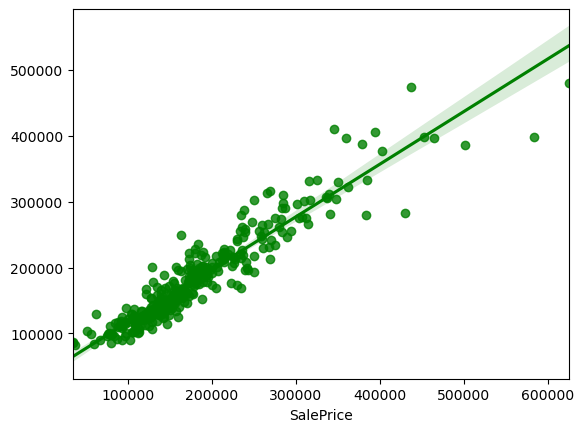

In [139]:
# Visualizing the predicted values
sns.regplot(y_test,pred,color="g")
plt.show()

# Saving the Model

In [140]:
import joblib
joblib.dump(Best_model,"House_Price_Prediction.pkl")

['House_Price_Prediction.pkl']

# Prediction

In [141]:
# Loading the saved model
train_model=joblib.load("House_Price_Prediction.pkl")

# Prediction
prediction = train_model.predict(x_test)
prediction

array([109235.038, 134265.346, 144452.296, 226320.296, 222776.35 ,
       198475.743,  87001.112, 247068.519, 202007.45 , 117322.719,
       200030.366, 177606.261, 106414.452, 186293.401, 123649.531,
       126564.629, 253897.859, 174923.452, 138469.961, 169348.748,
       112074.518, 168420.548, 150187.69 , 287972.415, 221089.232,
       158172.938,  97823.981, 269665.202, 217112.378, 215381.402,
       239980.549, 474822.597, 307536.209, 190742.185, 101337.487,
       275227.632, 137810.044, 134325.323, 126831.509,  96146.399,
       198559.044,  82928.602, 124687.399, 218631.626, 125490.931,
       264680.407, 377310.342, 255699.592, 165272.852, 144553.487,
       192035.934, 173931.558, 160094.625, 126382.614, 147303.657,
       246183.439, 111041.573, 243748.252,  99538.113, 108259.169,
       302675.577, 141064.683, 220317.57 , 177131.77 , 303755.798,
       143427.941, 192931.158, 148264.92 , 133835.098, 229716.903,
       146030.753, 195851.132, 153518.239, 188664.47 , 255885.

In [142]:
pd.DataFrame([train_model.predict(x_test)[:],y_test[:]],index=["Predicted","Actual"])

0           1           2           3          4    \
Predicted  109235.038  134265.346  144452.296  226320.296  222776.35   
Actual      89000.000  139900.000  148000.000  236000.000  172500.00   

                  5          6           7          8           9    ...  \
Predicted  198475.743  87001.112  247068.519  202007.45  117322.719  ...   
Actual     189000.000  34900.000  237000.000  188000.00  129000.000  ...   

                  341         342         343         344         345  \
Predicted  131737.844  124716.878  164782.061  231837.475  330961.629   
Actual     139400.000  160000.000  158000.000  268000.000  315500.000   

                  346         347         348         349         350  
Predicted  195608.182  143606.236  128184.118  135463.859  135180.208  
Actual     178740.000  148000.000  149000.000  133500.000  124900.000  

[2 rows x 351 columns]

Above are the predicted values and the actual values.They are almost similar.

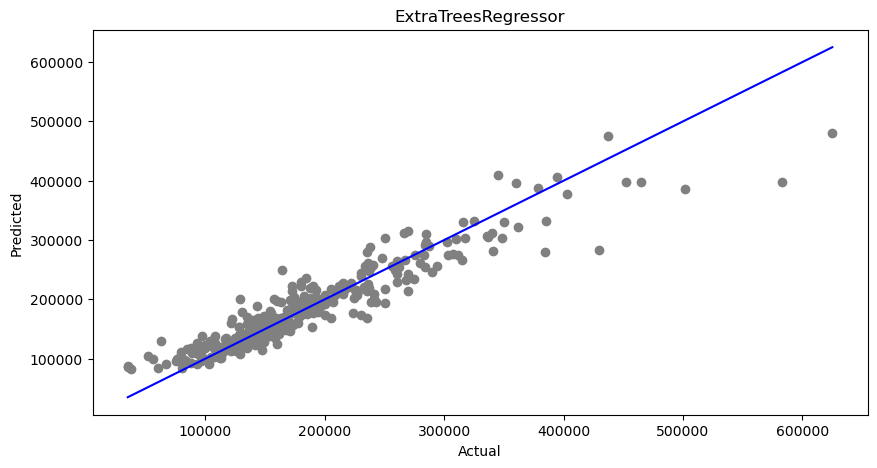

In [143]:
plt.figure(figsize=(10,5))
plt.scatter(y_test, prediction, c='grey')
p1 = max(max(prediction), max(y_test))
p2 = min(min(prediction), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Actual', fontsize=10)
plt.ylabel('Predicted', fontsize=10)
plt.title("ExtraTreesRegressor")
plt.show()

Plotting Actual vs Predicted,To get better insight. Blue line is the actual line and grey dots are the predicted values.

In [144]:
# Predicting the house sale price from the features of the testing data 
Predicted_SalePrice = train_model.predict(test_hp)
Predicted_SalePrice

array([350311.092, 244155.513, 261605.265, 179816.166, 228480.003,
        99985.319, 143020.209, 326591.241, 247018.007, 158510.816,
        89807.758, 143035.35 , 124130.045, 167262.126, 305009.415,
       134494.744, 118433.519, 133651.745, 179182.815, 206281.779,
       149640.275, 152147.462, 157836.396,  93164.137, 118786.409,
       128414.029, 178107.386, 148375.191, 185686.066, 112221.931,
       139505.864, 201371.657, 228778.032, 163454.206, 121532.253,
       189215.201, 196388.332, 120105.637, 165431.064, 152021.493,
       116452.961, 309194.325, 208071.933, 194157.709, 143770.037,
       128515.301, 128556.032, 103761.554, 207732.493, 353754.91 ,
       142299.353, 213888.295, 113684.655, 101002.597, 257787.282,
       117871.33 , 139334.177, 198825.95 , 121439.131, 258501.742,
       103039.76 , 188973.76 , 135221.717, 150036.148, 199033.868,
        93006.657, 151027.355, 217751.785, 139743.567, 156187.847,
       275698.162, 165111.877, 172906.306, 144437.808, 139862.

In [145]:
# Making dataframe for predicted SalePrice
House_Price_Predictions = pd.DataFrame()
House_Price_Predictions["SalePrice"] = Predicted_SalePrice
House_Price_Predictions

SalePrice
0    350311.092
1    244155.513
2    261605.265
3    179816.166
4    228480.003
..          ...
287  241206.211
288  141293.325
289  157020.195
290  168920.246
291  100341.875

[292 rows x 1 columns]